In [4]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [5]:
def extract_kilonova_ids(file_path="/media/biswajit/drive/PLAsTiCC_data/training_set_metadata.csv"):
    
    df_meta_data = Table.read(file_path,delimiter=",")
    
    kilonova_index= df_meta_data['target']==64
    return np.array(df_meta_data[kilonova_index]['object_id'])

In [6]:
kilonova_ids=extract_kilonova_ids()
print(kilonova_ids)

[    62187    139362   1573501   3572446   4311960   4539153   5102349
   6460481  11574036  11742403  11904502  13537416  15897952  16173841
  16452890  17116737  17958346  19183060  20539244  22245279  23798919
  26684850  27883625  31292040  31563138  33065798  35411122  35630788
  39745050  44564061  44864629  46213566  46489715  46553925  47142591
  48098969  49519074  49850869  50120780  51527253  54000531  56942944
  59364010  59464880  59698197  61543226  61688145  66740787  67195030
  67600070  70425954  74492858  74512775  74943698  75080064  75218022
  76457103  80913604  81456459  84706583  85030920  86490974  89733353
  89942025  90269218  93121505  93394704  93725998  95541281  96619113
  97214939  97639845  97765302  99449747 102551107 102599855 103258429
 103989029 105385367 107129776 108253858 108305965 110808232 113330500
 113678572 113851505 114467134 115381923 115713701 118230321 119260275
 120794836 120845357 121016694 121257780 121326699 122963326 124687561
 12555

In [7]:
def load_data(file_path="/media/biswajit/drive/PLAsTiCC_data/training_set.csv"):
    table = Table.read(file_path)
    return table

In [8]:
df = load_data()
print(df)

object_id    mjd     passband     flux      flux_err detected
--------- ---------- -------- ------------ --------- --------
      615 59750.4229        2  -544.810303  3.622952        1
      615 59750.4306        1  -816.434326   5.55337        1
      615 59750.4383        3  -471.385529  3.801213        1
      615  59750.445        4  -388.984985 11.395031        1
      615  59752.407        2  -681.858887  4.041204        1
      615 59752.4147        1 -1061.457031  6.472994        1
      615 59752.4224        3   -524.95459  3.552751        1
      615 59752.4334        4  -393.480225  3.599346        1
      615 59752.4435        5   -355.88678 10.421921        1
      615 59767.2968        2   -548.01355  3.462291        1
      ...        ...      ...          ...       ...      ...
130779836  60537.147        3    -41.85004 26.782366        0
130779836 60542.0489        4   -60.500492 14.743795        0
130779836 60543.0247        4   -48.527161  24.00408        0
13077983

In [9]:
pass_bands=np.unique(df['passband'])
pass_band_dict = {0:'C1' , 1:'C2' , 2:'C3' , 3:'C4' , 4:'k' , 5:'C5'}

In [32]:
def plot_data(df,mid_point=None,number_of_days = None,priority=None,number_of_peaks = -1,_pbnames = ['u','g','r','i','z','y']):   
    
    fig = plt.figure(figsize=(15,12))
    kid = df['object_id'][0]
    #print(df['object_id'])
    
    for band in pass_bands:
        
        pbname=_pbnames[band]
        
        if mid_point == None:
        
            if number_of_days == None:
                ind = df['passband'] == band
                current_band_data = df[ind]
                min_day = np.amin(df['mjd'])
                max_day = np.amax(df['mjd'])
                

            else:
                pass_ind = df['passband'] == band
                pass_data = df[pass_ind]
                max_day = np.amax(df['mjd'])
                min_day = max_day-number_of_days
                ind = pass_data['mjd'] > min_day
                current_band_data = pass_data[ind]
                plt.plot([np.amax(df['mjd'])-number_of_days,np.amax(df['mjd'])],[0,0],label='y=0')
                
        else:
            
            if number_of_days == None:
                ind = df['passband'] == band
                current_band_data = df[ind]
                min_day = np.amin(df['mjd'])
                max_day = np.amax(df['mjd'])
                
            else:
                
                pass_ind = df['passband'] == band
                pass_data = df[pass_ind]
                min_day = mid_point - number_of_days/2
                max_day = mid_point + number_of_days/2
                ind = (pass_data['mjd'] > min_day)&(pass_data['mjd'] < max_day)
                current_band_data = pass_data[ind]
        
        if len(current_band_data)>0:
            plt.errorbar(current_band_data['mjd'],current_band_data['flux'],current_band_data['flux_err'], color=pass_band_dict[band],label = pbname)
    
    plt.plot([min_day,max_day],[0,0],label='y=0')
    plt.legend()
    plt.xlabel("MJD",fontsize=40)
    plt.ylabel("flux",fontsize=40)
    if mid_point == None:
        plt.savefig("./kilonova_img/all_days/train"+str(kid))
    else:
        plt.savefig("./kilonova_img/kilonova_segments/train"+str(kid)+"priority"+str(priority+1))
        plt.title("Priority region number "+ str(priority+1) +" object ID "+ str(df['object_id'][0]) + " with " + str(number_of_peaks) + " peak (s)")
    plt.show()

In [33]:
from statistics import median

def get_max_flux(df, band_num=None, priority=None, max_day_diff=14,total_days_range=100):
    
    pass_bands_nos=np.unique(df['passband'])
    
    if band_num == None:
        
        max_flux_dates = [[]]
        #print(pass_bands_nos)
        for band in pass_bands_nos:
            ind = df['passband'] == band
            current_band_data = df[ind]
            current_max_index = np.argmax(current_band_data['flux'])
            current_max_date = current_band_data['mjd'][current_max_index]
            #print(band)
            #print(current_max_date)
            
            #print(len(max_flux_dates))
            #for i in range(len(max_flux_dates)):

            if len(max_flux_dates[0])==0:
                max_flux_dates[0].append(current_max_date)
            else:
                        #find atleast 1 bin
                bin_found = 0

                for elements in max_flux_dates:
                    max_val = max(elements)
                    min_val = min(elements)
                    if ((current_max_date-min_val)<=-max_day_diff) | ((current_max_date-max_val)>=max_day_diff):
                        continue
                    else:
                        elements.append(current_max_date)
                        bin_found =1 

                if bin_found == 0:
                    max_flux_dates.append([current_max_date])
                    
        def myfunc(e):
            return len(e)
        max_flux_dates.sort(reverse=True,key=myfunc)
                    
        #print(max_flux_dates)

        for i,ranges in enumerate(max_flux_dates):
            
            mid_pt = median(ranges)
            #print(mid_pt)
            if priority ==0:
                print("Error in priority value")
                break
            if priority==None:
                print(ranges)
                plot_data(df,number_of_days=total_days_range,mid_point=mid_pt,priority=i)
            else:
                if (i<priority)|(len(ranges)==len(max_flux_dates[i-1])) :
                    print(ranges)
                    plot_data(df,number_of_days=total_days_range,mid_point=mid_pt,priority=i,number_of_peaks=len(ranges))
                else:
                    break

62187
[60580.1736, 60580.1889, 60580.1999]


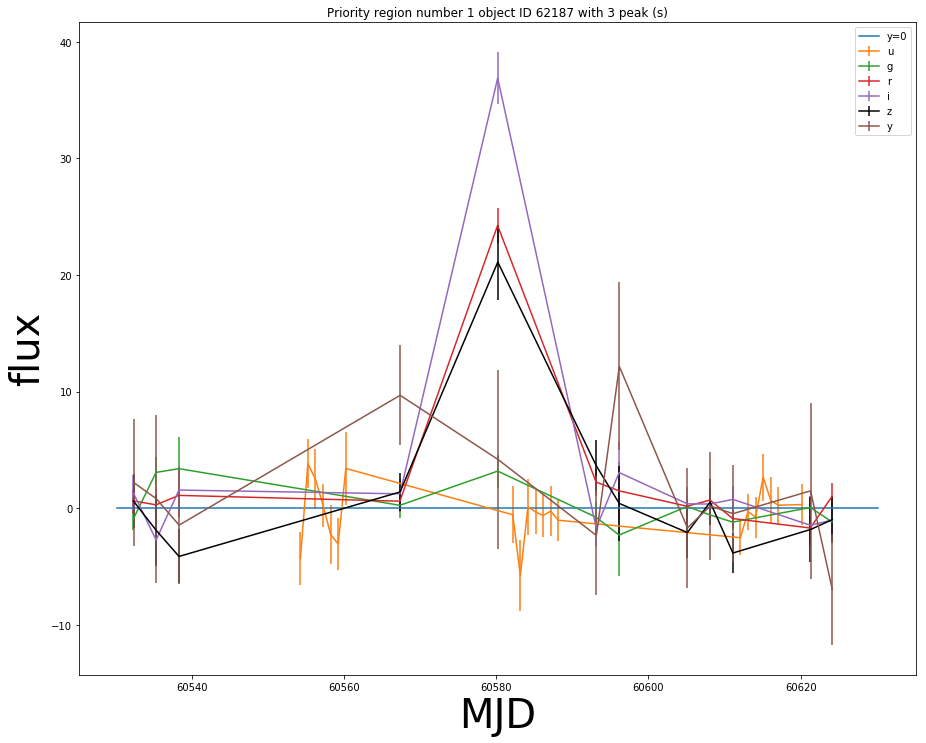

139362
[60016.0879, 60016.1032, 60016.1141, 60016.1251]


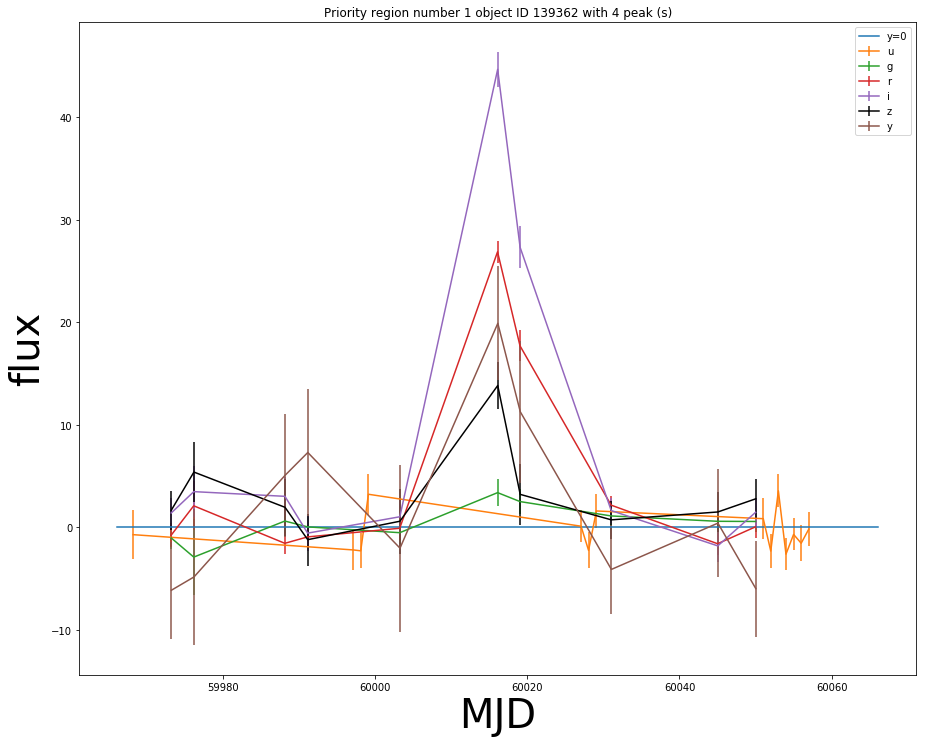

1573501
[59874.2948]


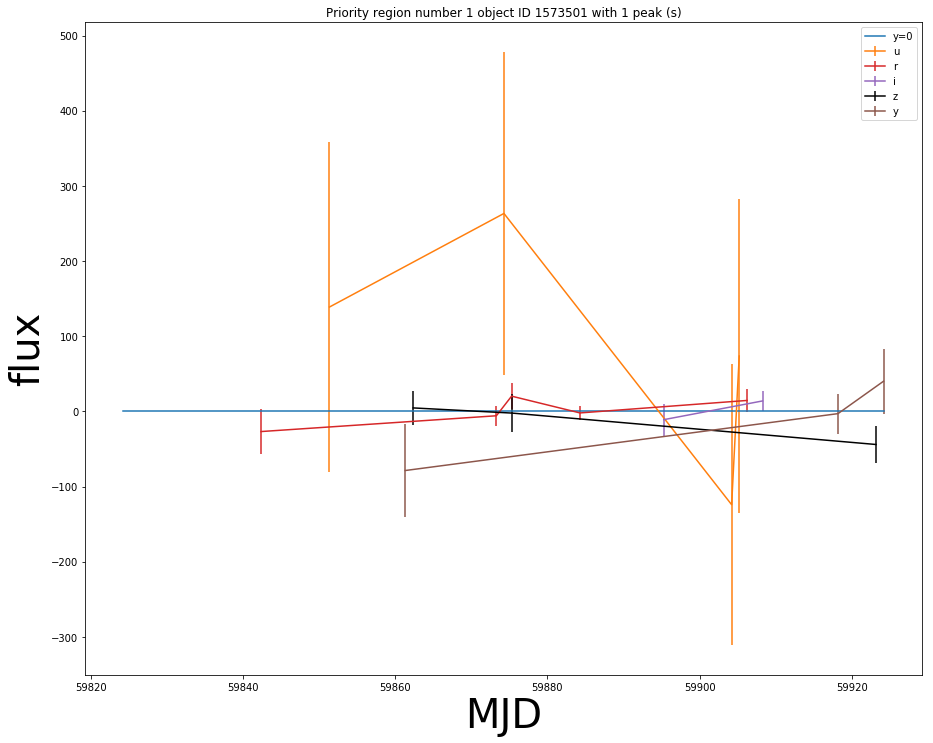

[60667.1672]


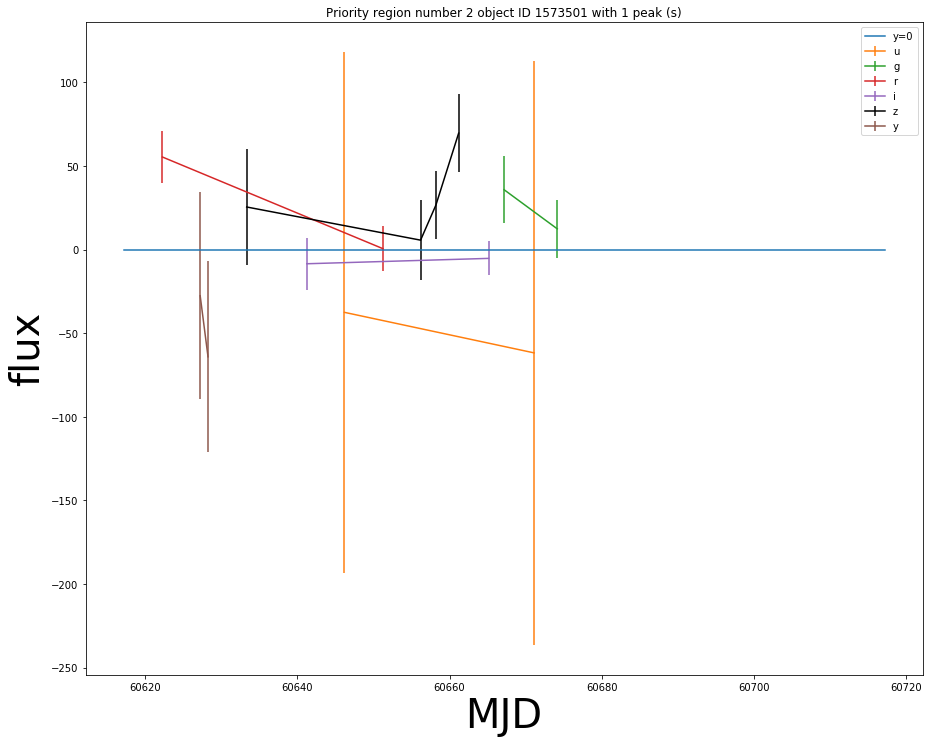

[60616.2673]


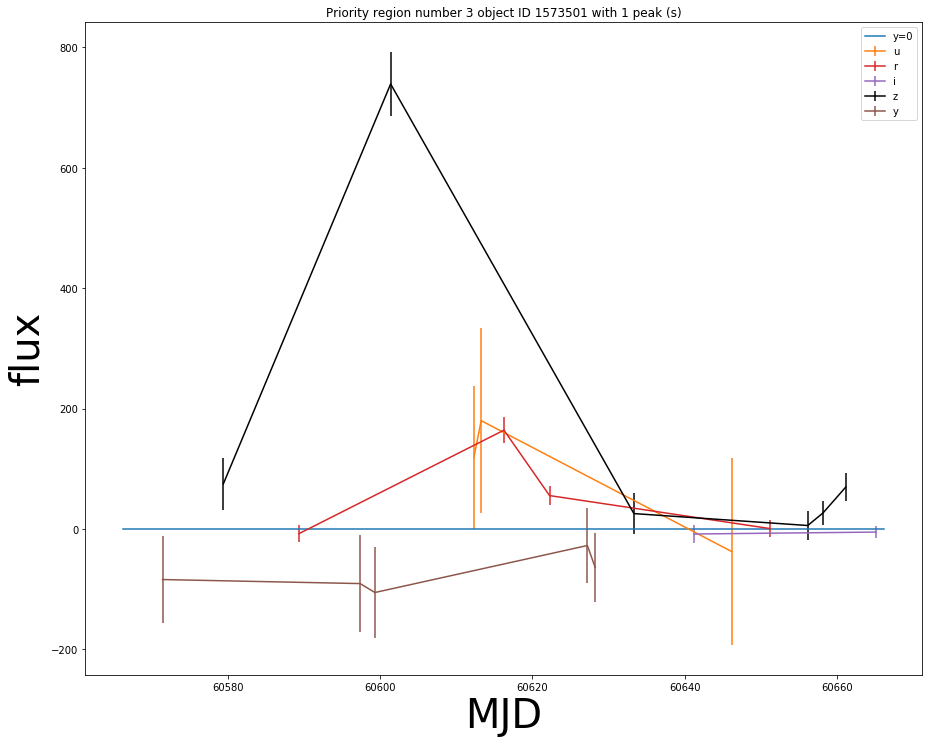

[60064.076]


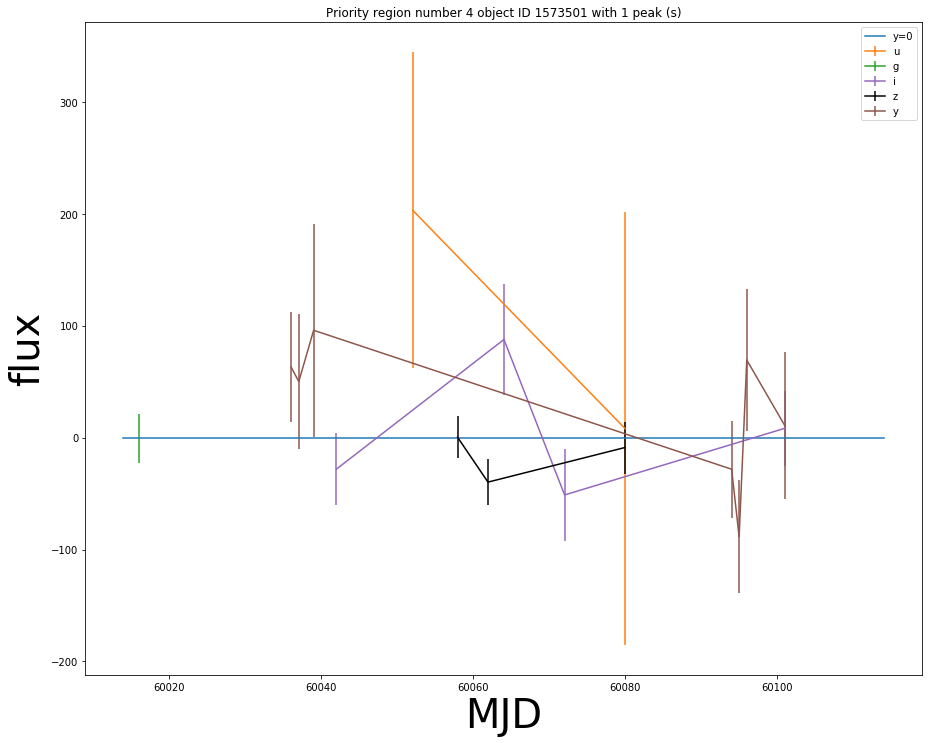

[60601.3756]


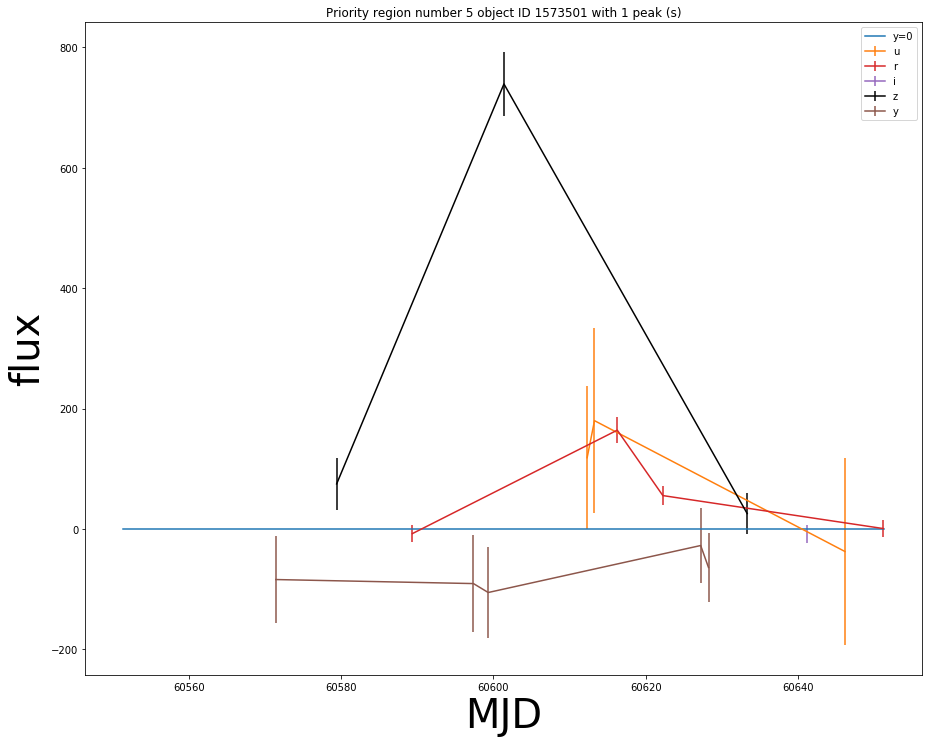

[60008.1338]


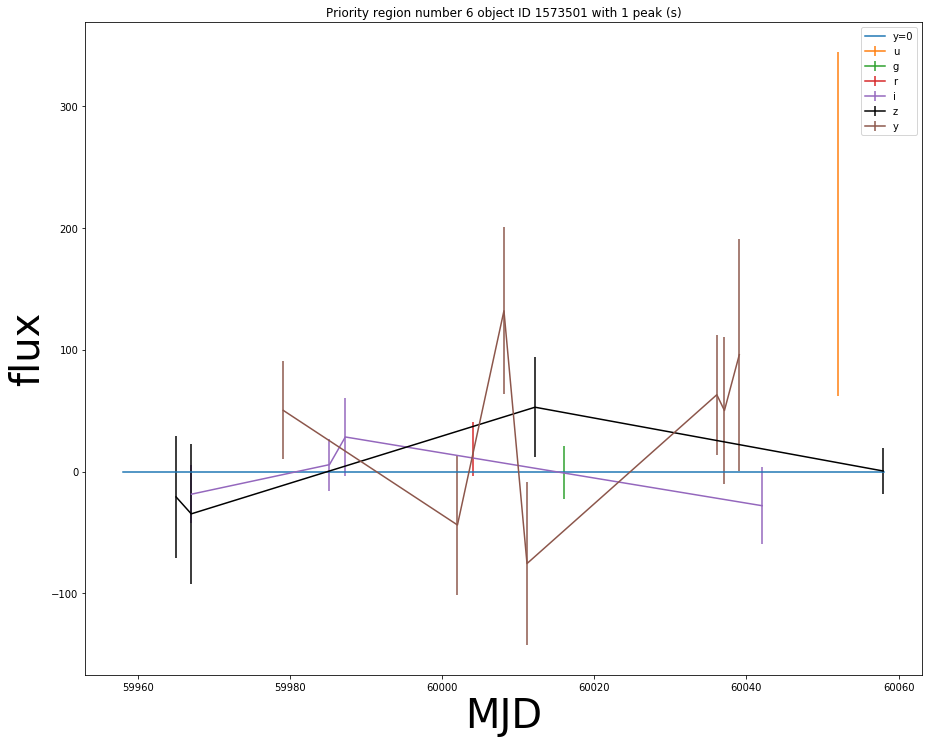

3572446
[60487.99, 60492.0678, 60485.0349]


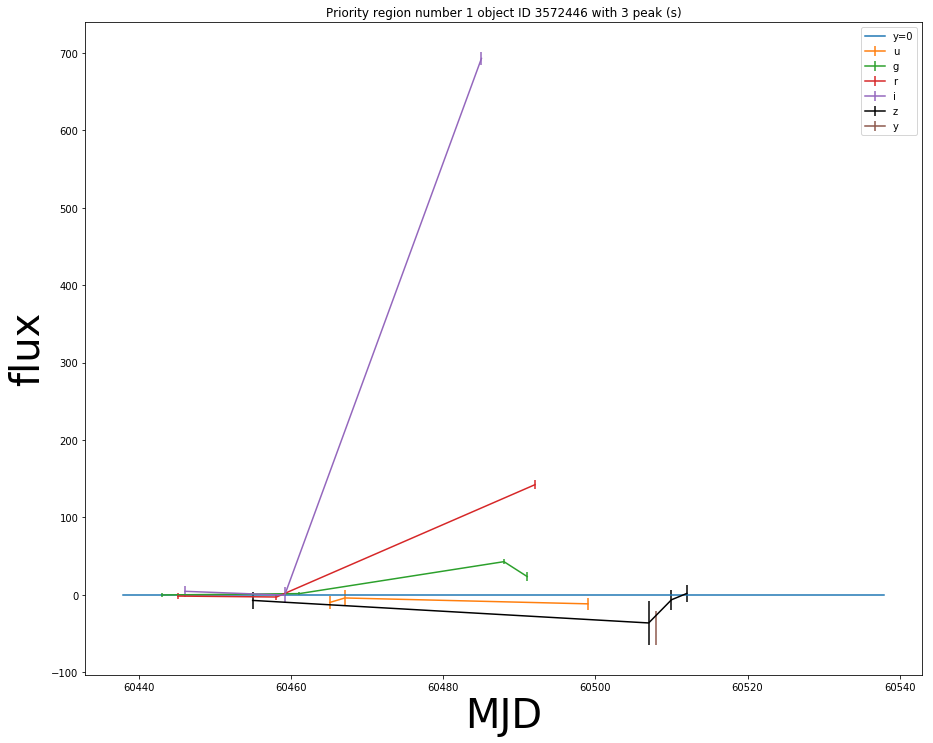

4311960
[60018.3873, 60010.4048]


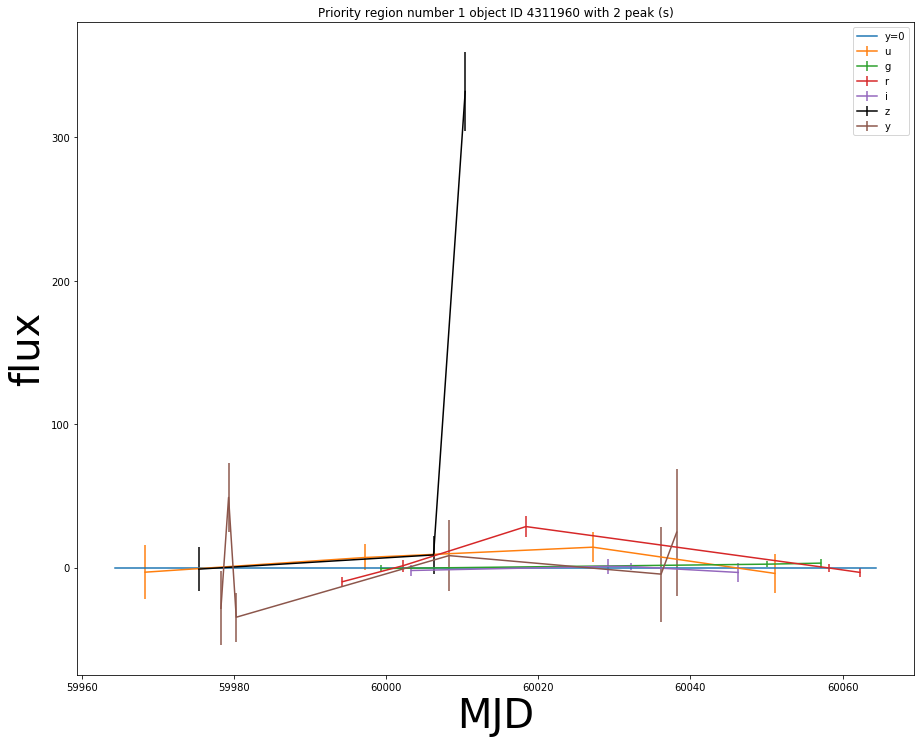

[60131.1267, 60128.1453]


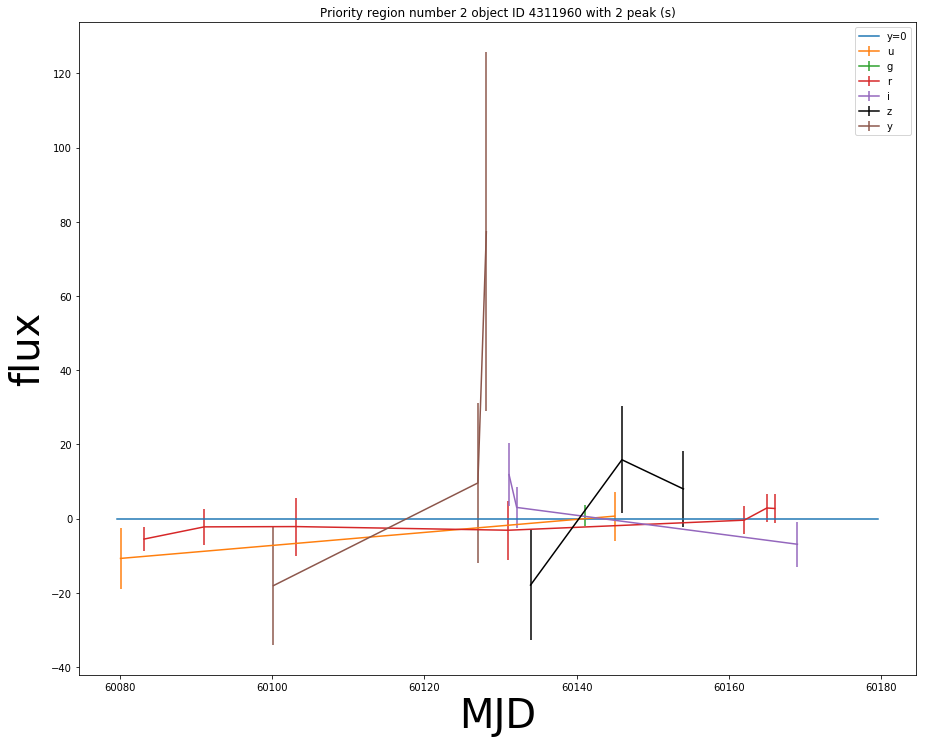

4539153
[59934.2314, 59922.259]


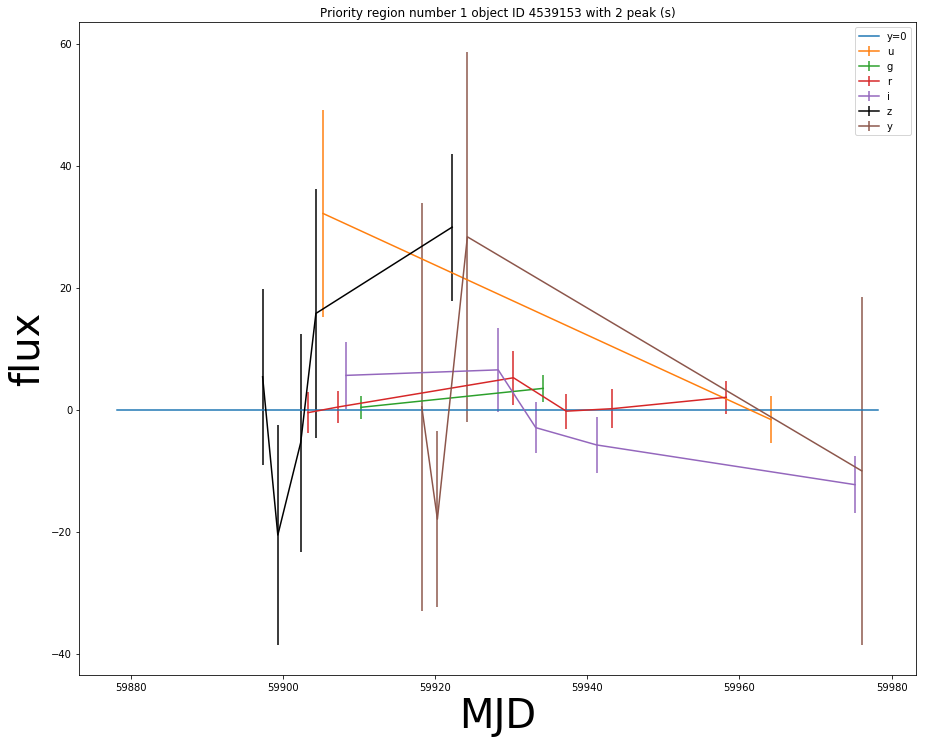

5102349
[60263.139, 60269.2225]


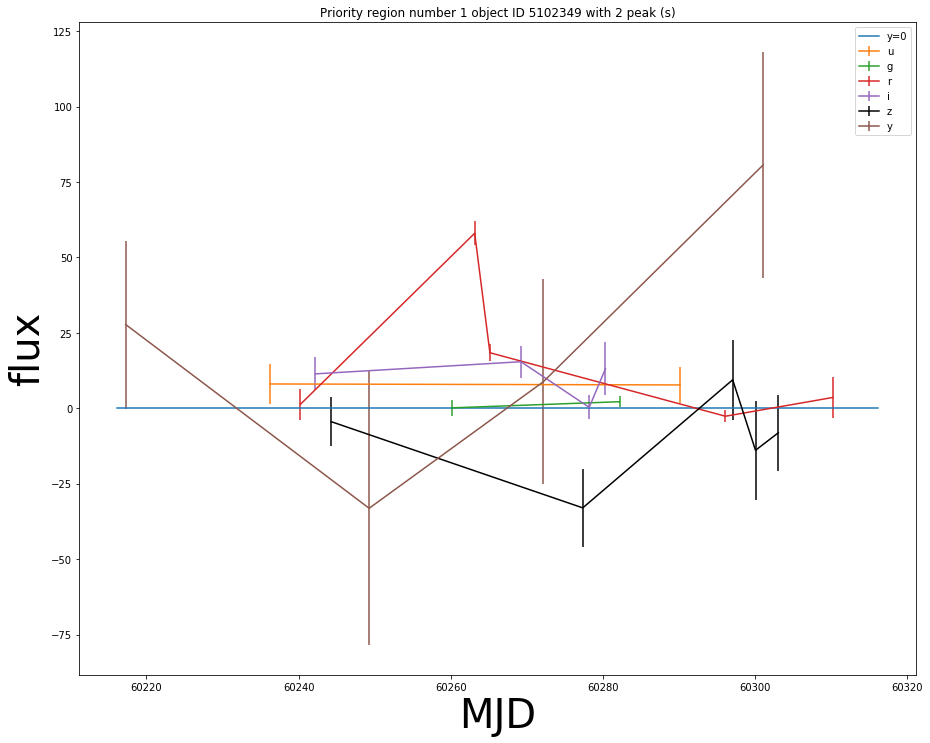

6460481
[60145.2378, 60144.2856, 60151.2562, 60163.4009]


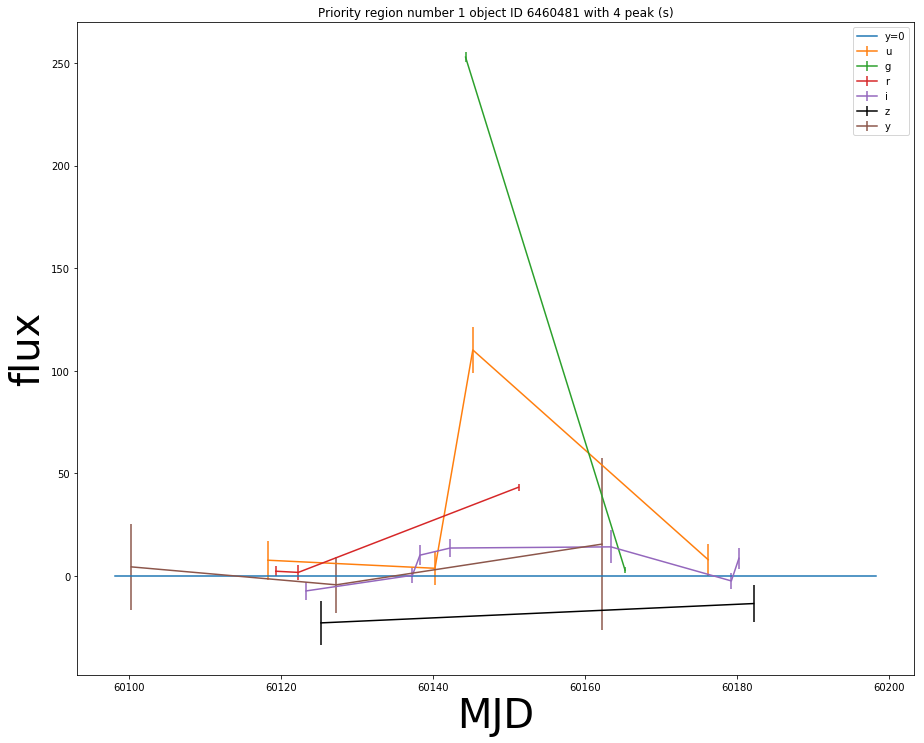

11574036
[60196.2624, 60204.2512]


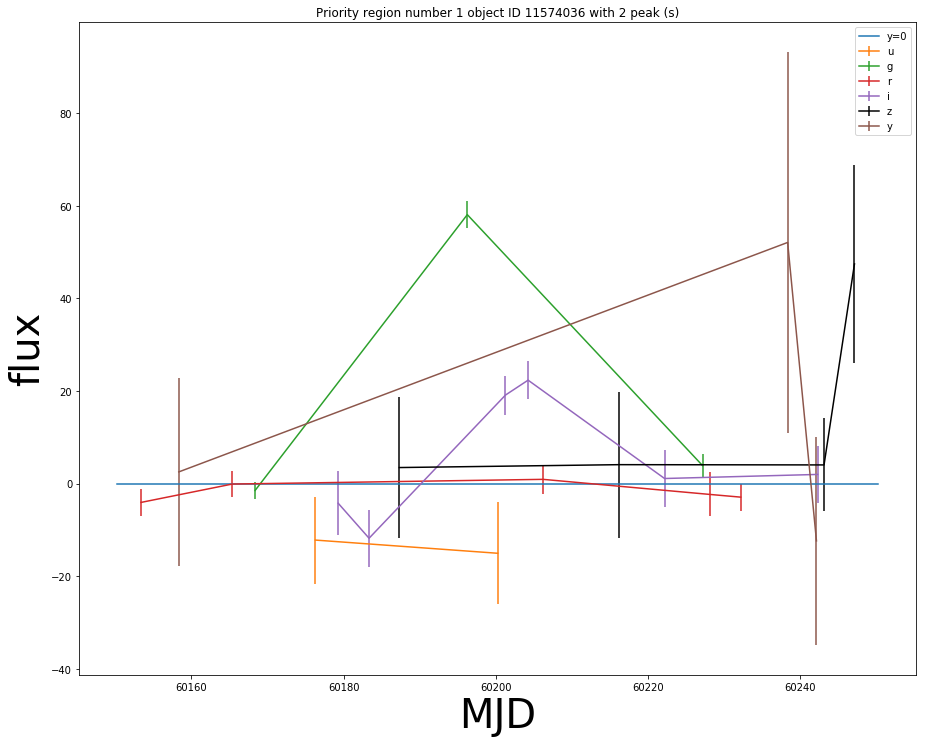

11742403
[59879.1424, 59883.1962, 59885.1196]


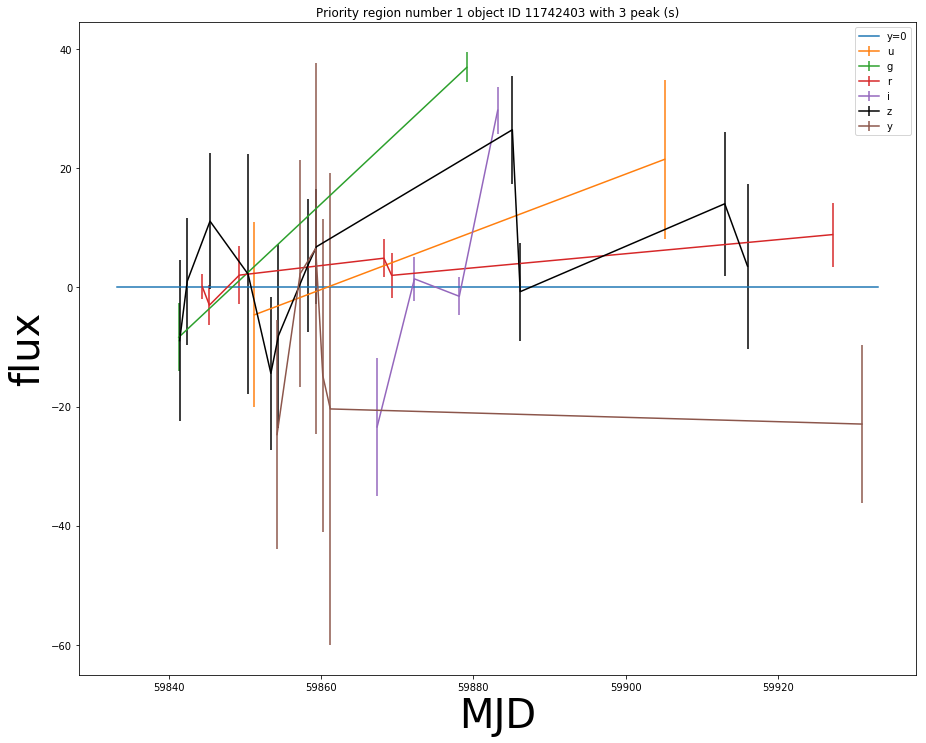

11904502
[60087.3949, 60085.3556, 60095.3784]


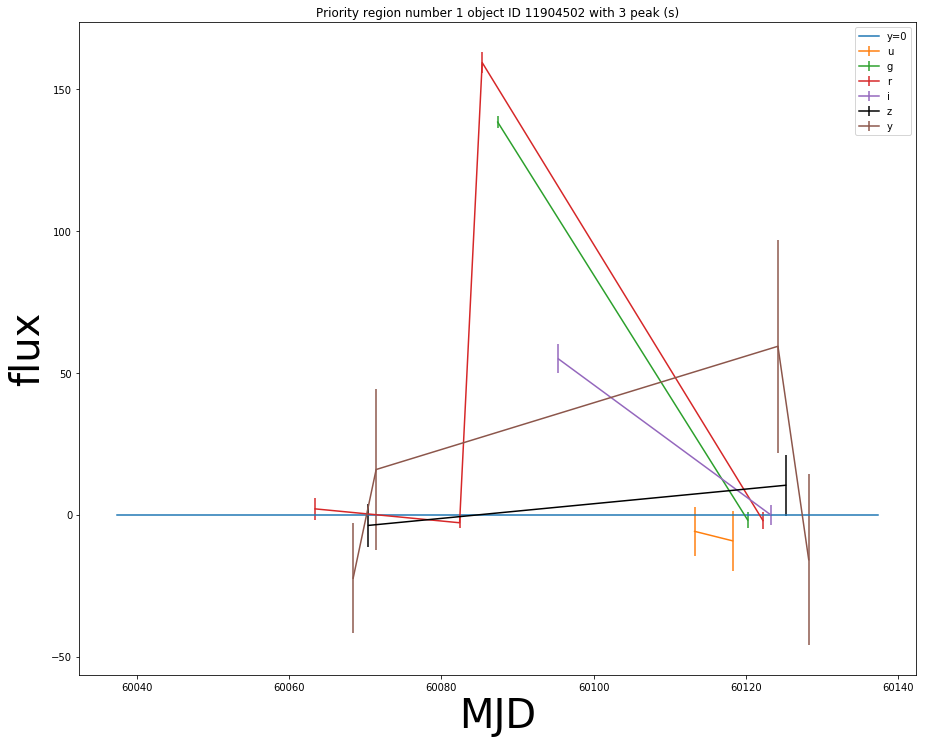

13537416
[60378.3098, 60387.1045]


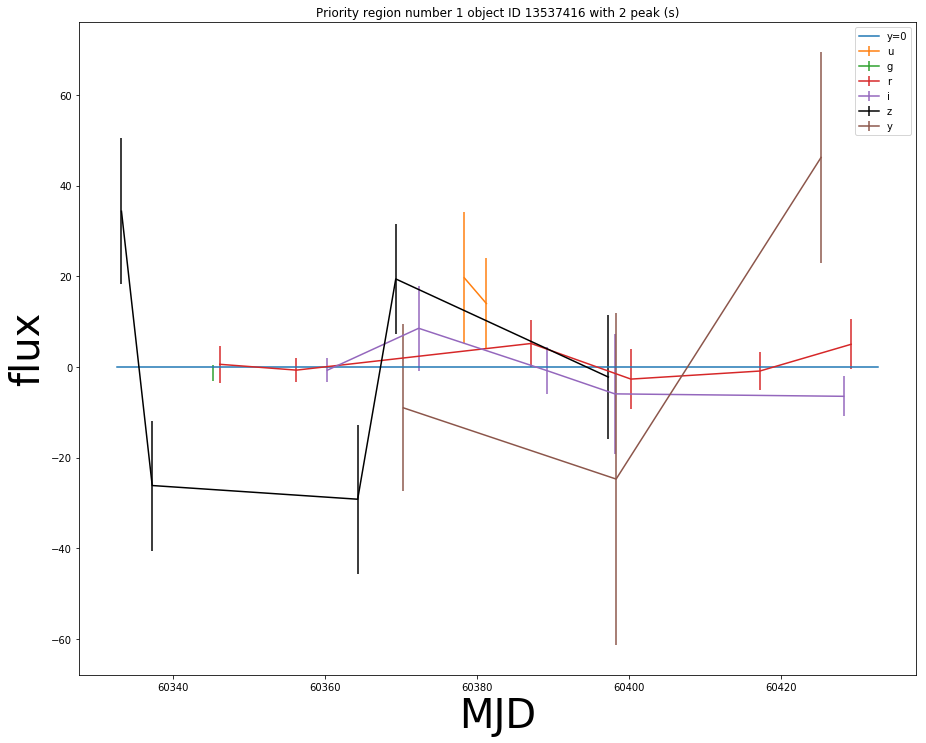

[59614.2293, 59618.1713]


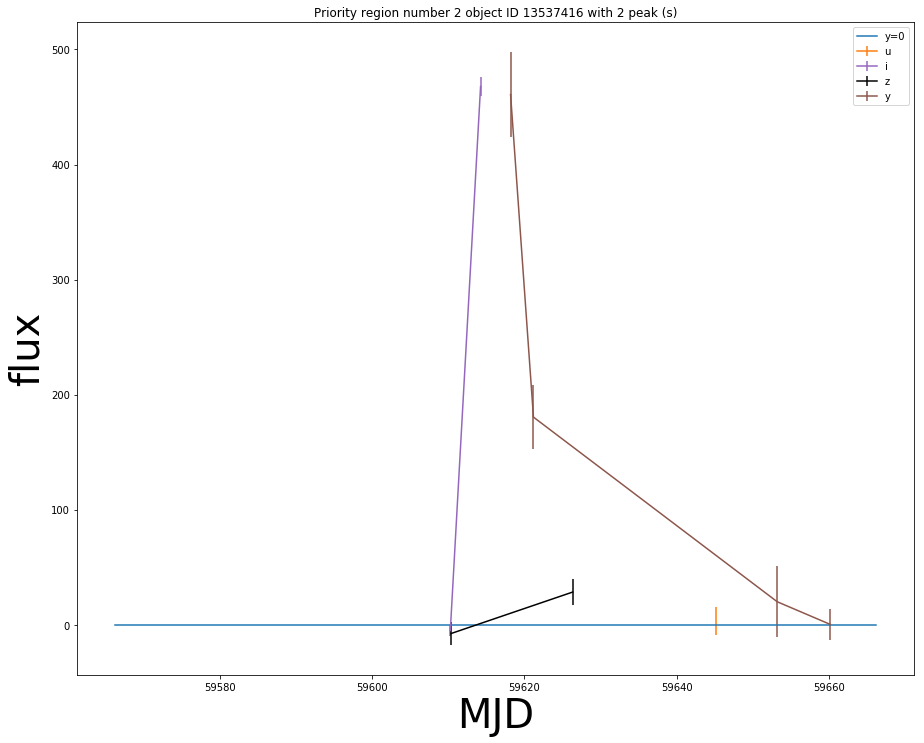

15897952
[59905.1652]


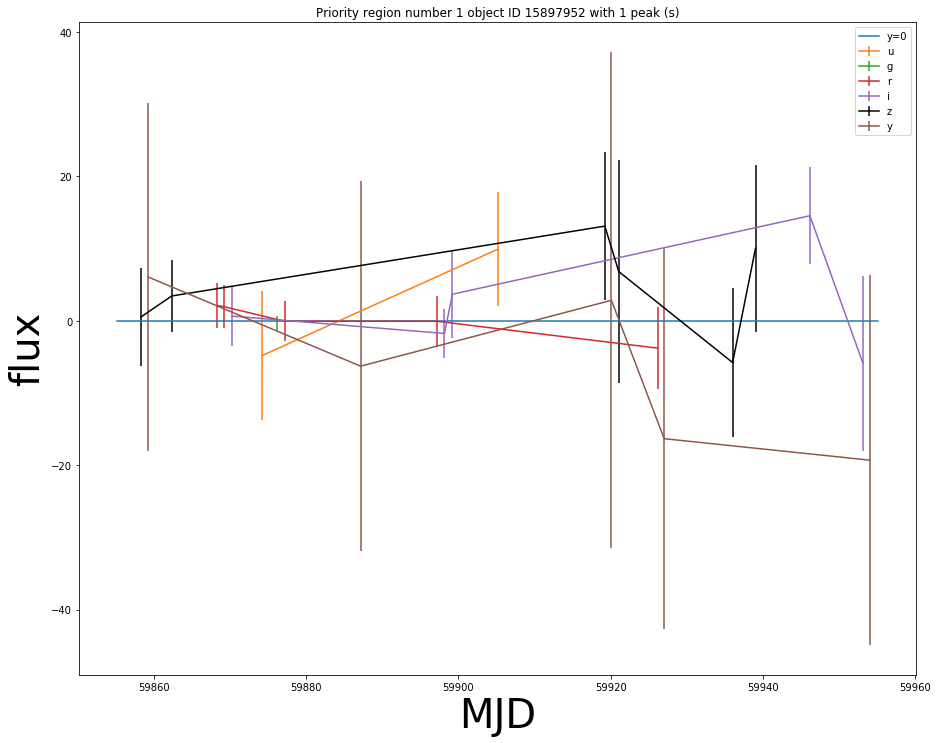

[59827.3556]


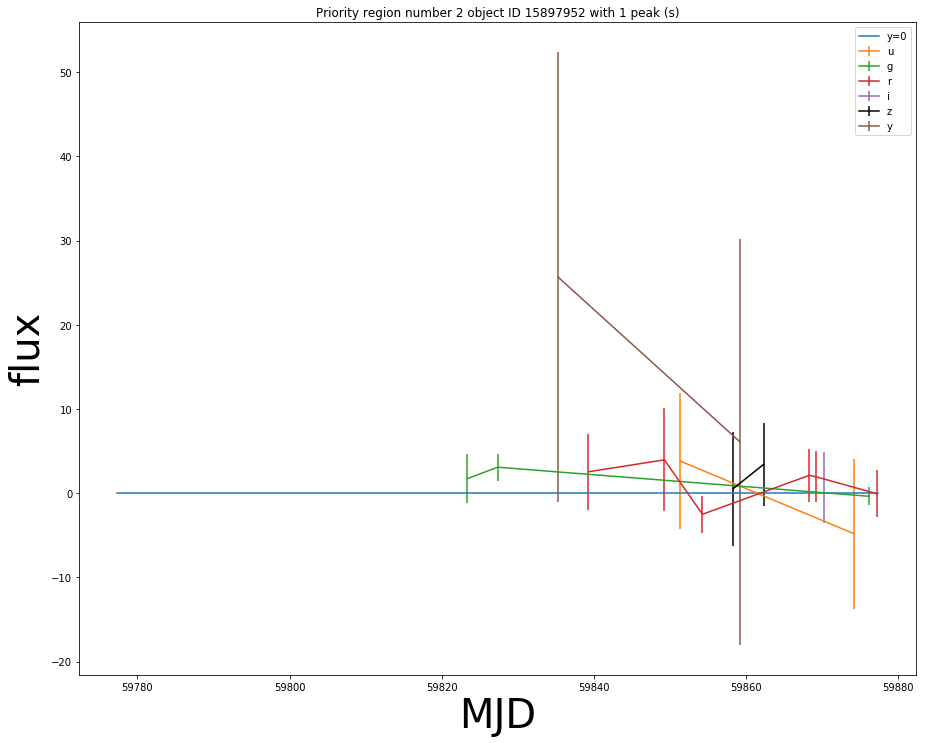

[60553.3362]


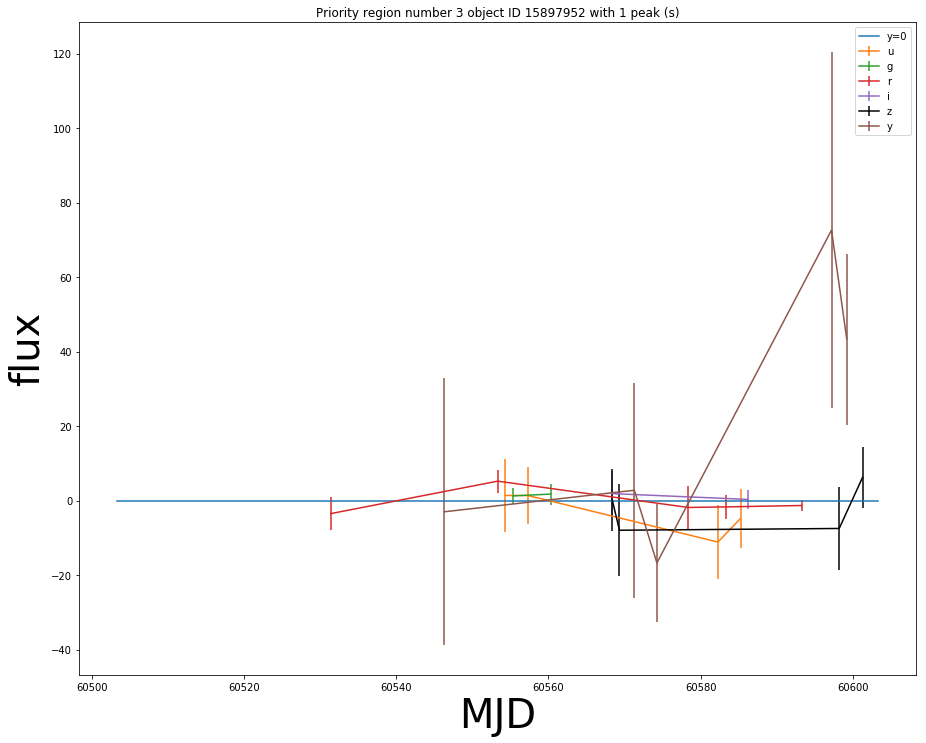

[59946.1938]


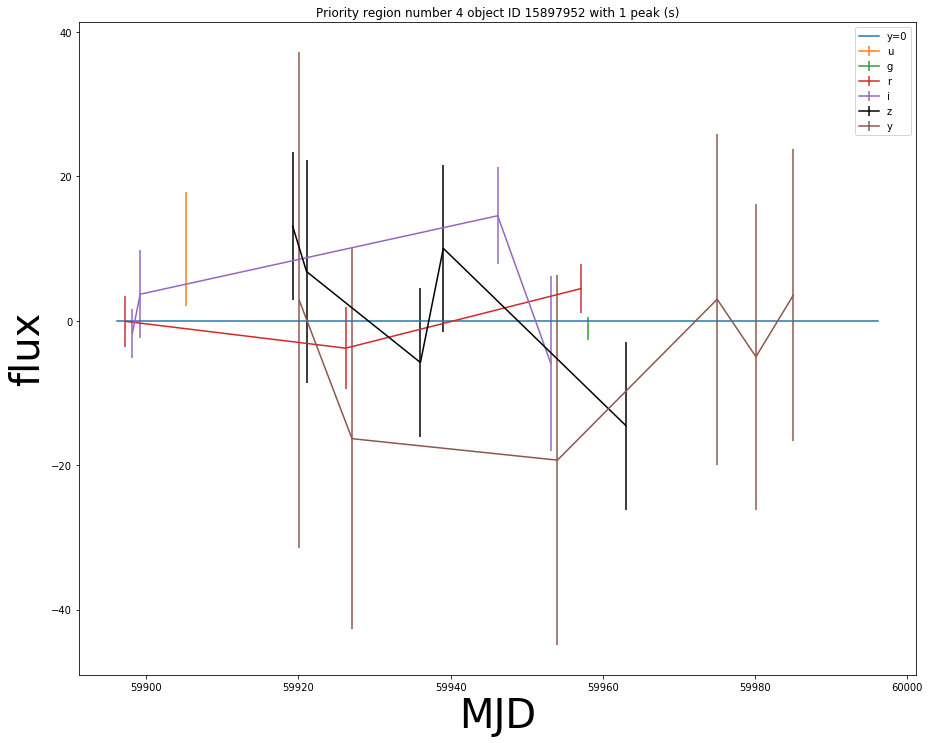

[60654.0488]


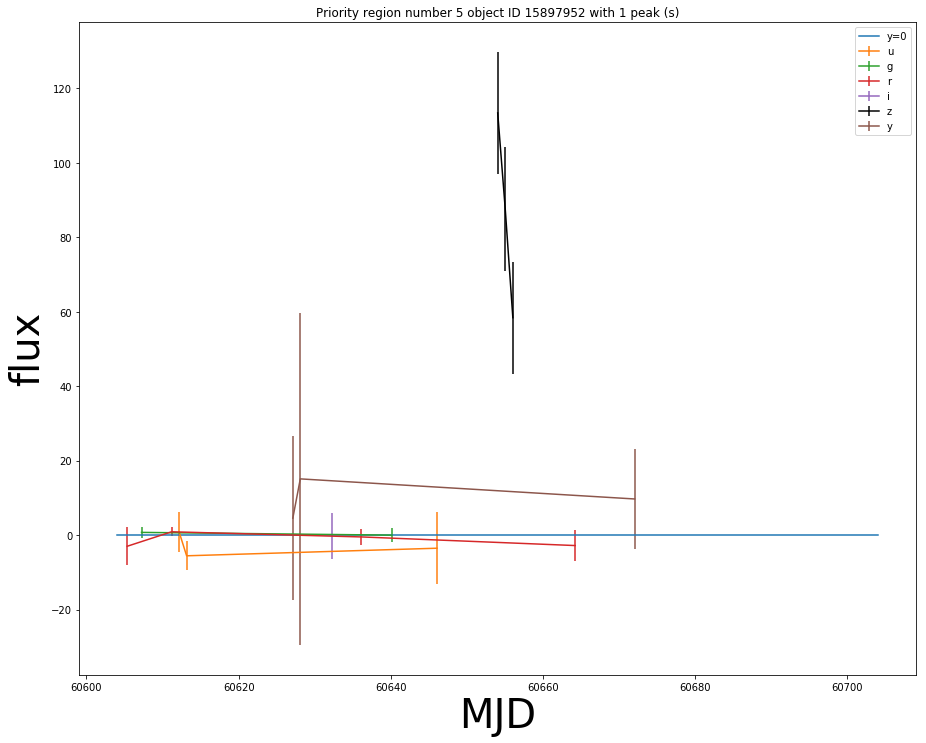

[60422.9762]


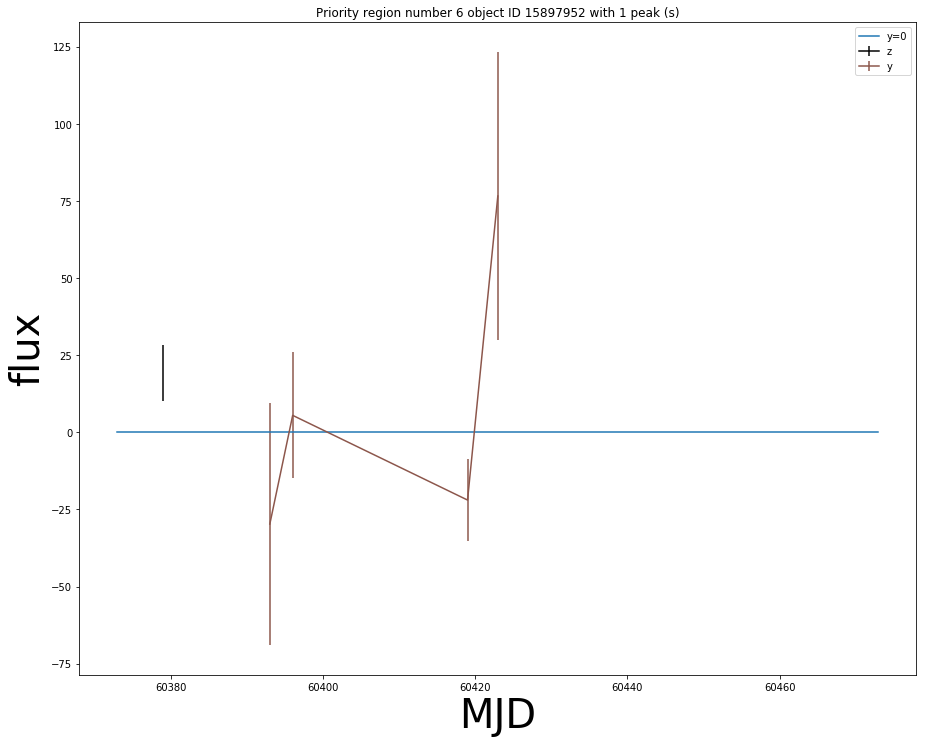

16173841
[60536.2547, 60534.2309, 60539.1818]


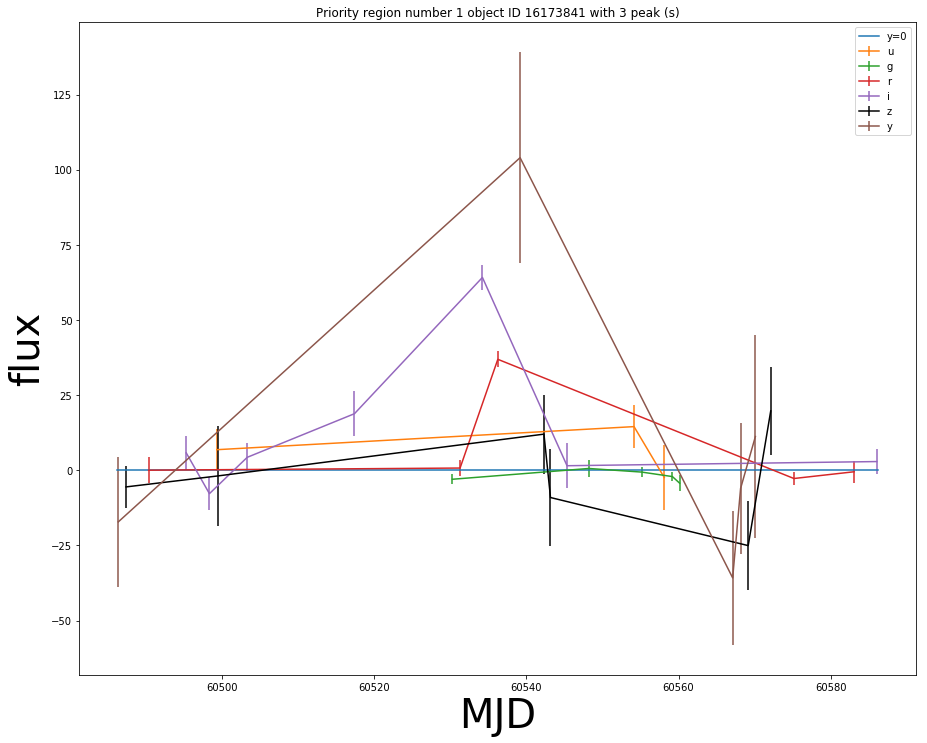

16452890
[60525.0419, 60531.0023, 60544.0789]


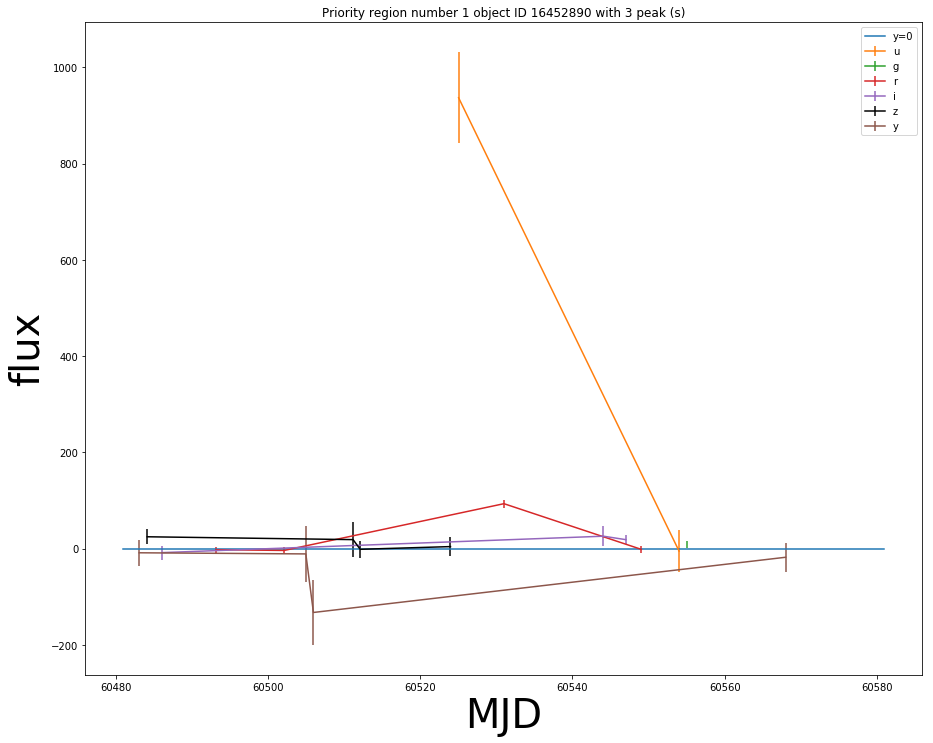

17116737
[59837.0173, 59843.1229]


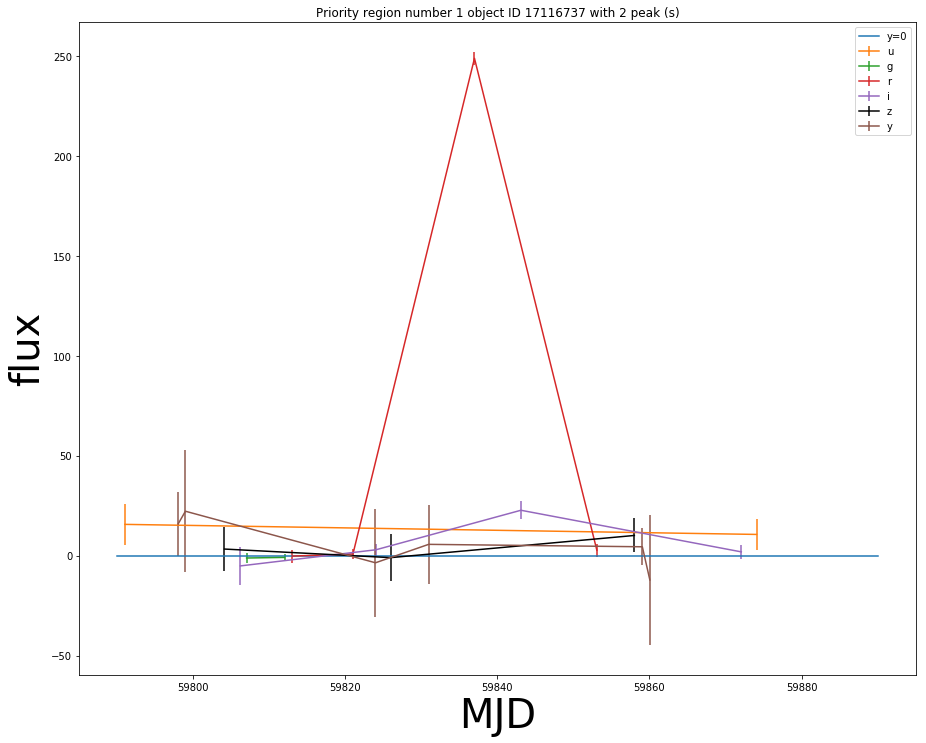

17958346
[60145.2661, 60144.4111, 60147.2939, 60158.2446]


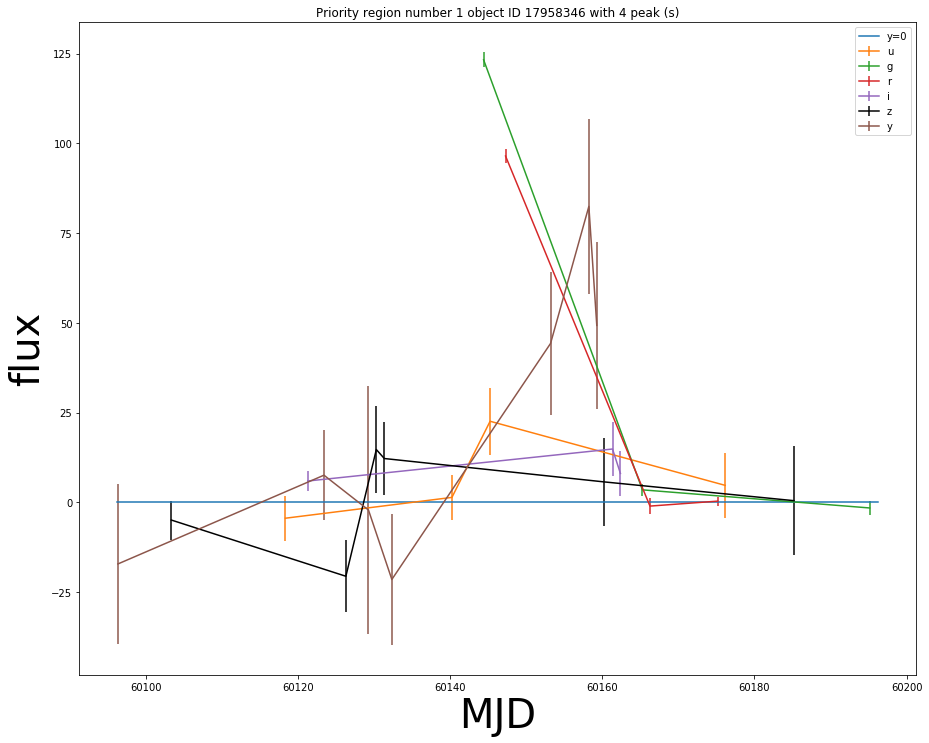

19183060
[60525.0877]


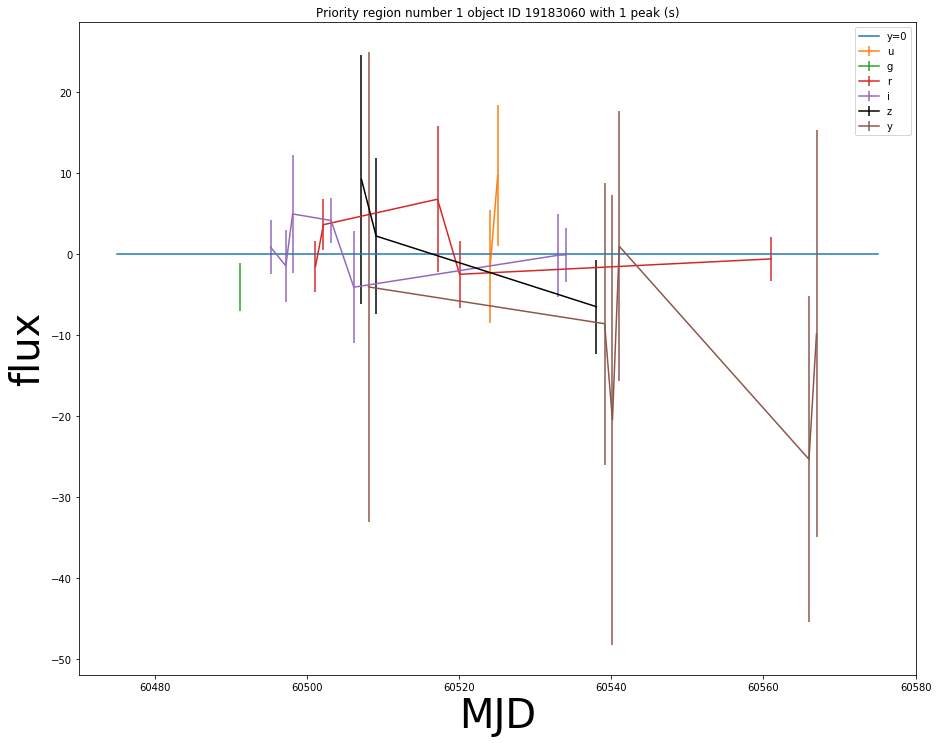

[60120.2162]


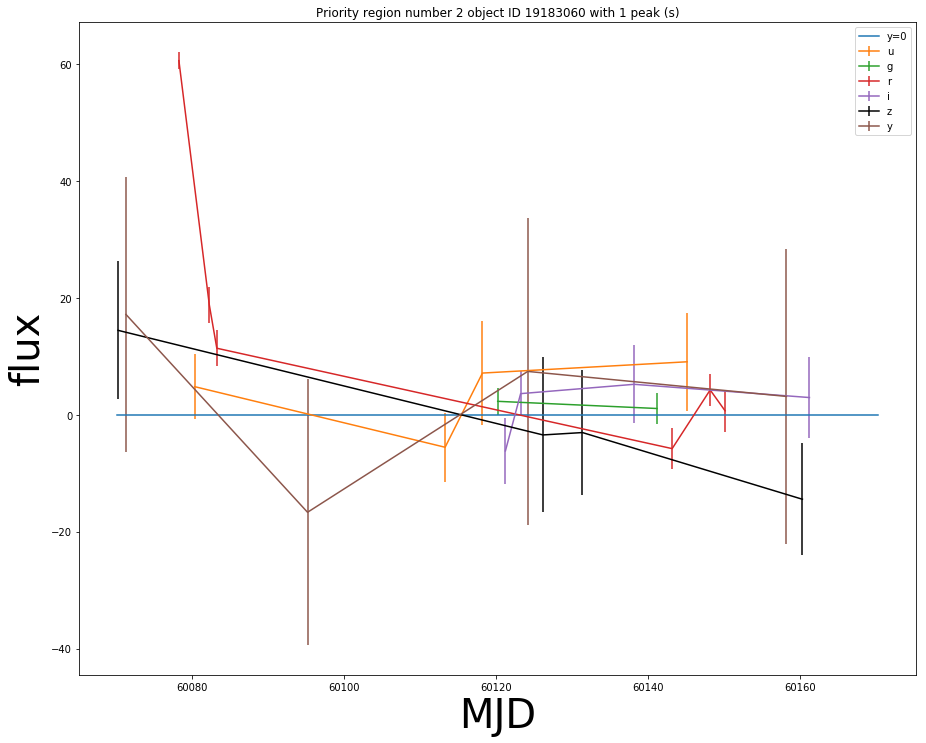

[60078.3189]


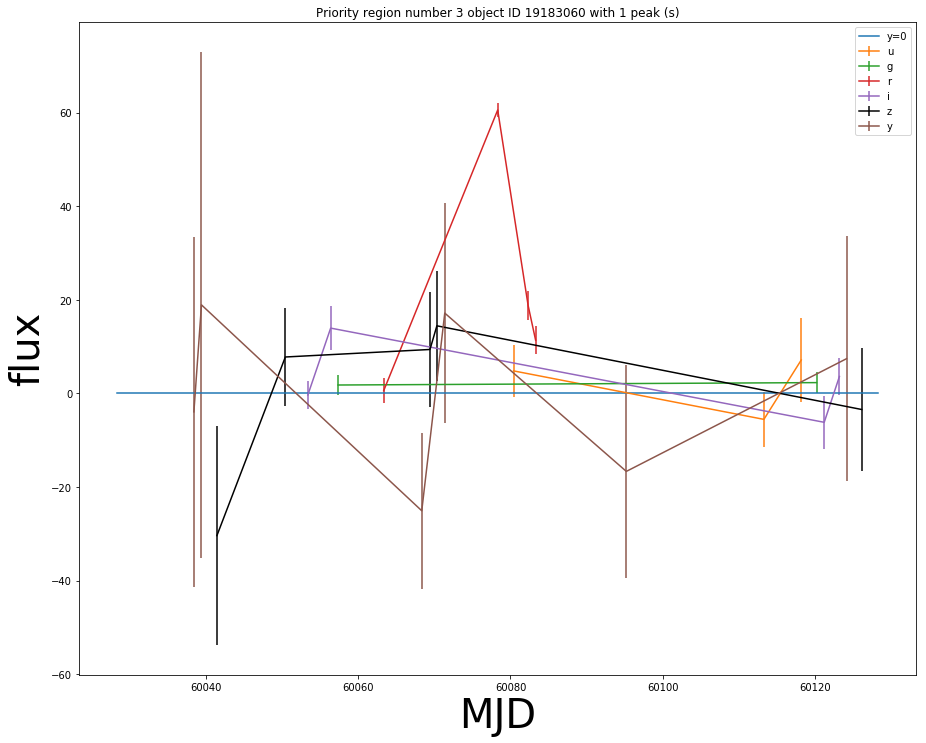

[60056.3665]


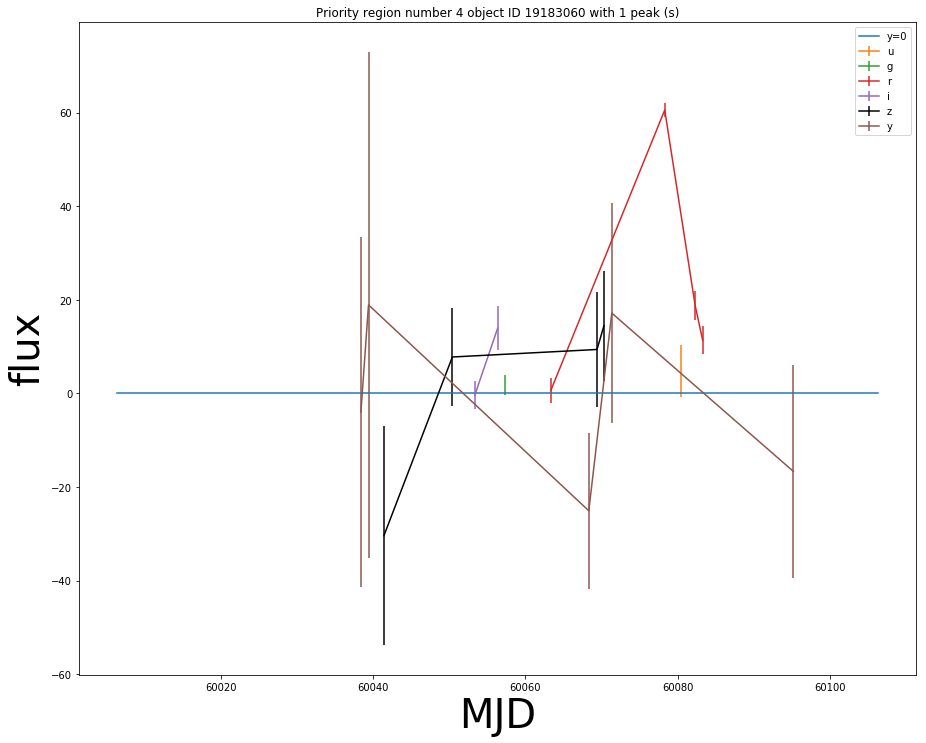

[59776.3604]


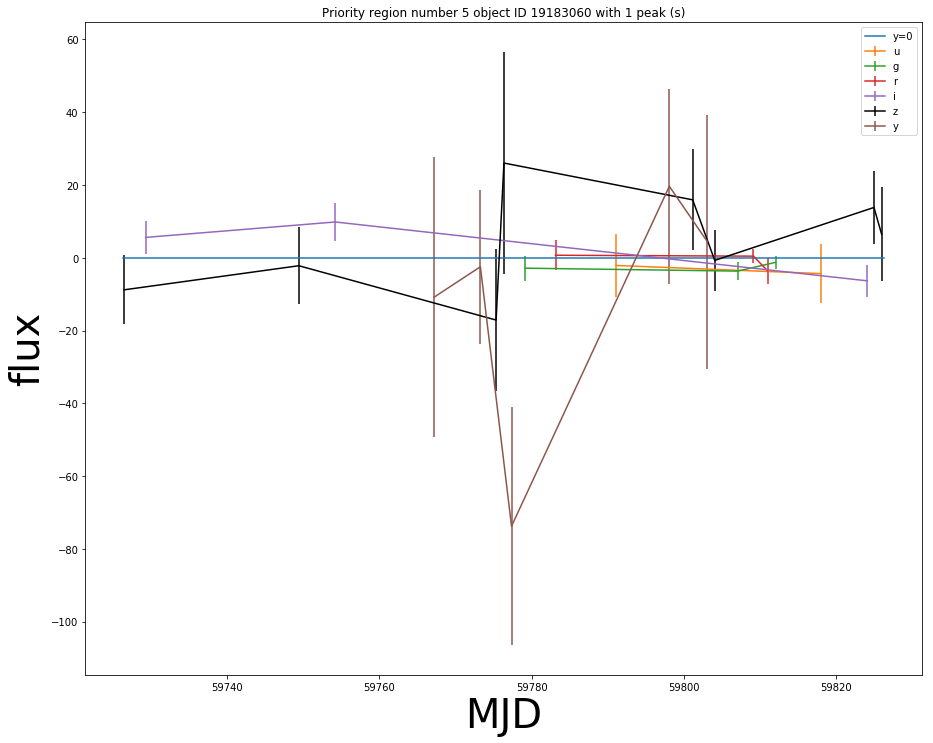

[60428.3855]


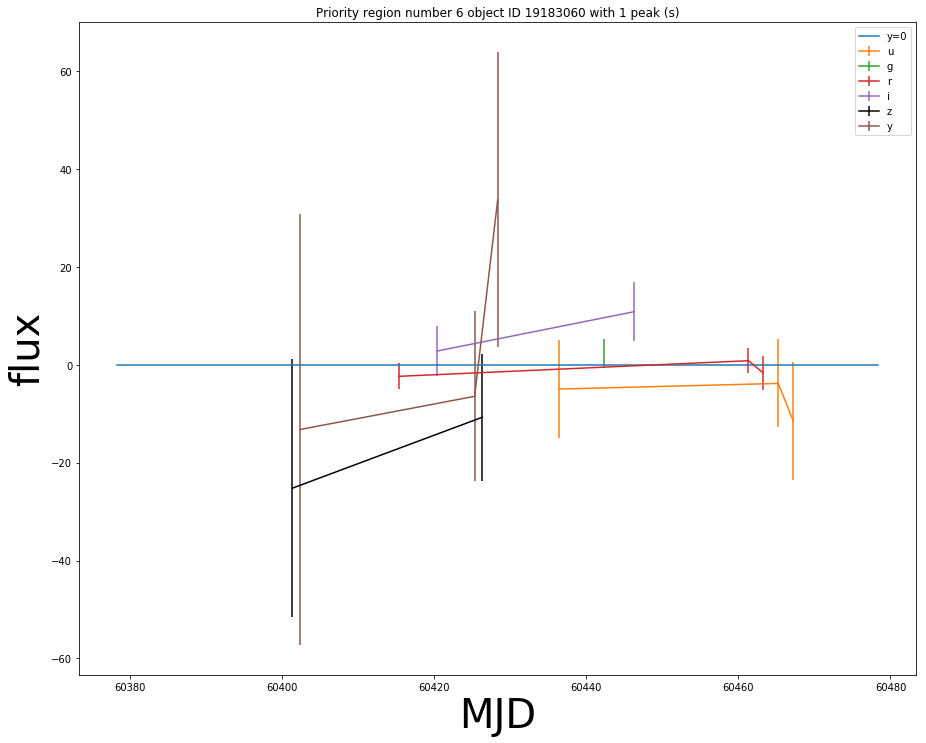

20539244
[60141.187, 60149.2197]


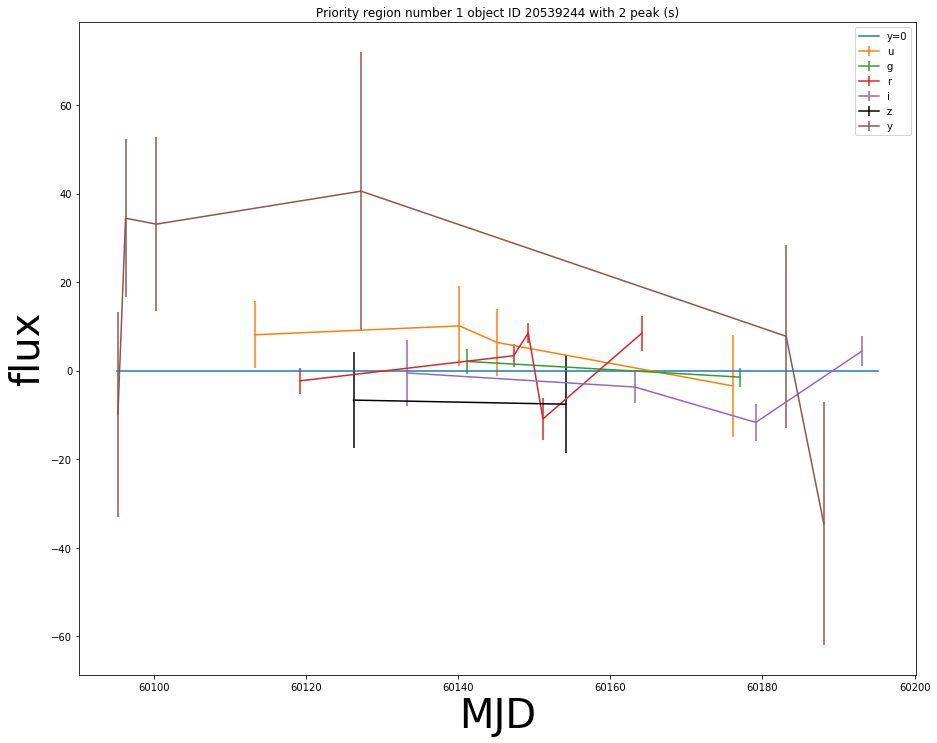

[60426.4118, 60428.3523]


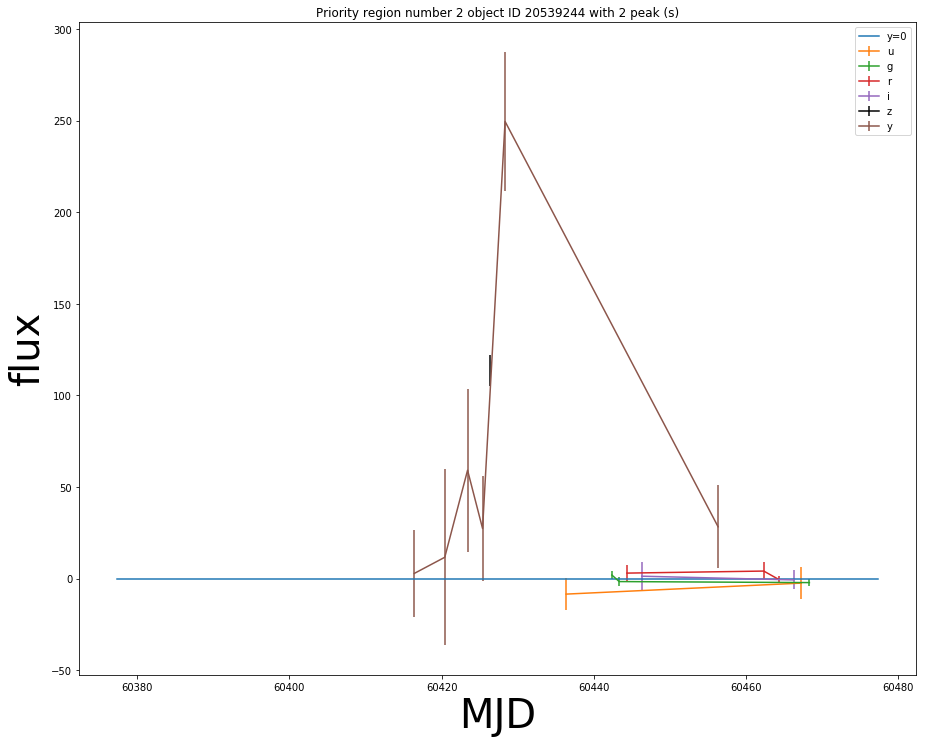

22245279
[59798.3837, 59801.17, 59800.1145]


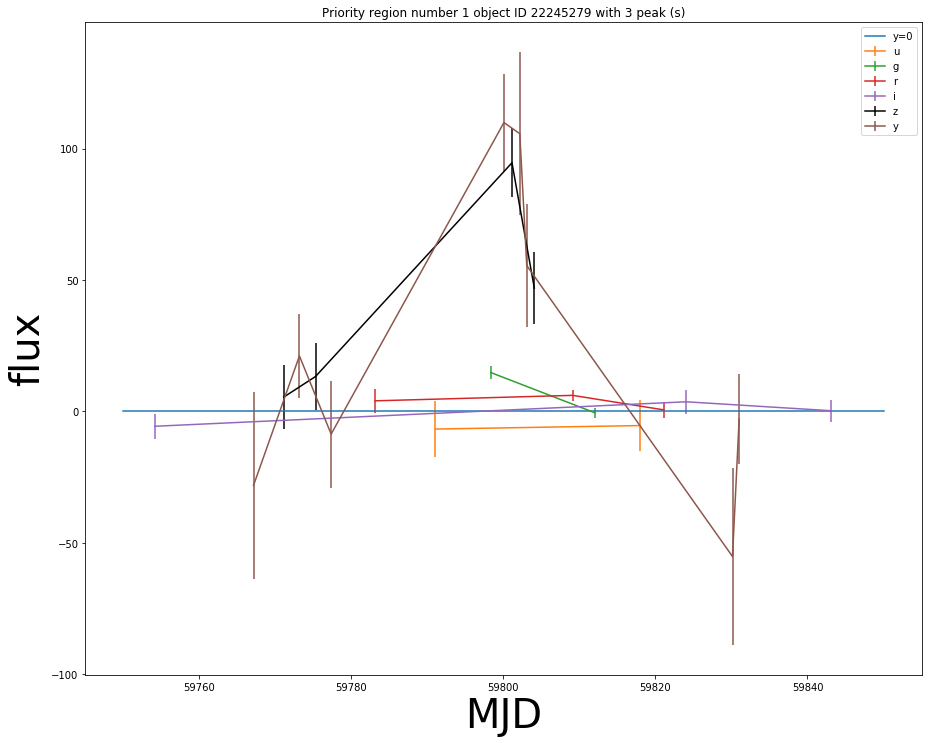

23798919
[60198.2784, 60196.3018, 60201.2769]


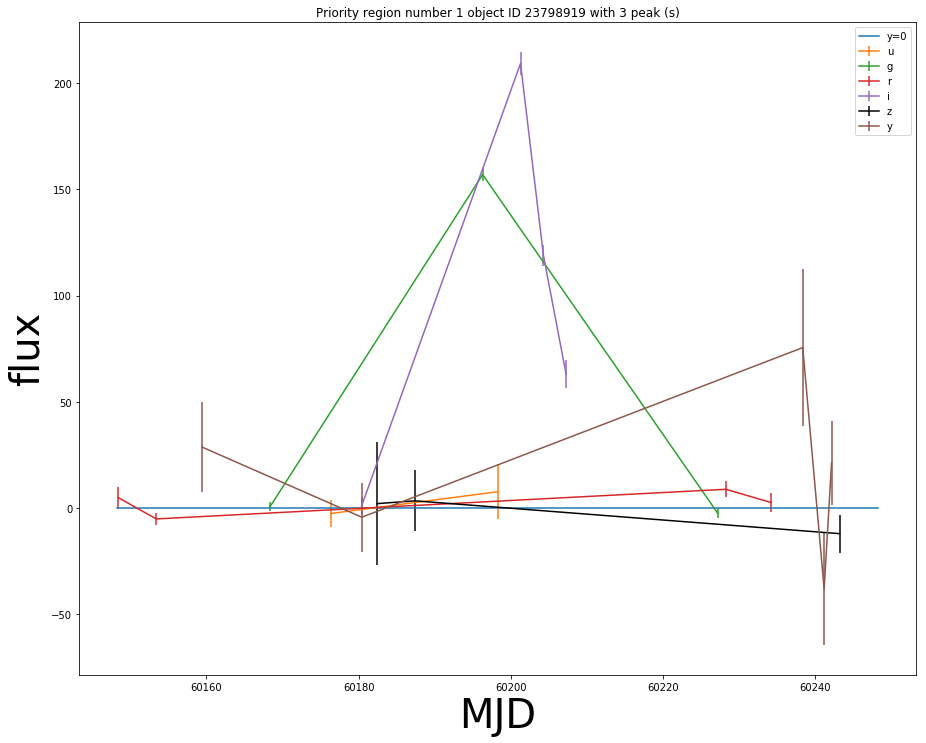

26684850
[60666.1044, 60663.3127]


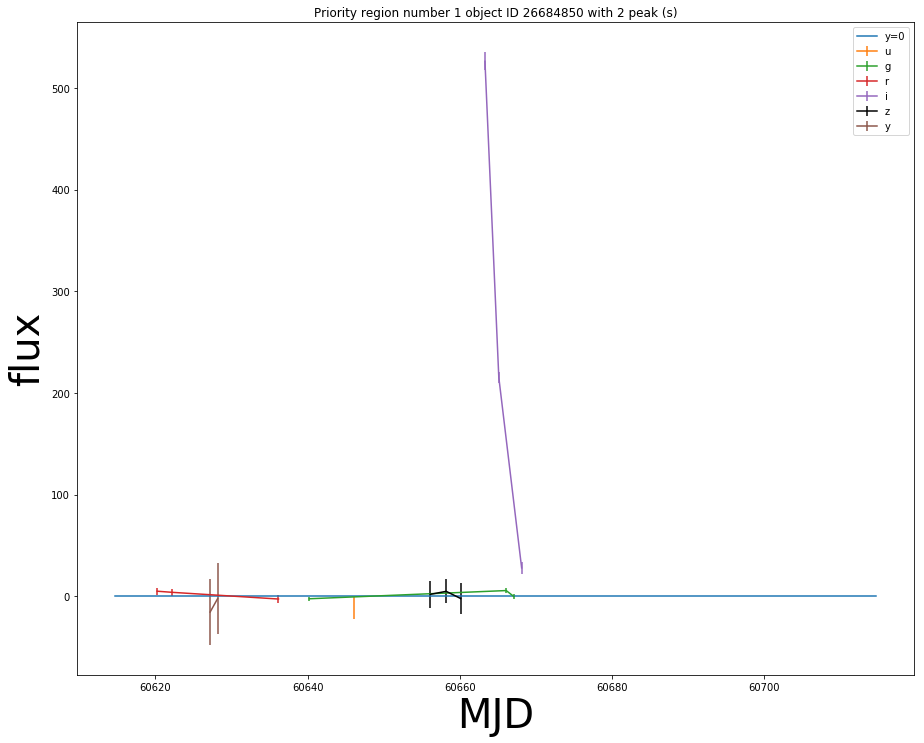

27883625
[60385.308, 60389.1704]


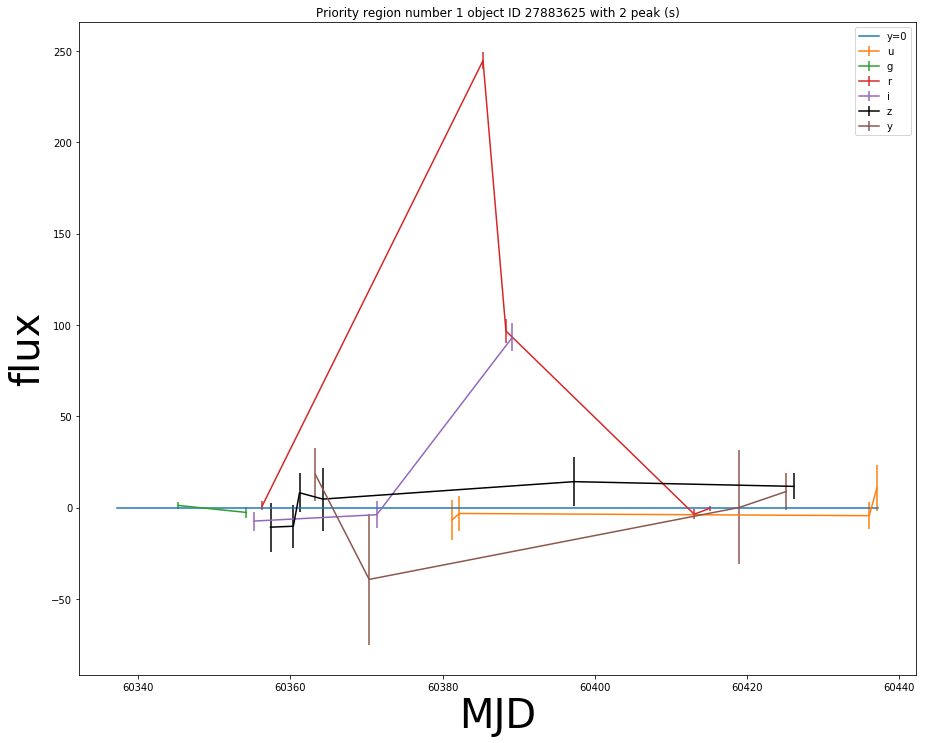

31292040
[59824.0791, 59826.9823, 59831.0197]


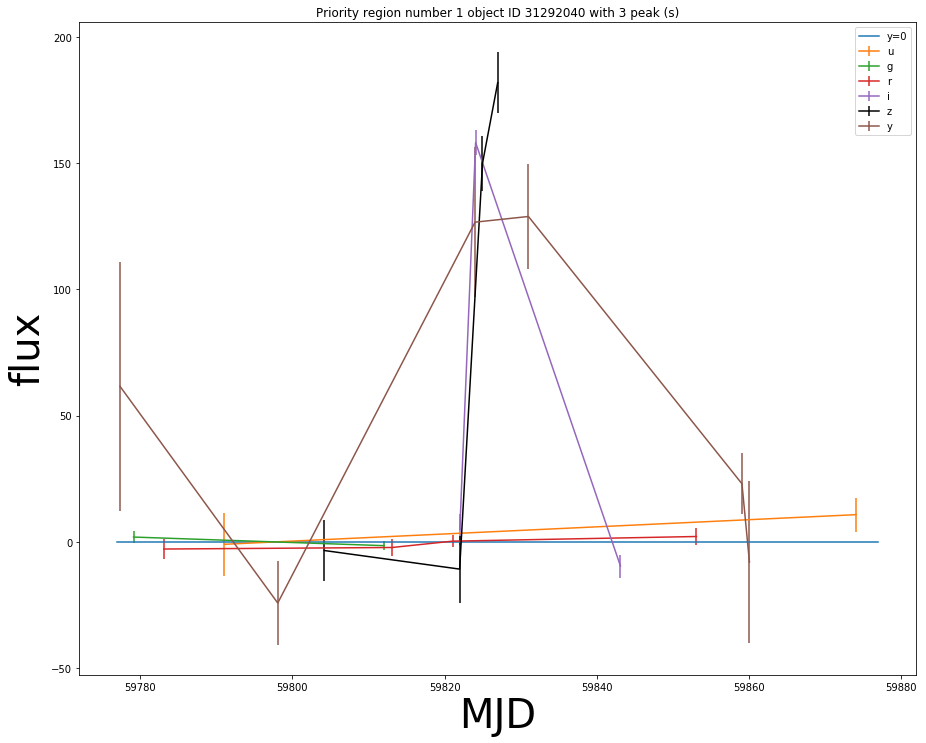

31563138
[59779.1239, 59789.1151]


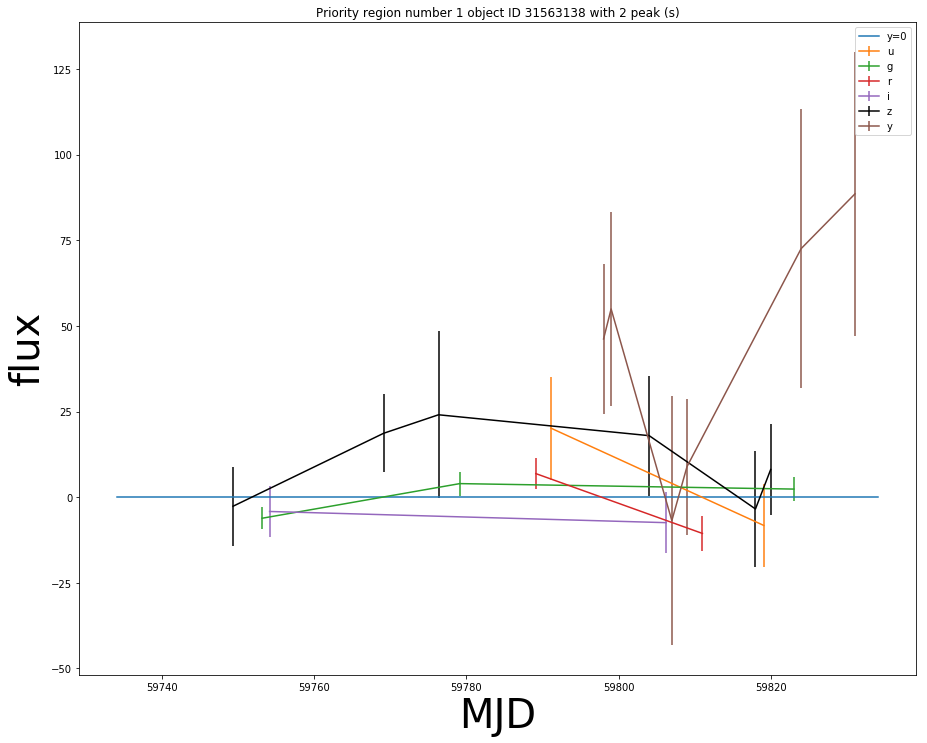

33065798
[60243.0076, 60245.1375]


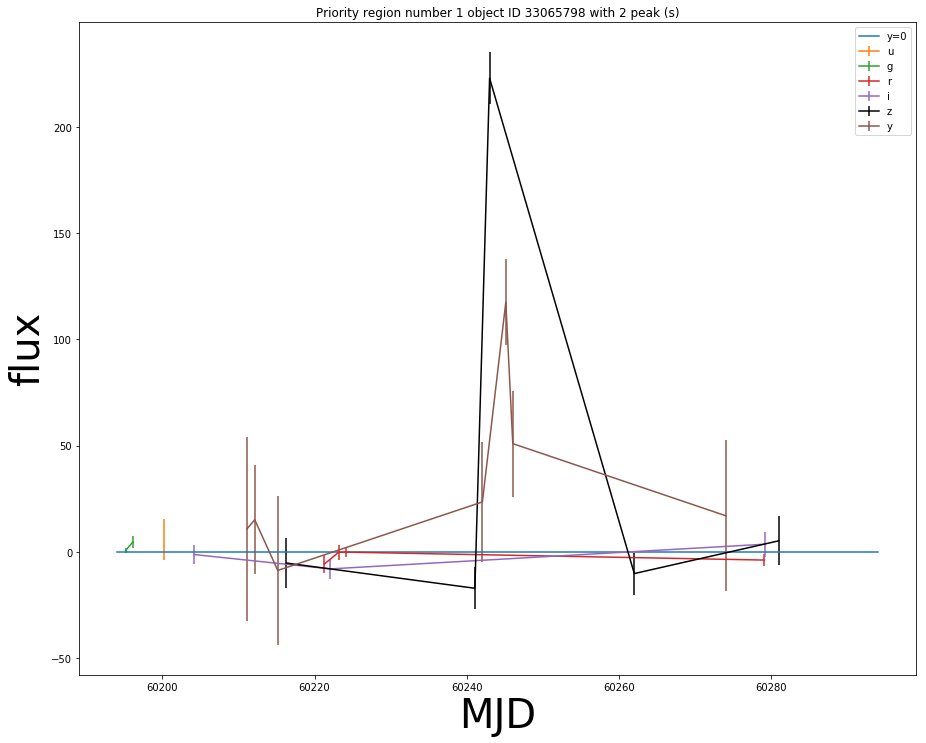

35411122
[59801.012, 59800.0591]


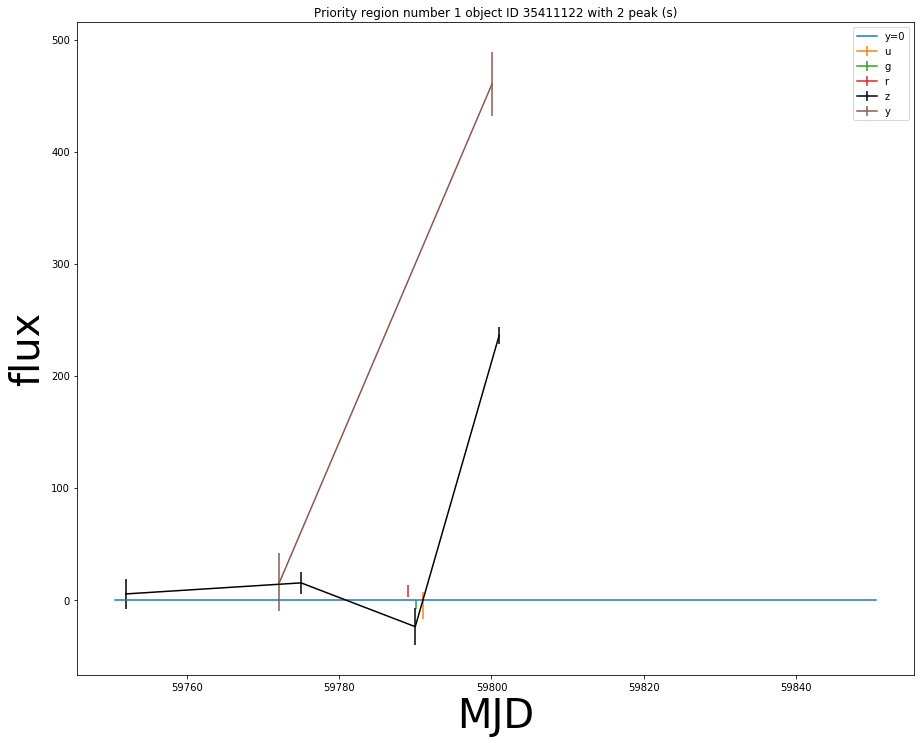

35630788
[60446.0295, 60455.0266, 60454.0495]


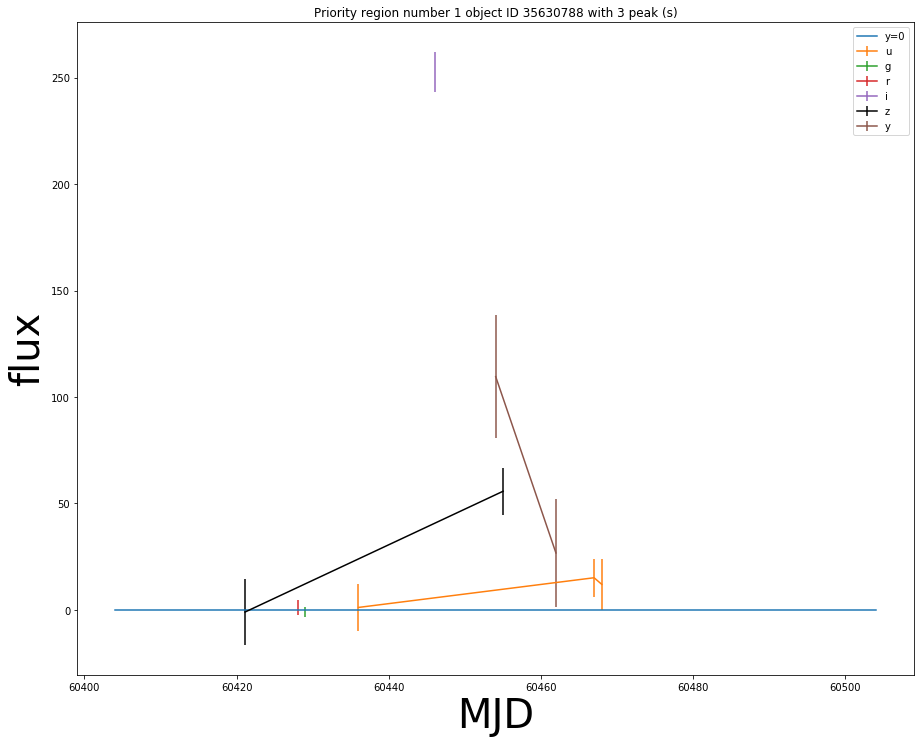

39745050
[60606.2043, 60605.3138, 60603.3196]


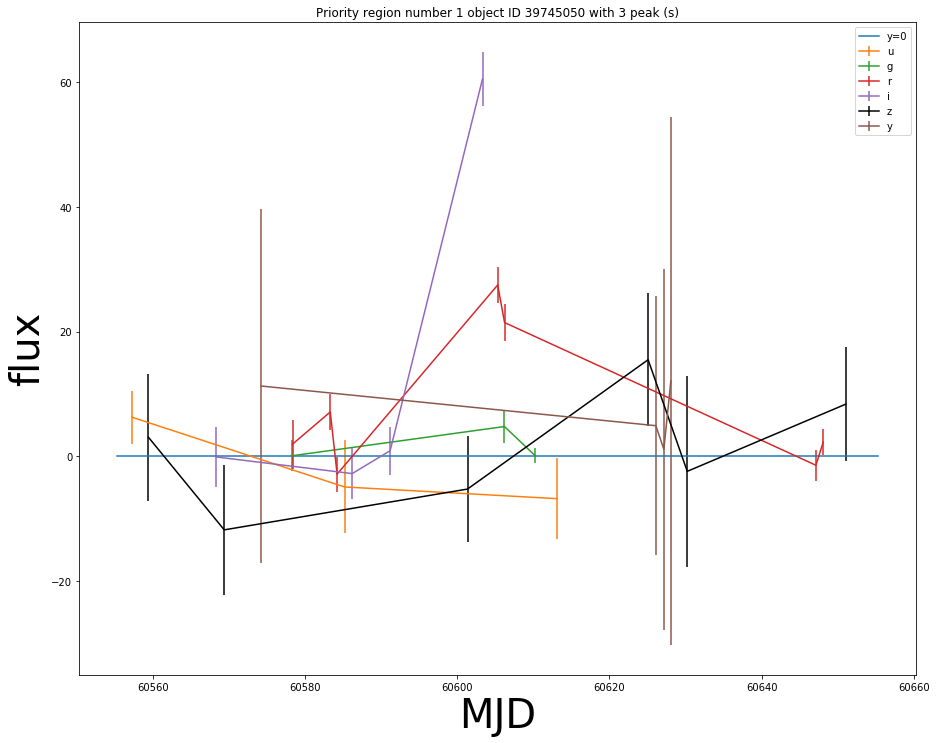

44564061
[60400.1426, 60398.3118]


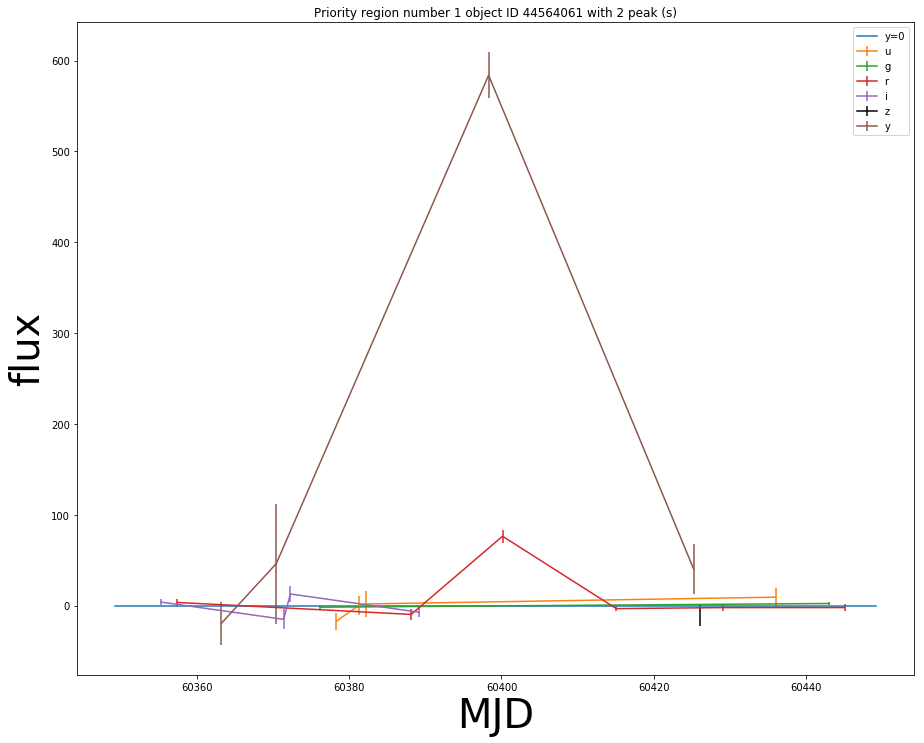

44864629
[60144.1061, 60150.0713, 60147.9758]


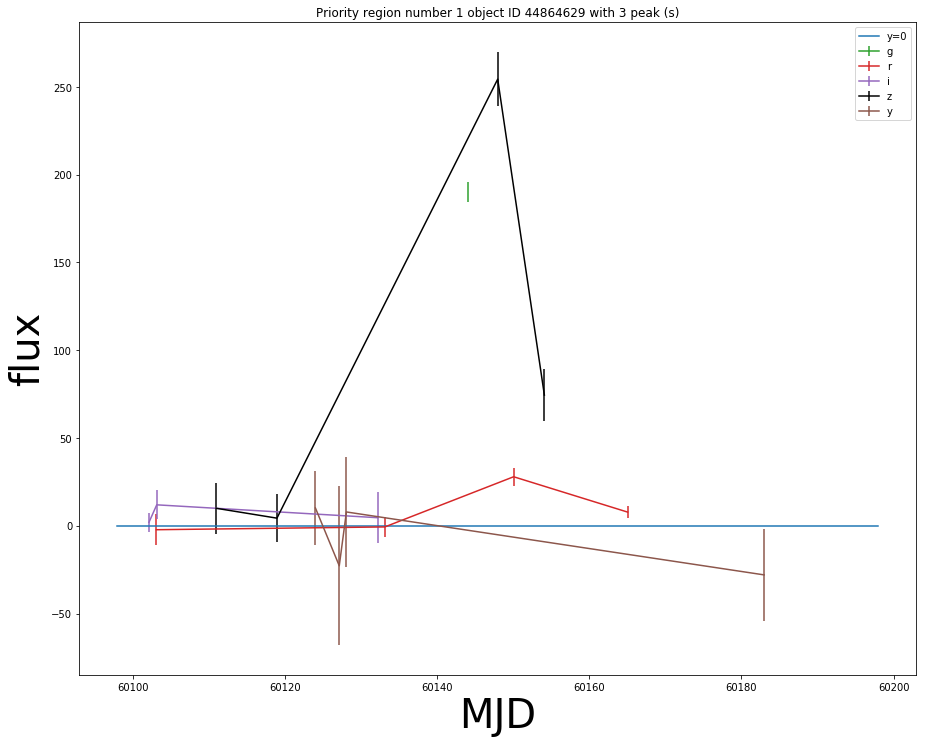

46213566
[60168.345, 60175.3095, 60184.3518]


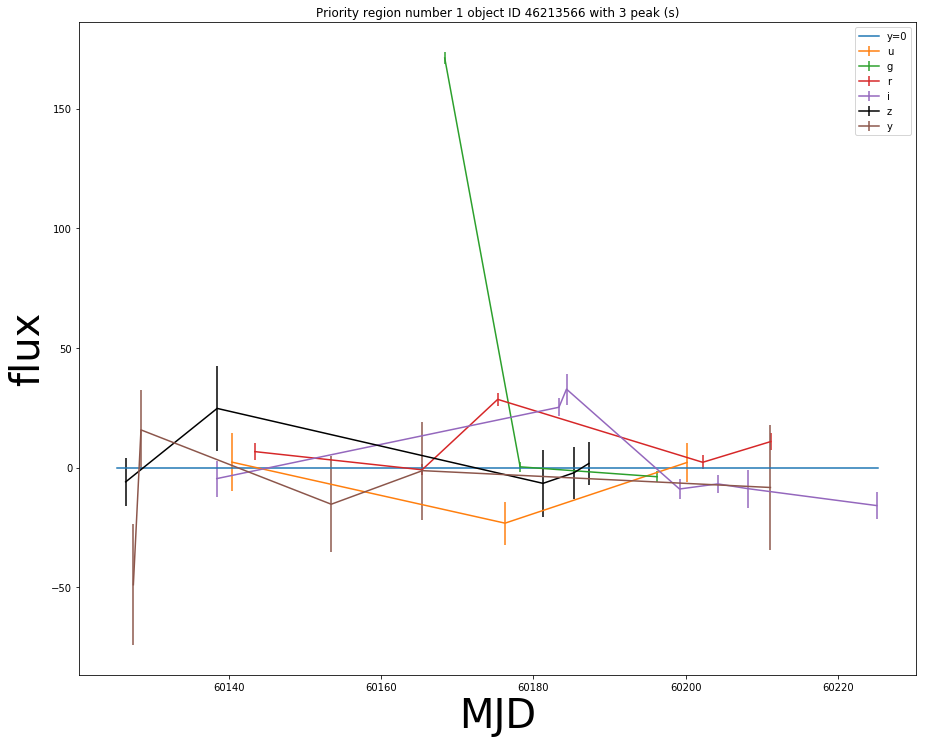

46489715
[60505.1883, 60507.2701, 60508.1756]


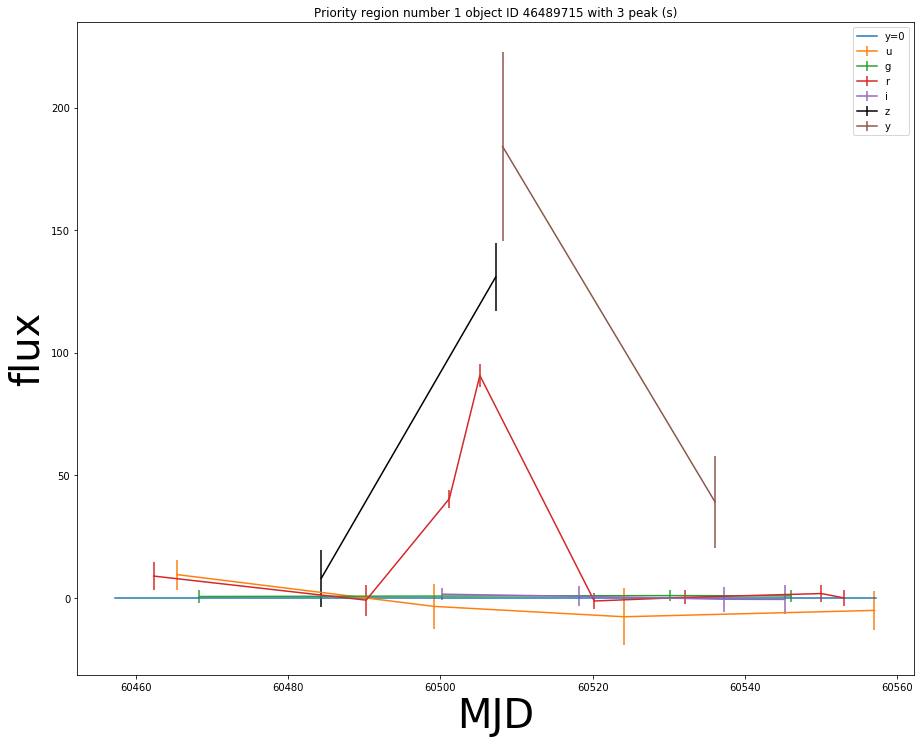

46553925
[60382.1254, 60373.066]


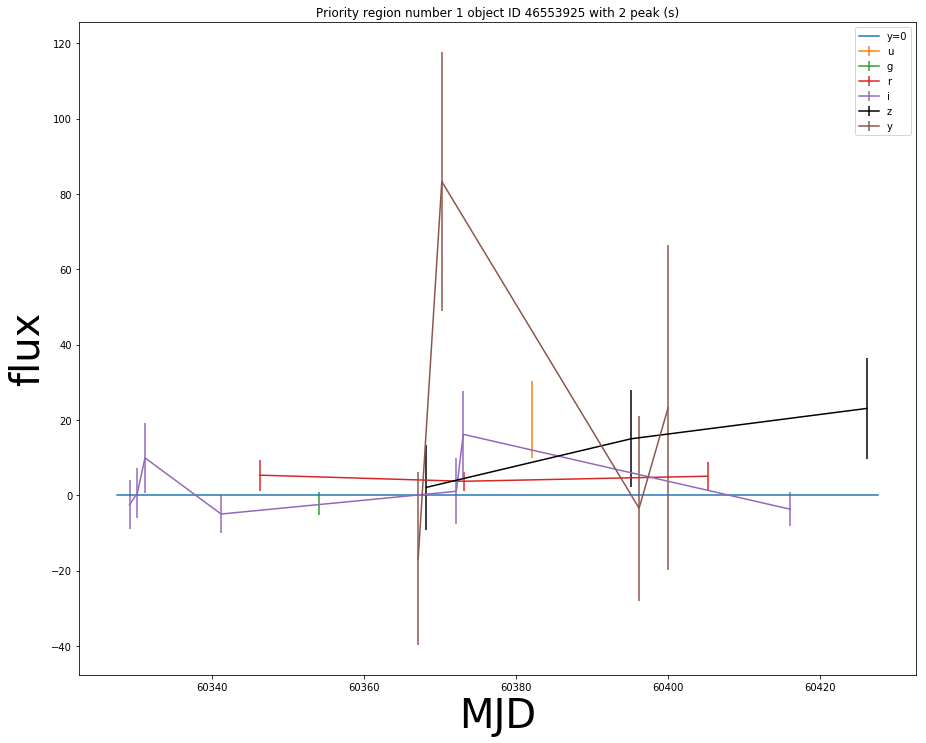

[60648.3149, 60646.3521]


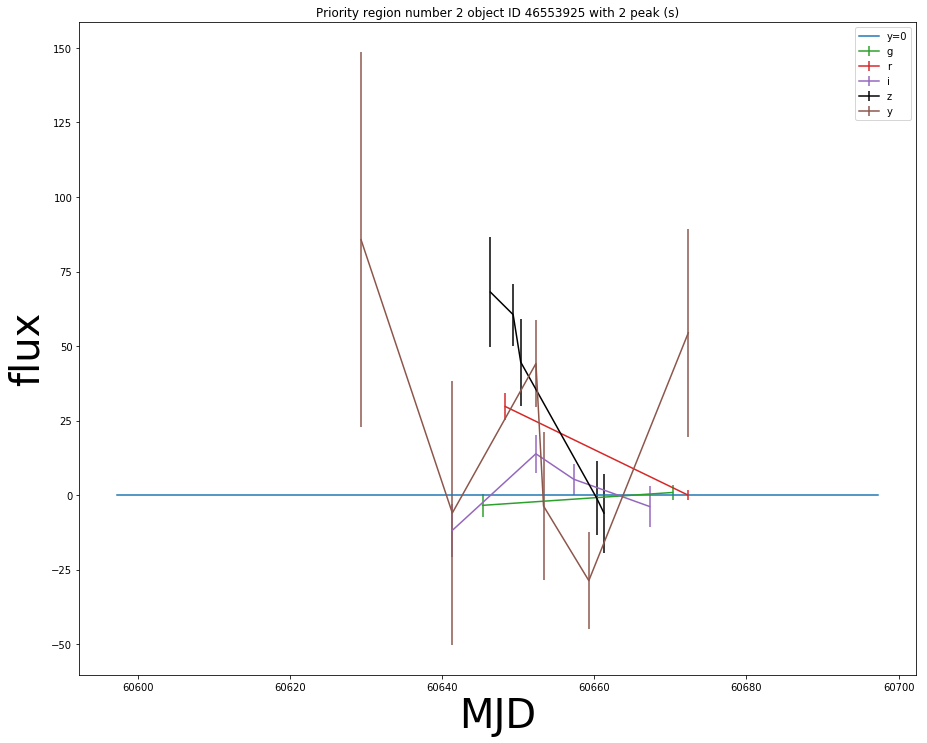

47142591
[59607.3516, 59598.3602, 59594.2029]


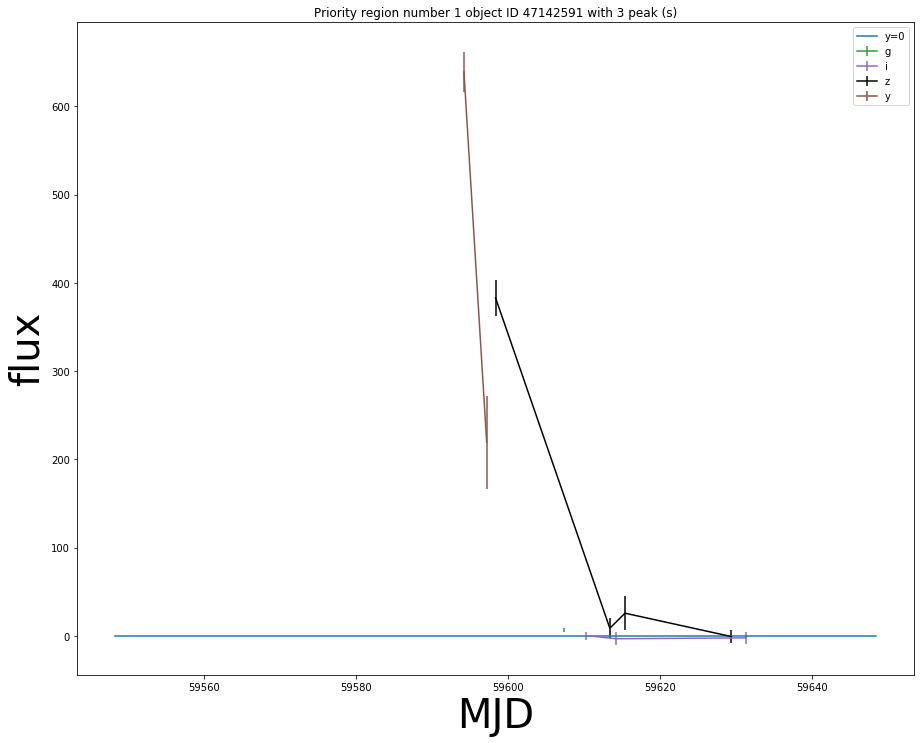

48098969
[60376.2153, 60373.2663, 60372.2801, 60364.2707, 60370.3141]


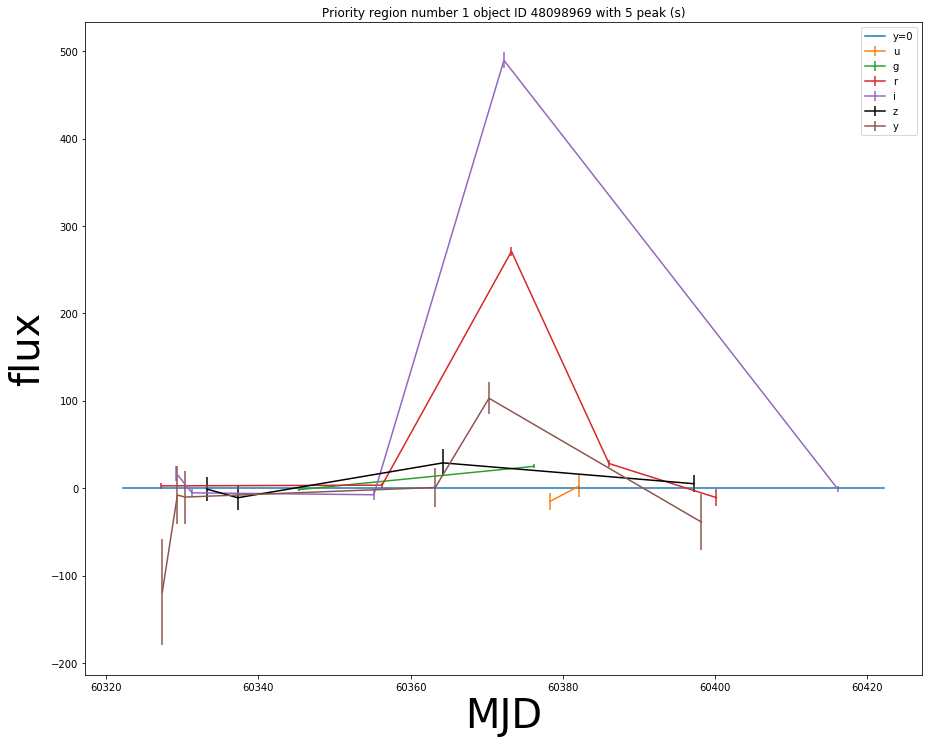

49519074
[60584.9965, 60592.9987]


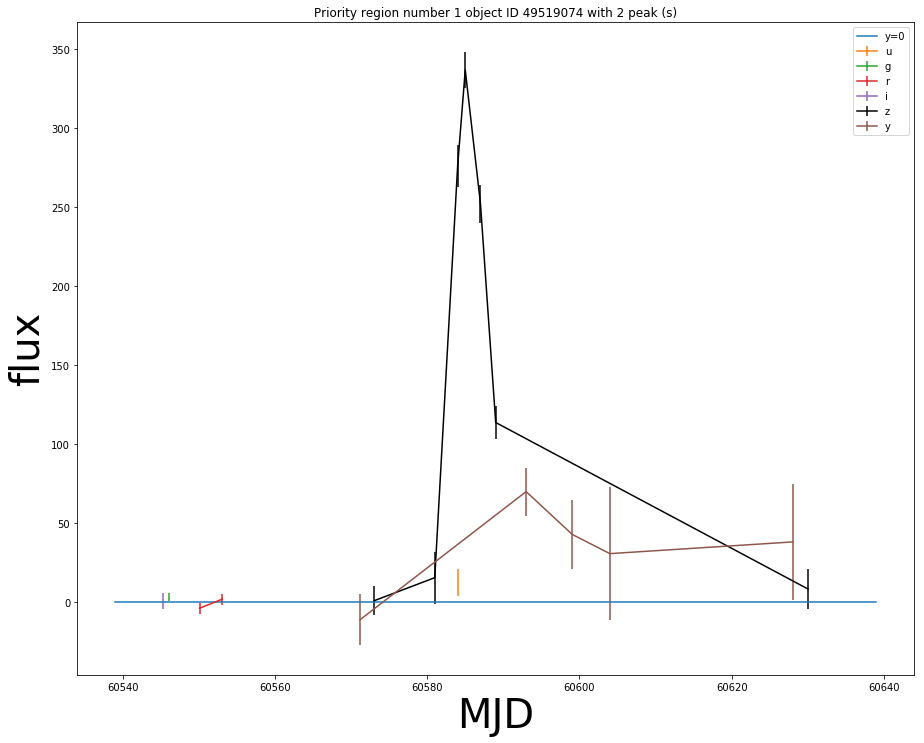

49850869
[59819.0778, 59823.0467, 59821.0505, 59826.993, 59830.984]


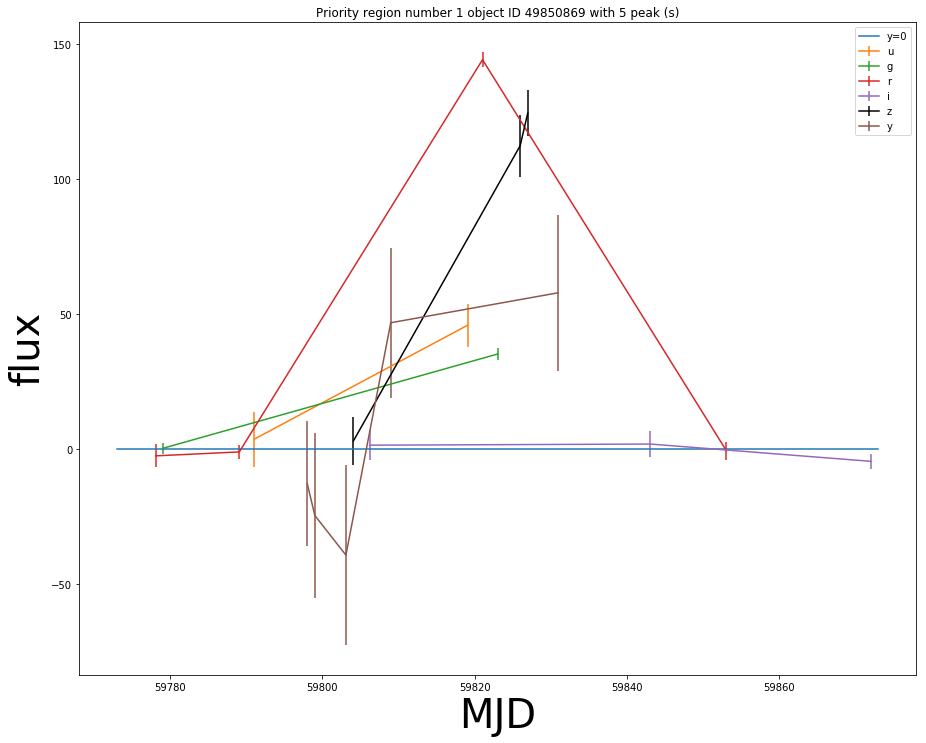

50120780
[60144.2989, 60143.3138]


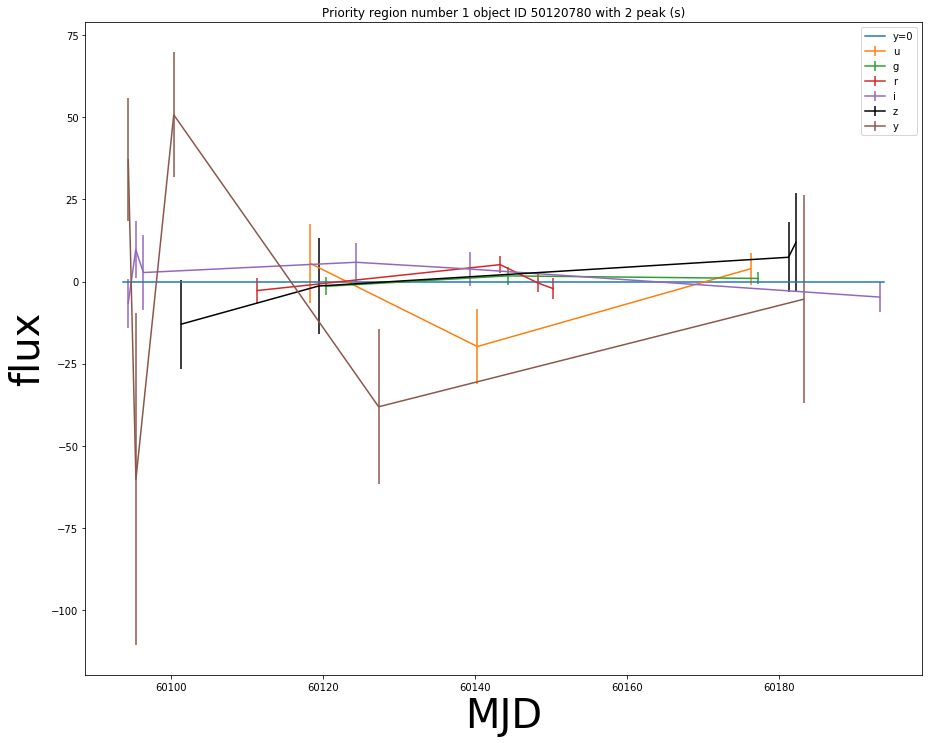

51527253
[59905.1002]


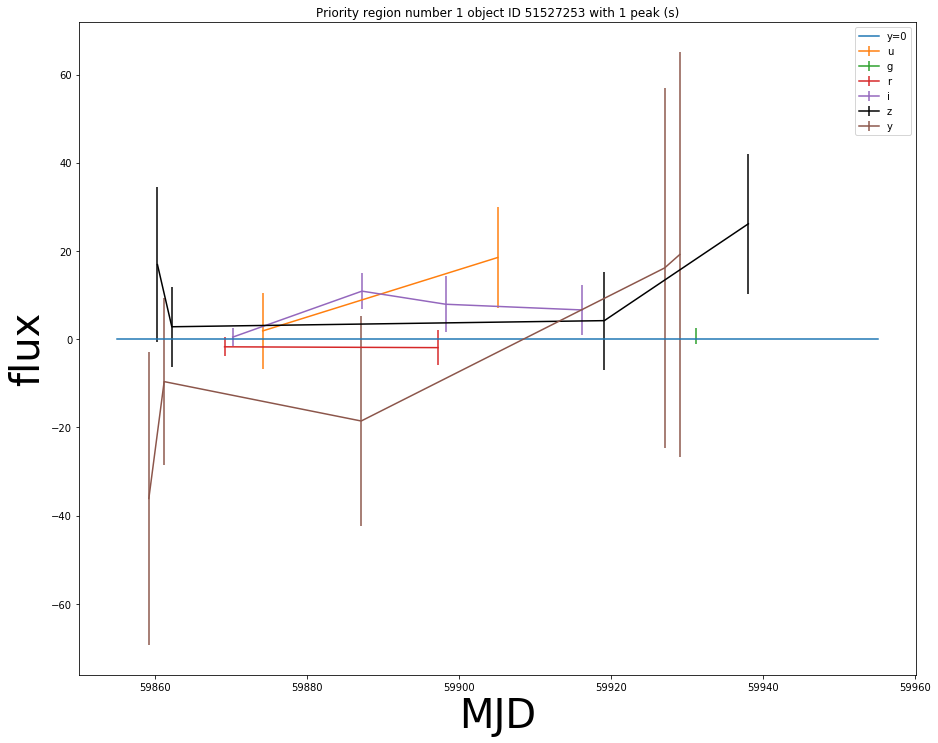

[59798.3912]


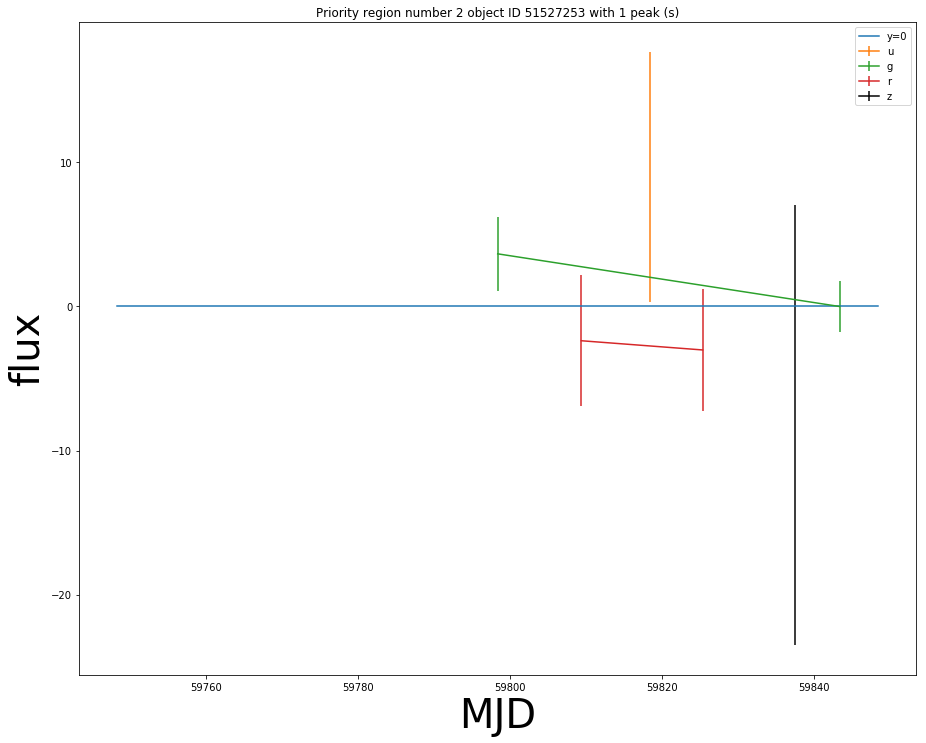

[60263.1213]


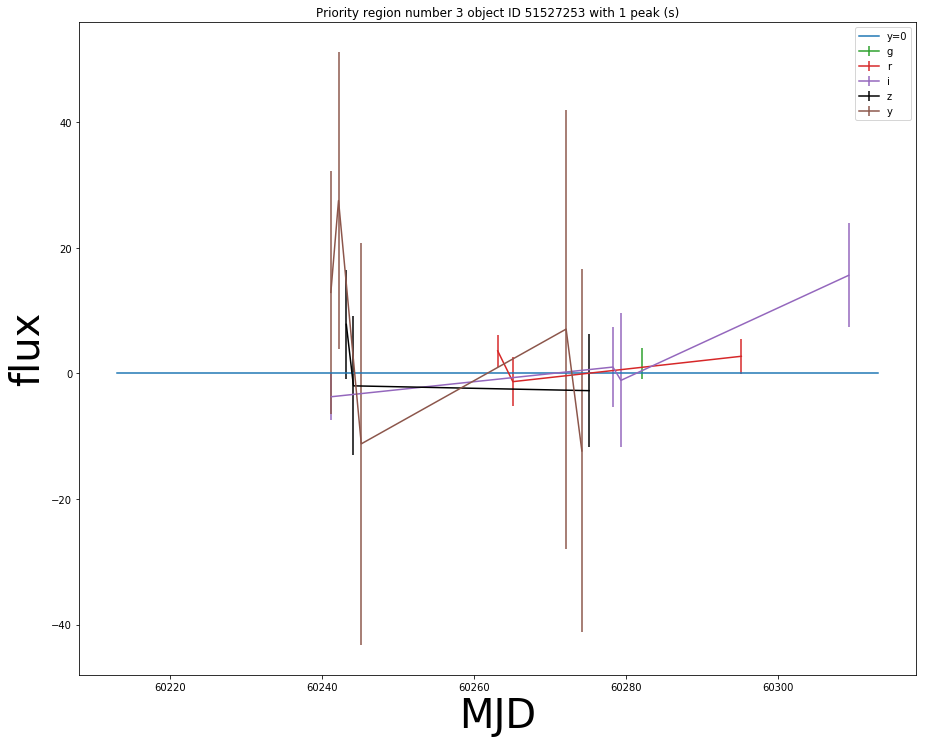

[60595.2611]


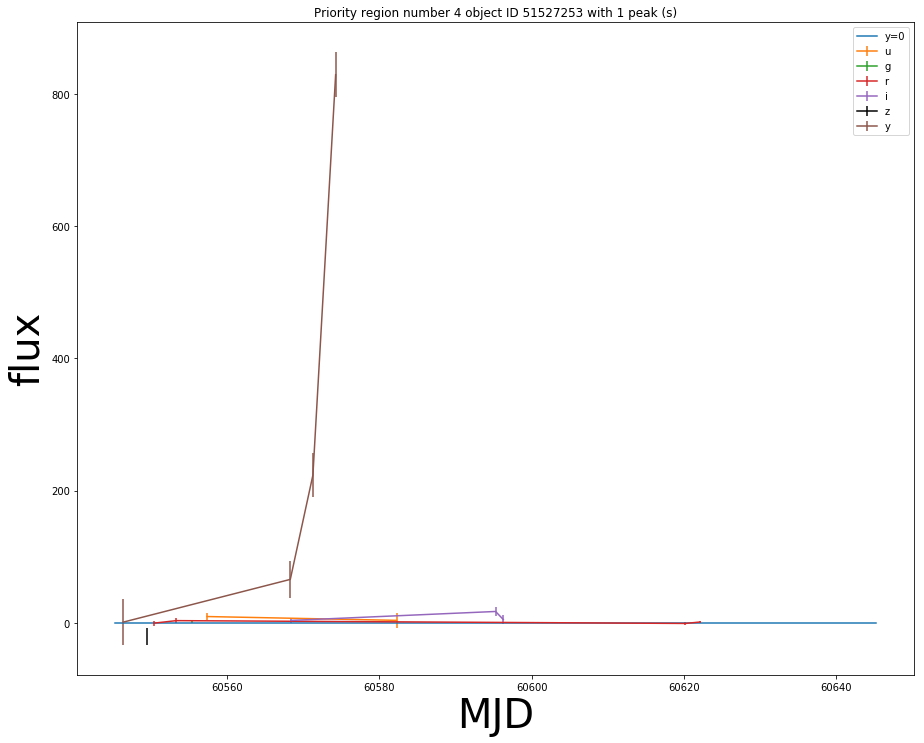

[59938.0413]


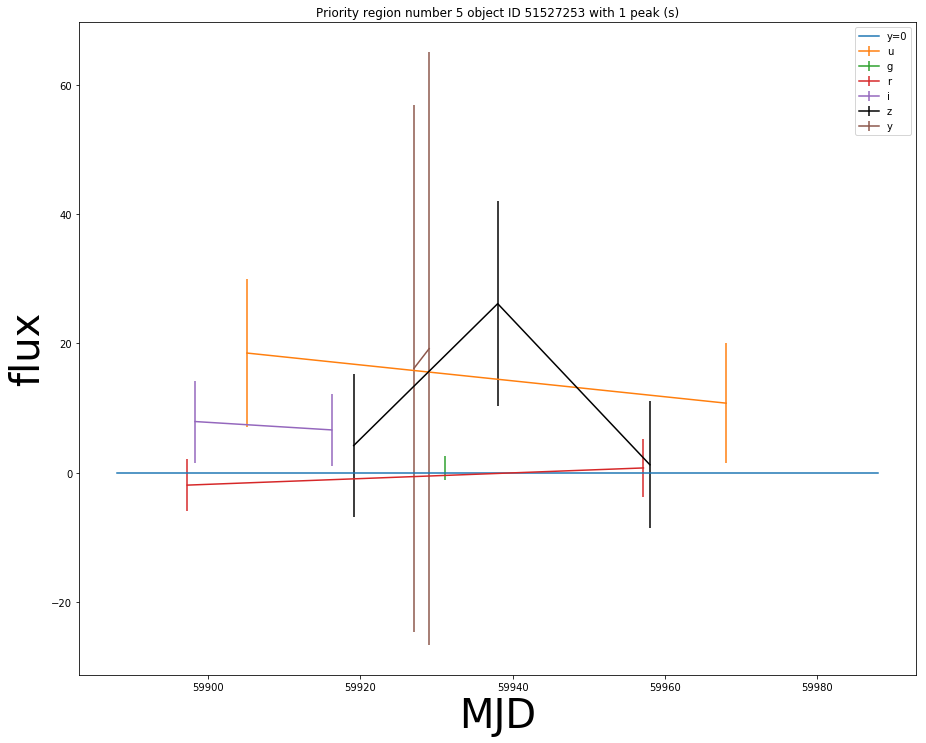

[60574.2424]


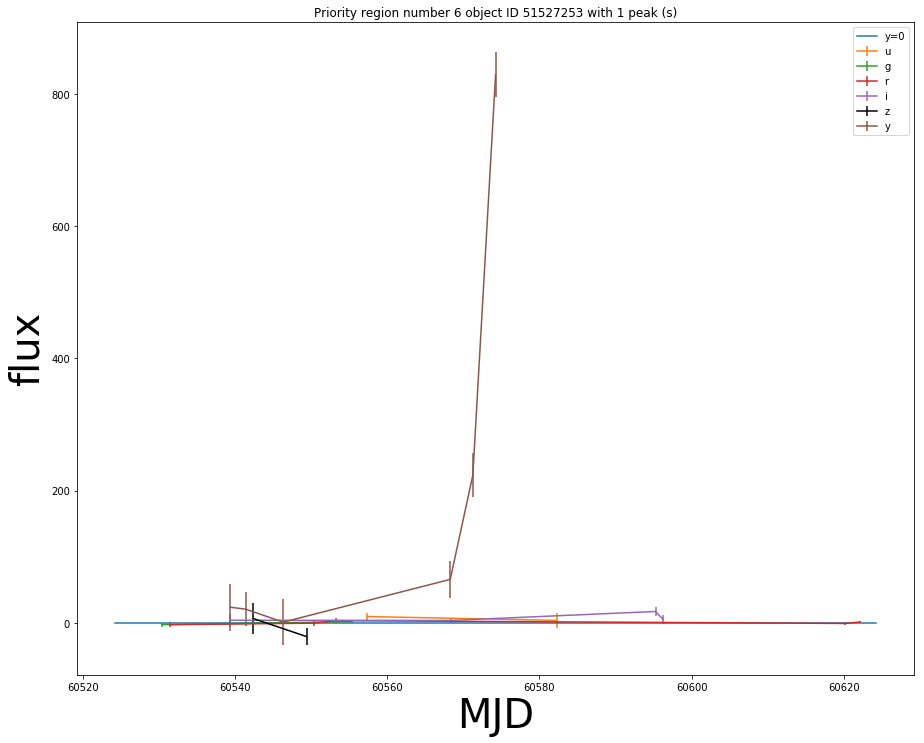

54000531
[59839.143, 59837.0747, 59846.0716, 59835.163]


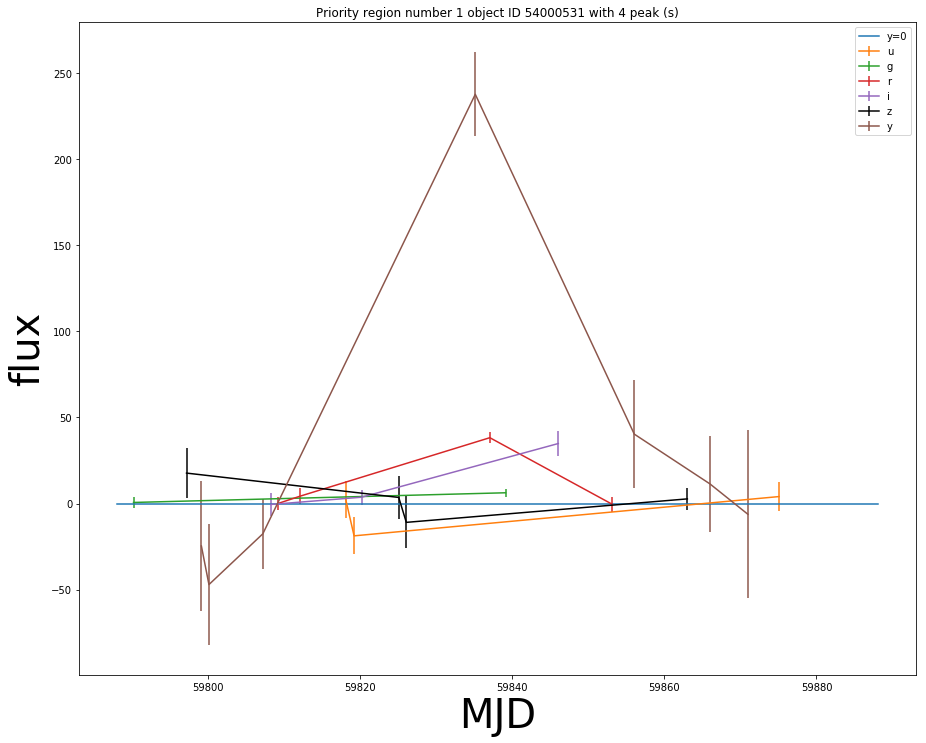

56942944
[60486.9978, 60492.9564]


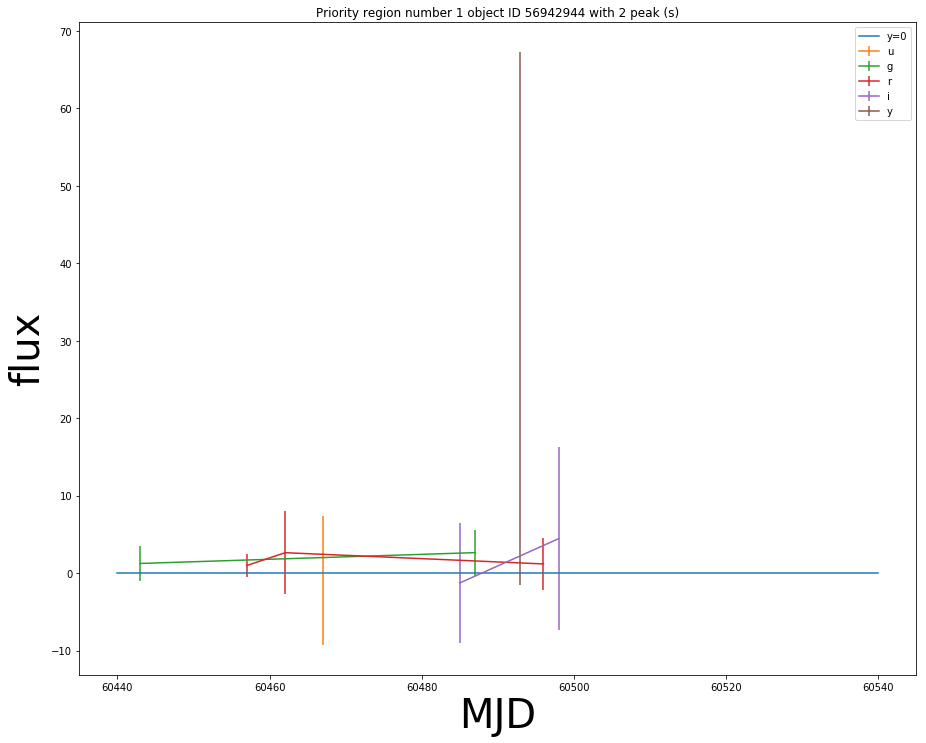

[59972.2895, 59966.2047]


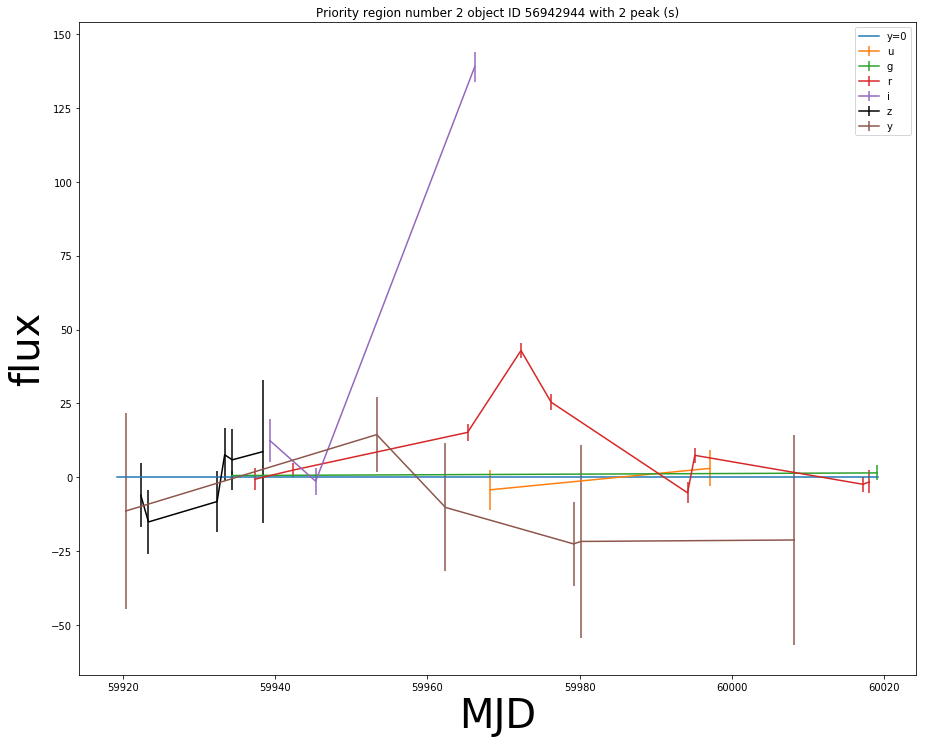

59364010
[60145.0205]


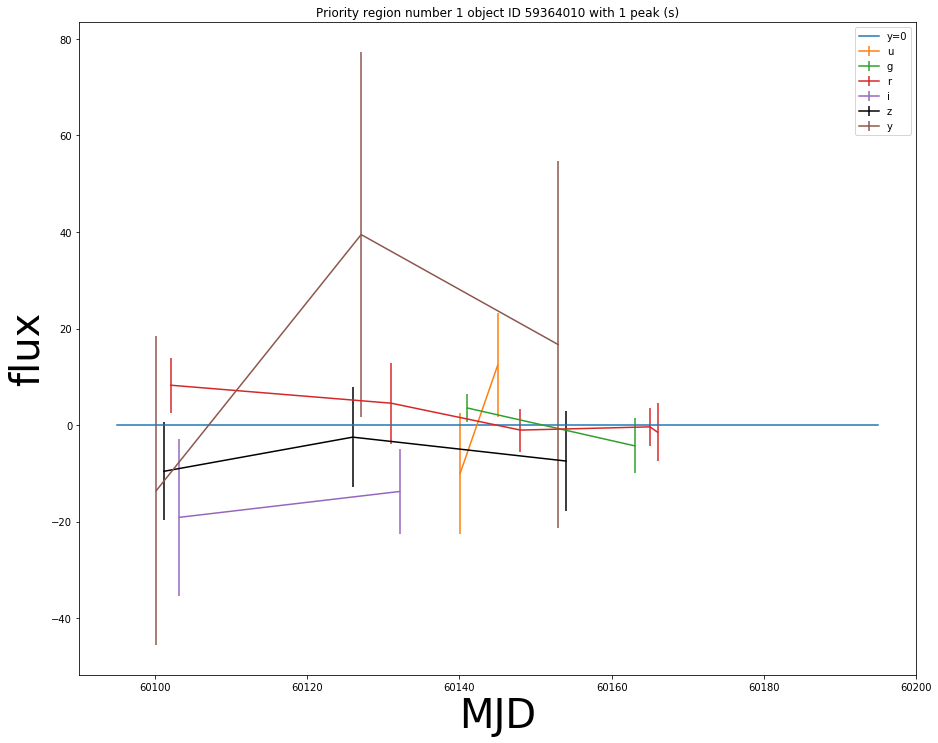

[59790.0361]


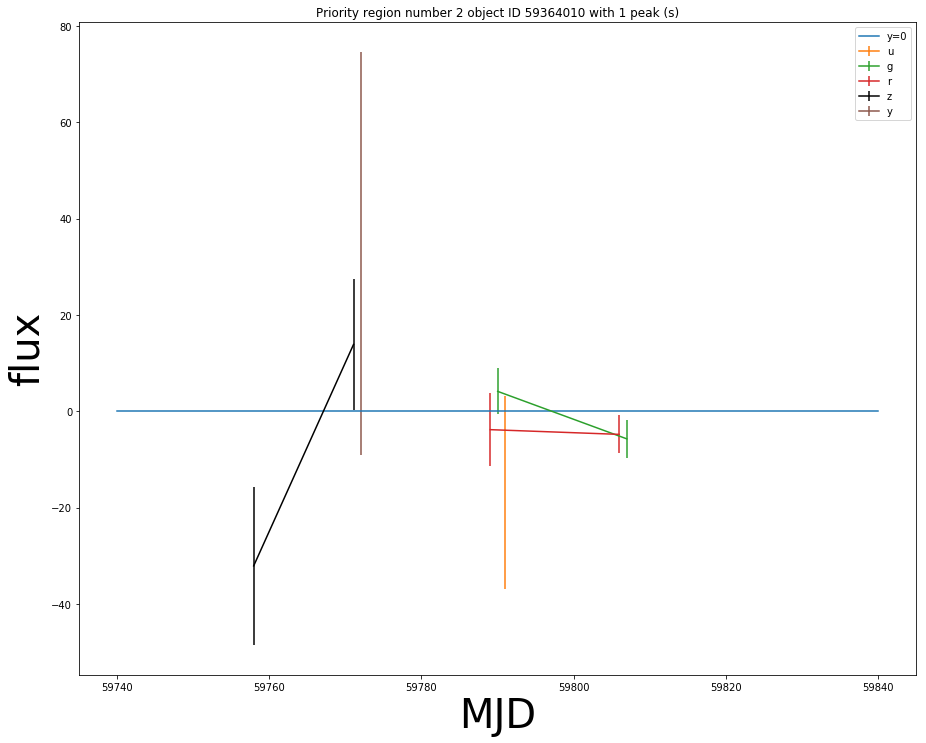

[60102.0393]


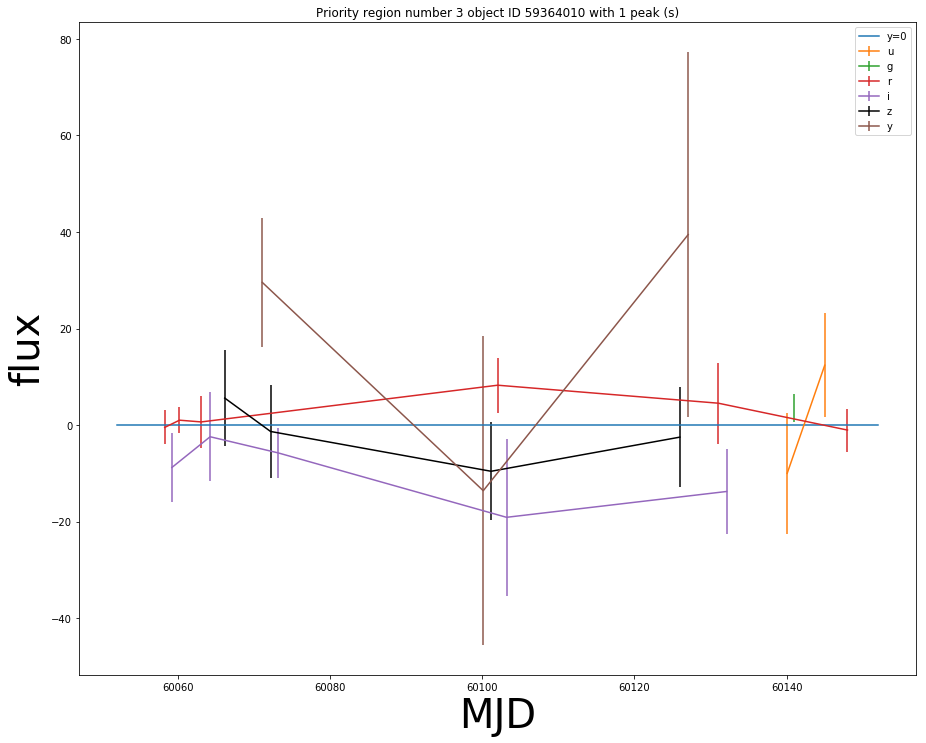

[60359.2648]


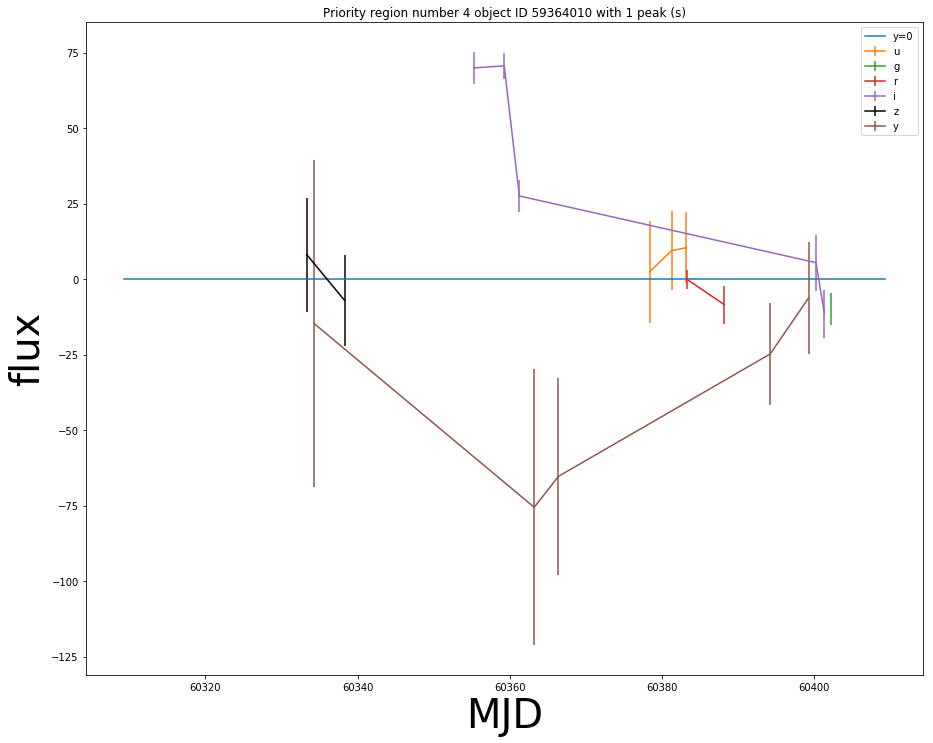

[59990.3942]


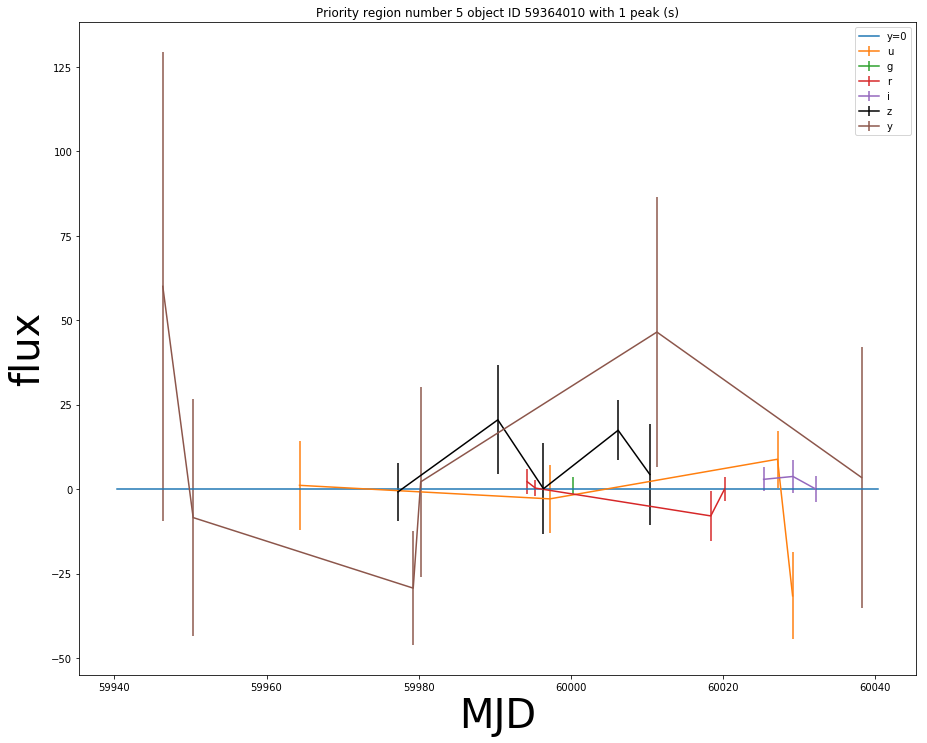

[59946.3629]


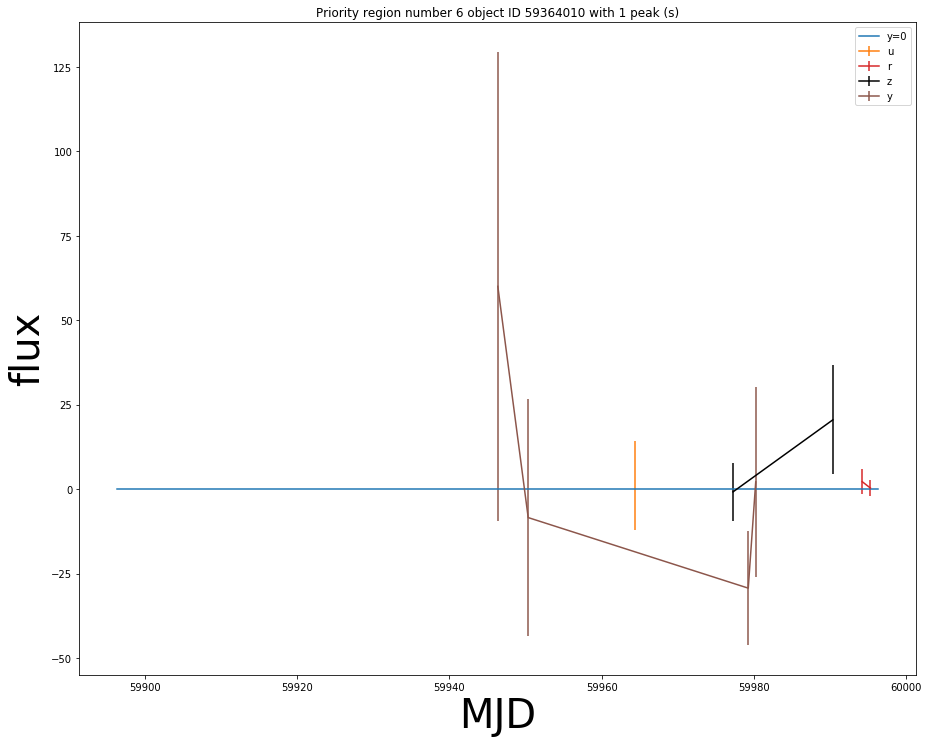

59464880
[60499.2701, 60498.3756, 60510.3184]


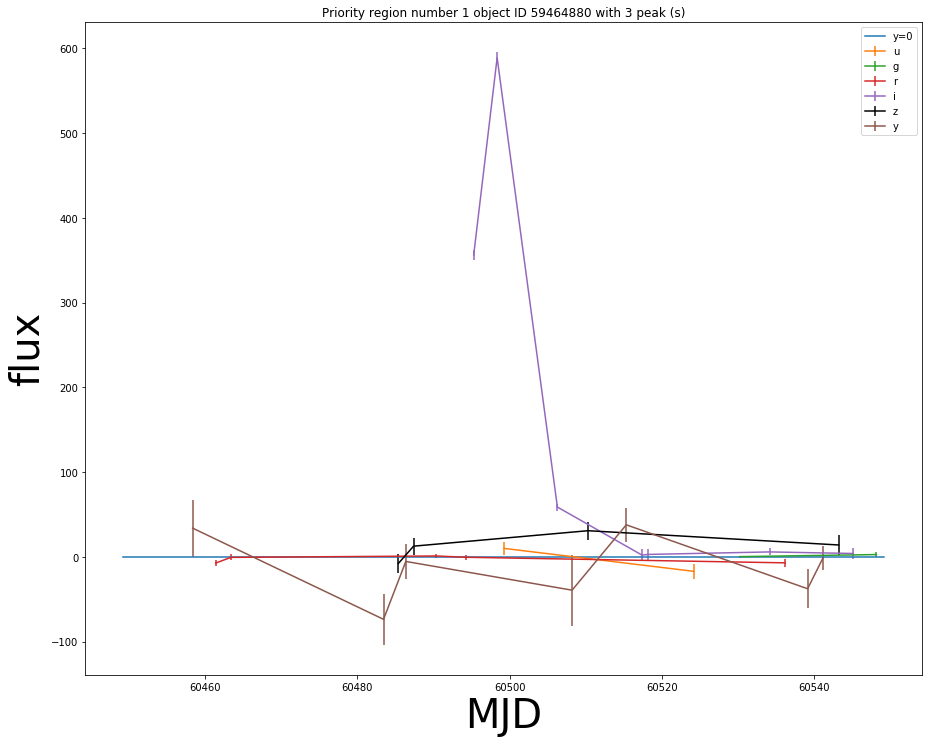

59698197
[60206.232, 60204.2205, 60206.3991]


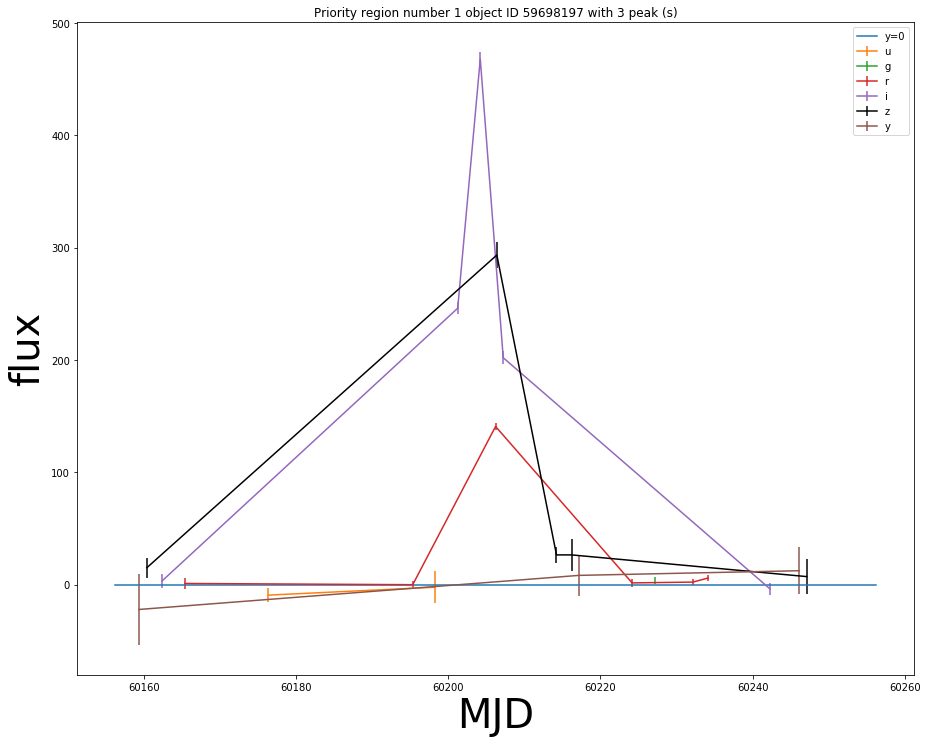

61543226
[59722.3359, 59713.2344]


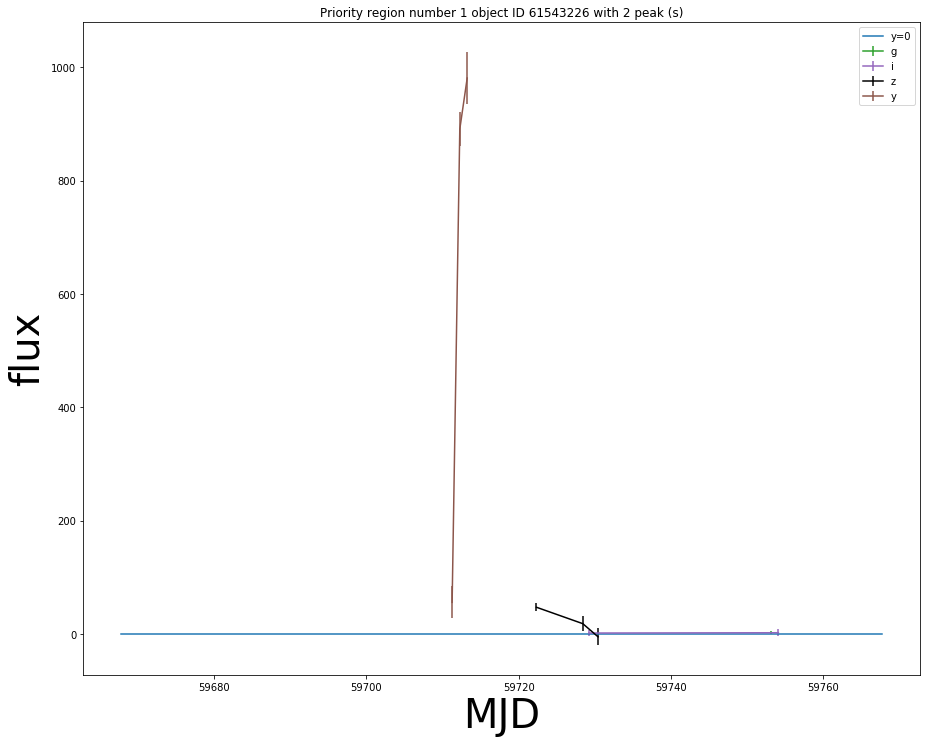

61688145
[60146.1496, 60147.2394]


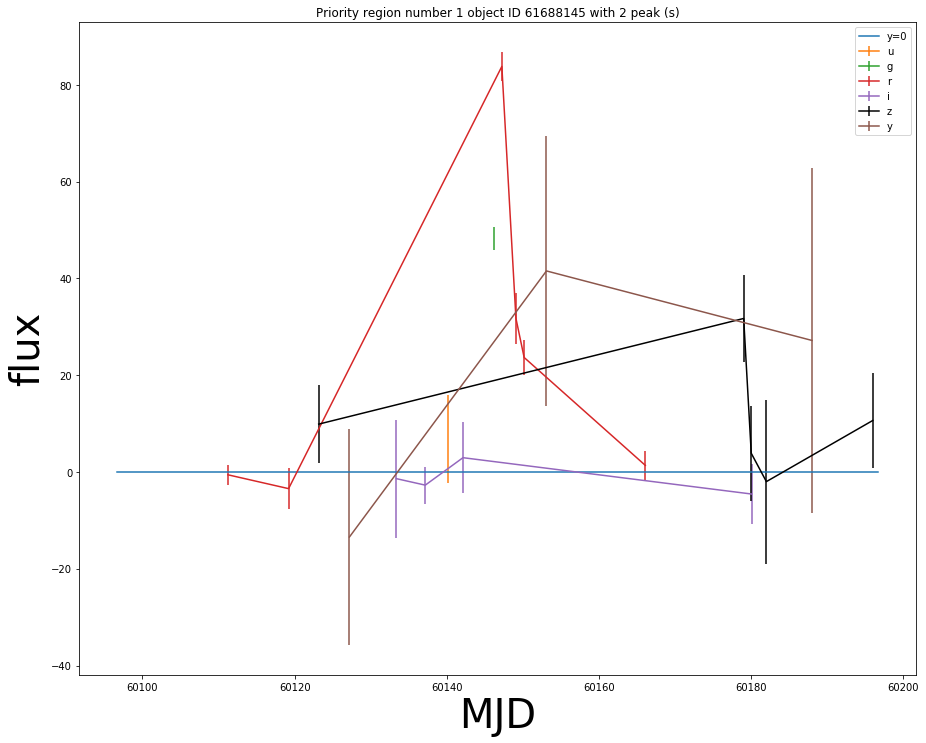

66740787
[60413.3324, 60419.3439, 60415.417]


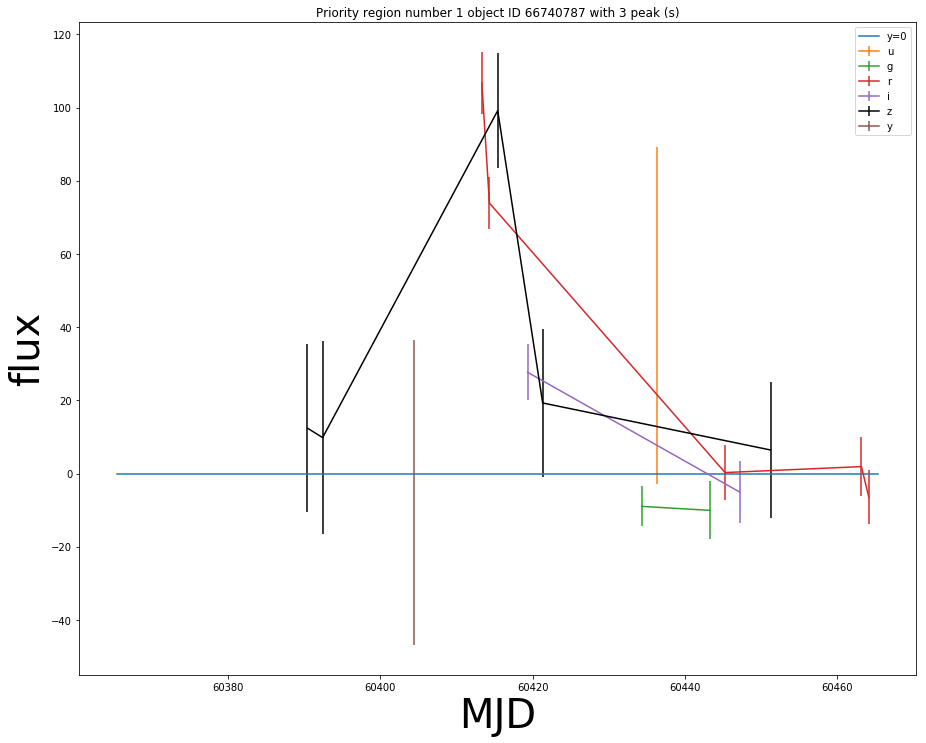

67195030
[60670.2444, 60672.3209, 60667.2578]


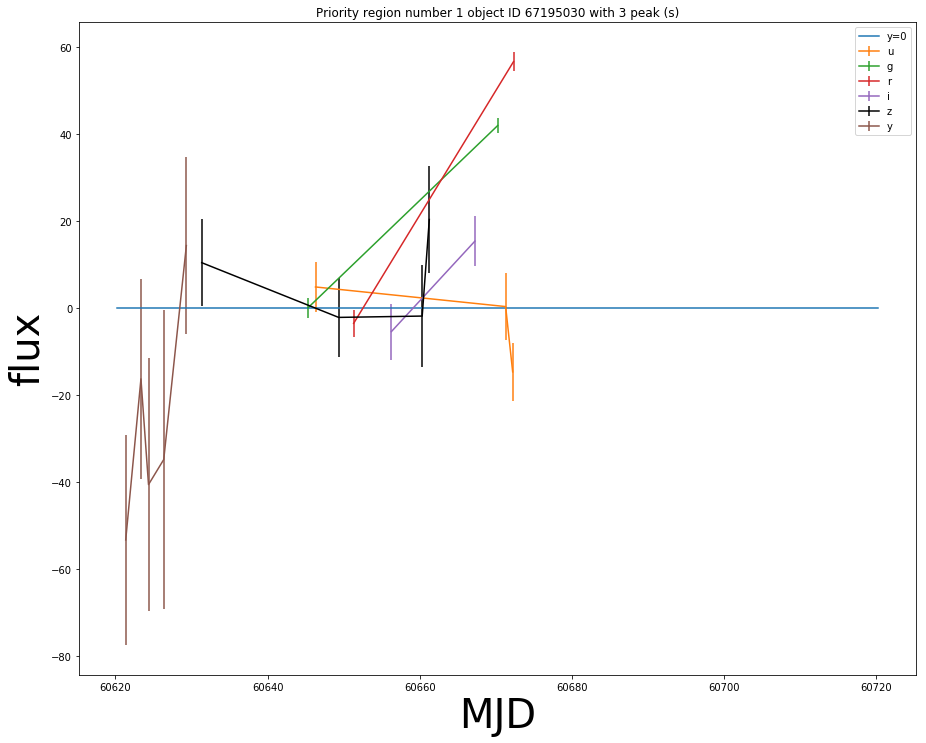

67600070
[60216.37, 60215.3689]


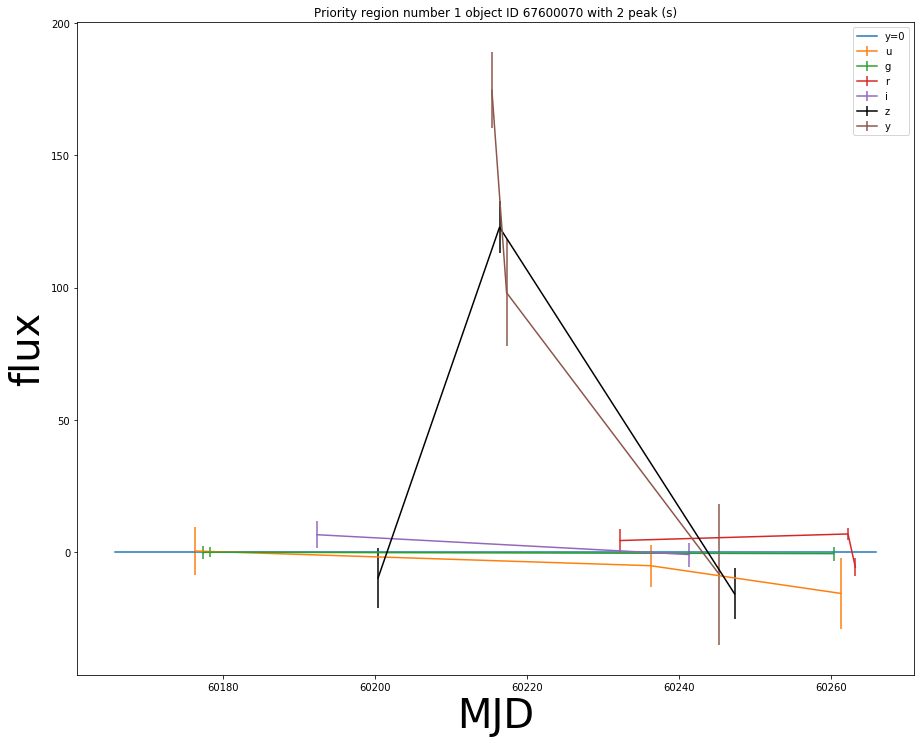

70425954
[60554.1405, 60560.1528]


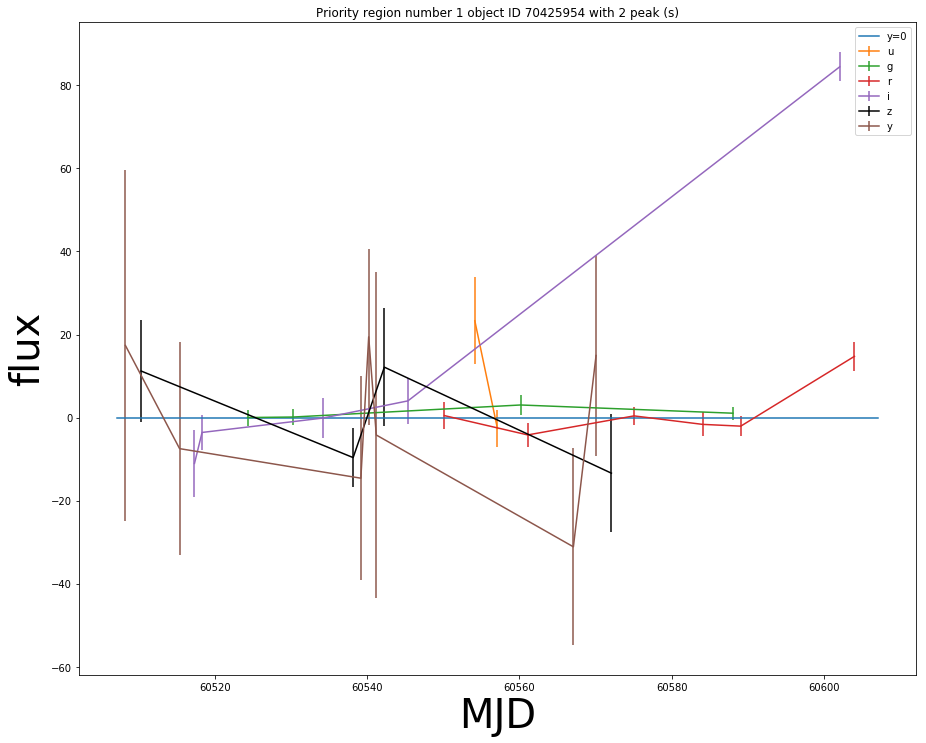

[60604.0289, 60602.0952]


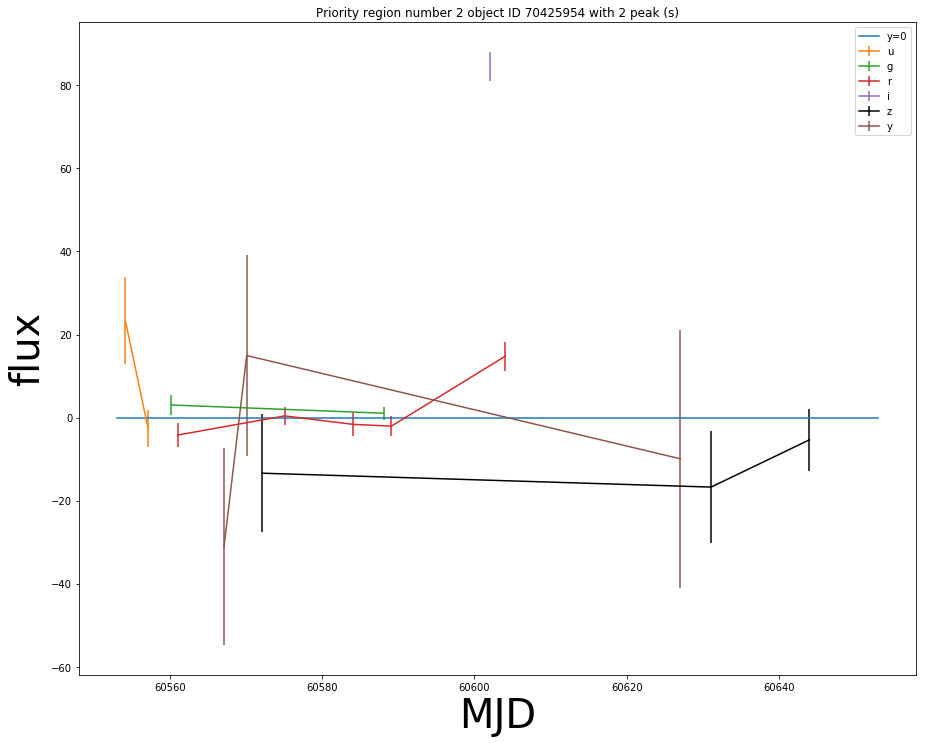

74492858
[59856.1783, 59854.1311]


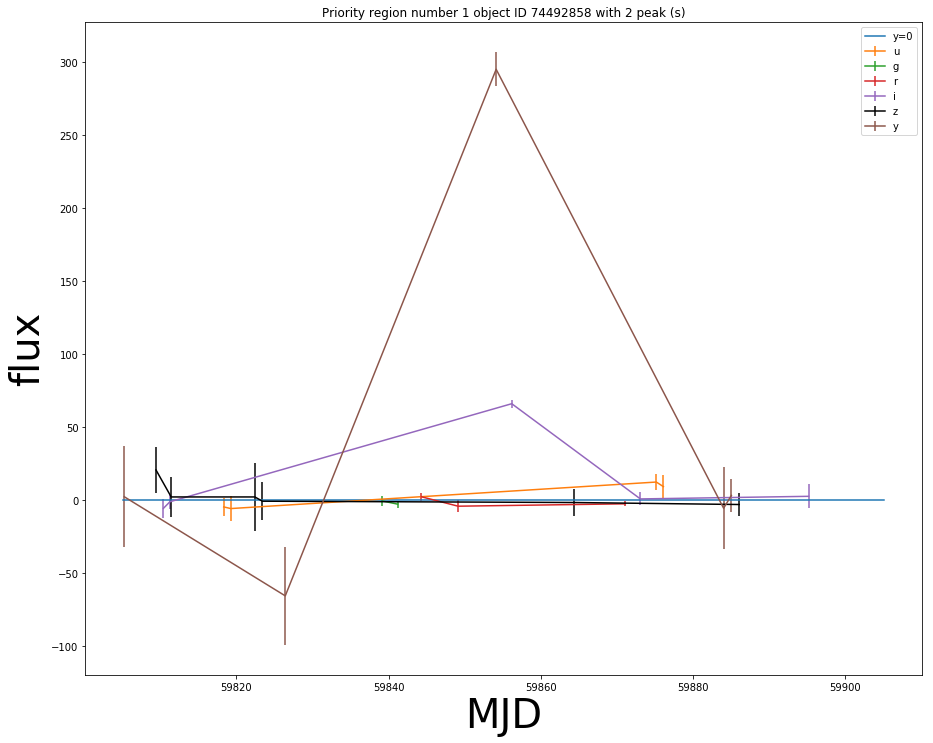

74512775
[60067.3526, 60066.4139]


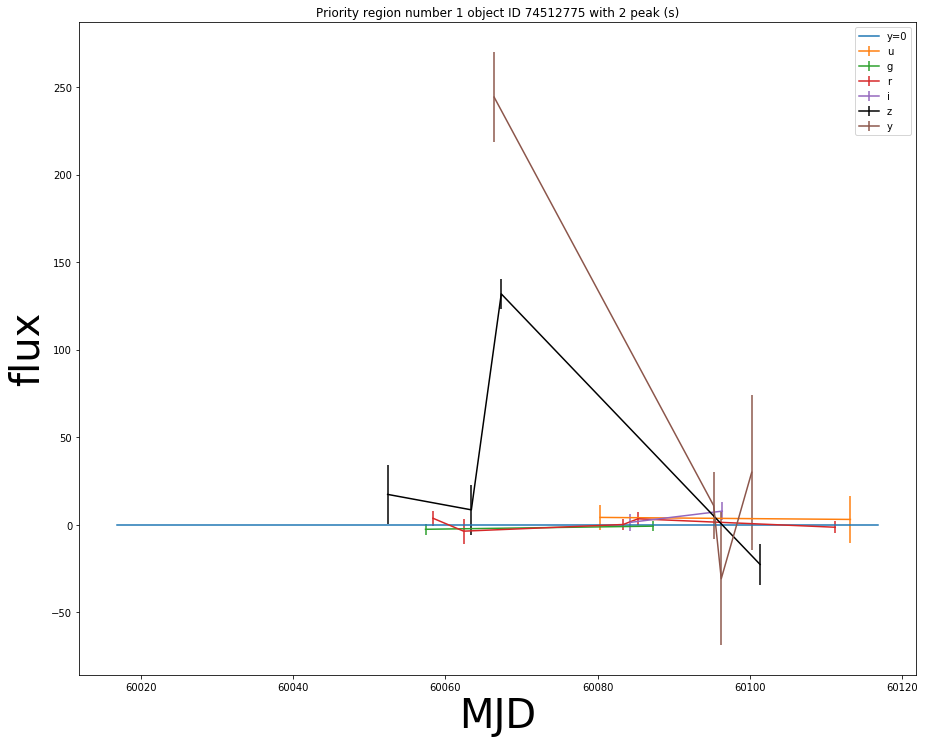

74943698
[60496.0074, 60496.9919, 60510.9596]


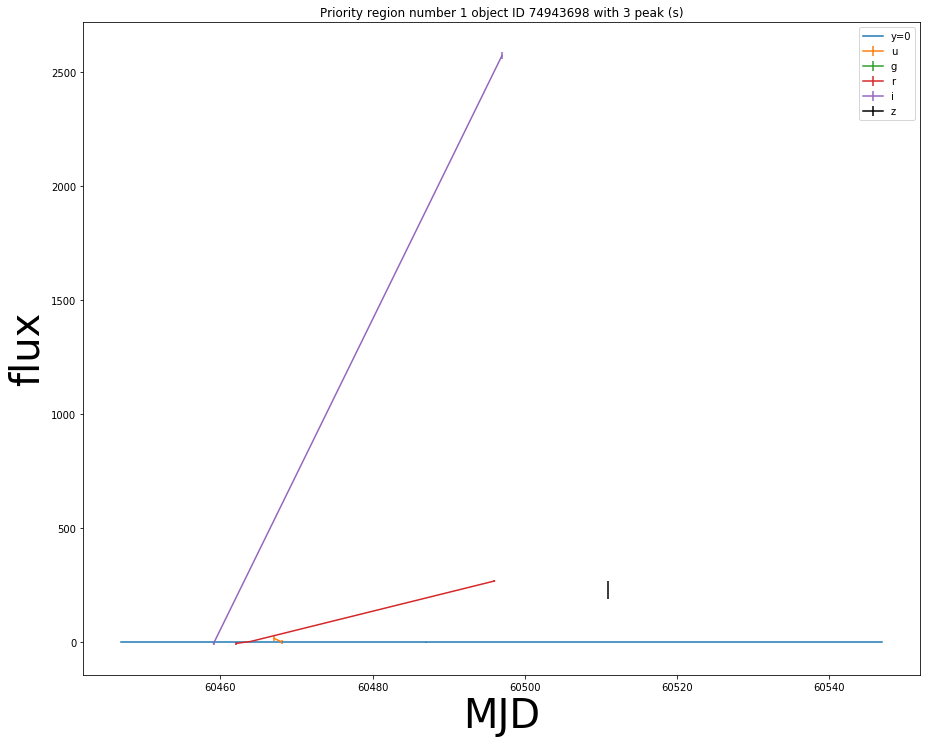

75080064
[60585.2645]


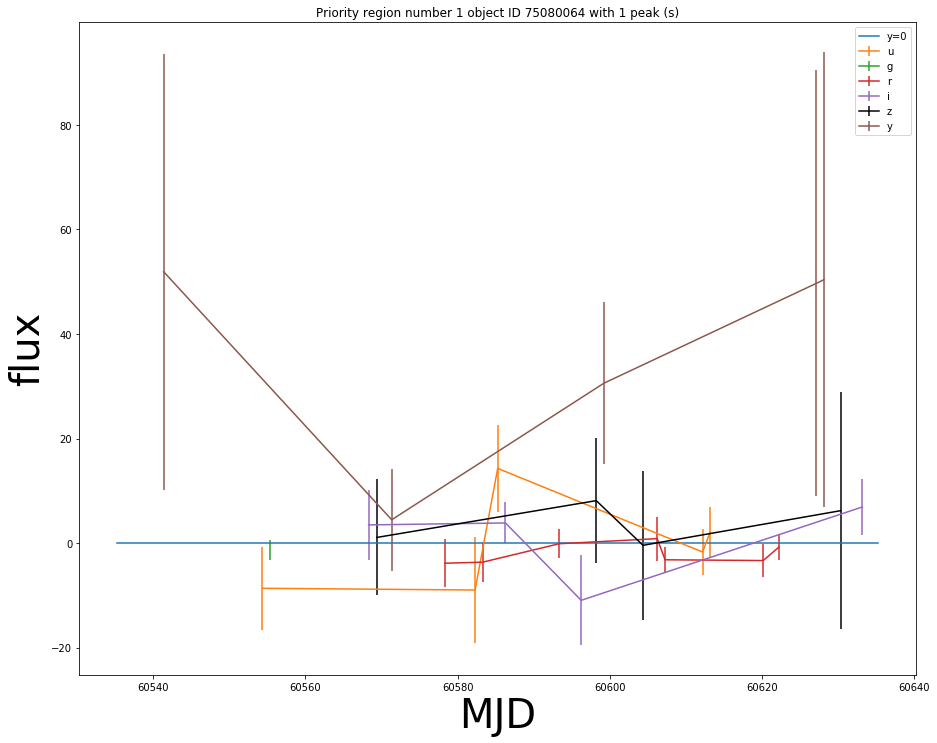

[60640.2041]


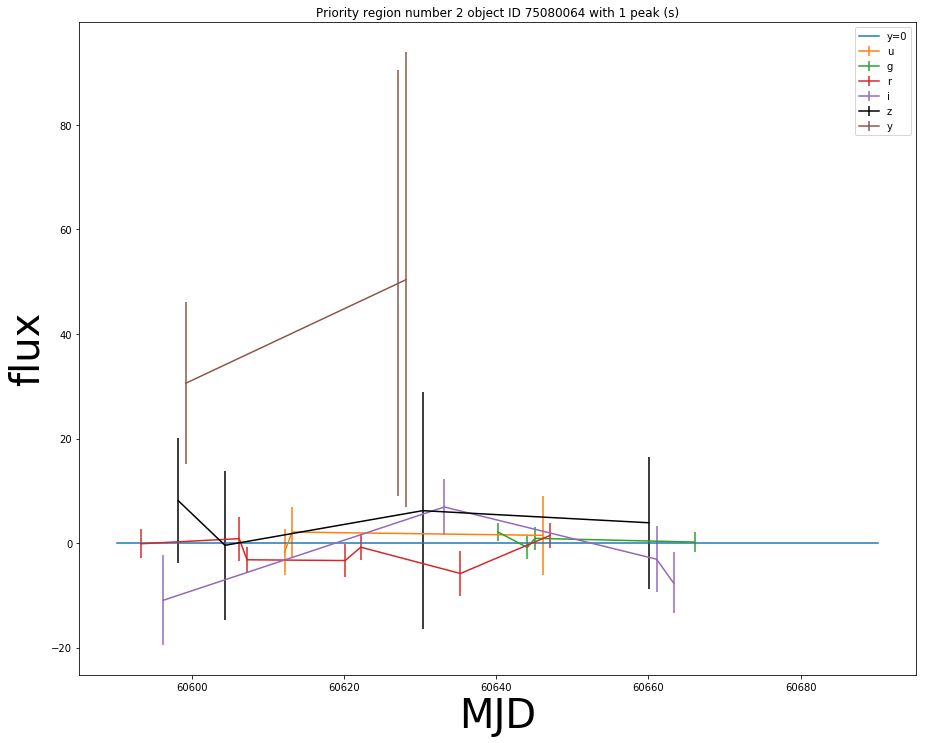

[60310.2103]


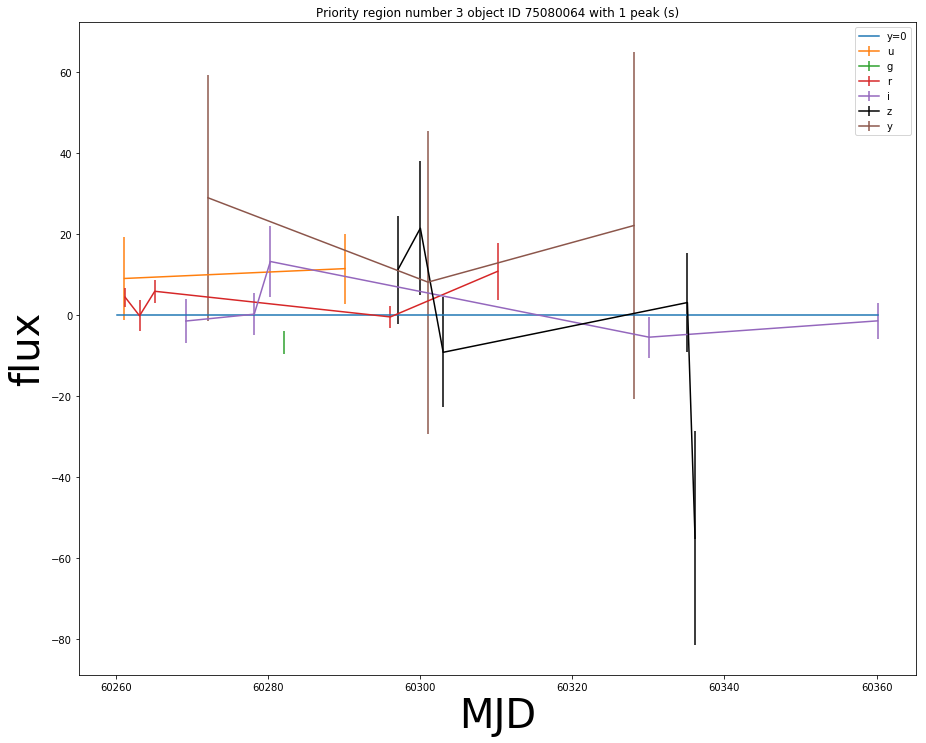

[60280.3287]


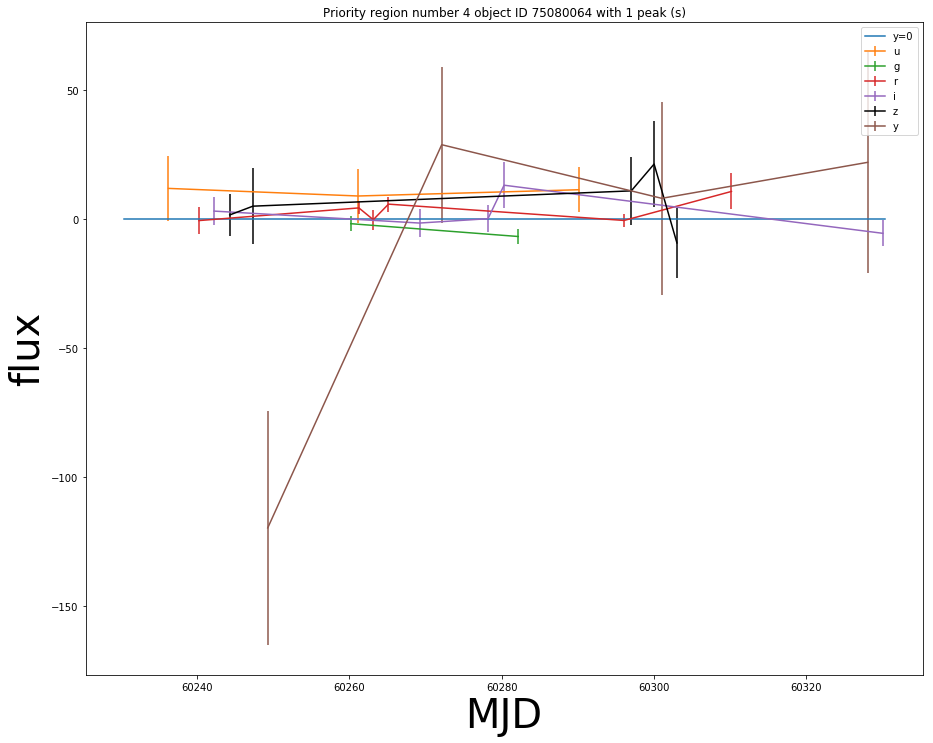

[60050.9754]


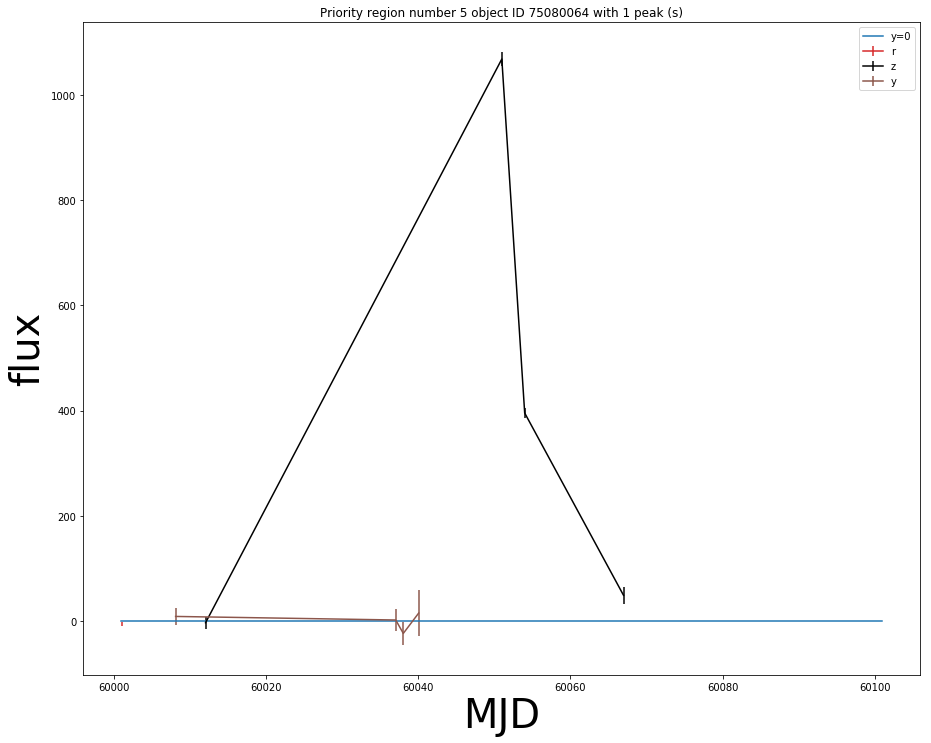

[60541.3656]


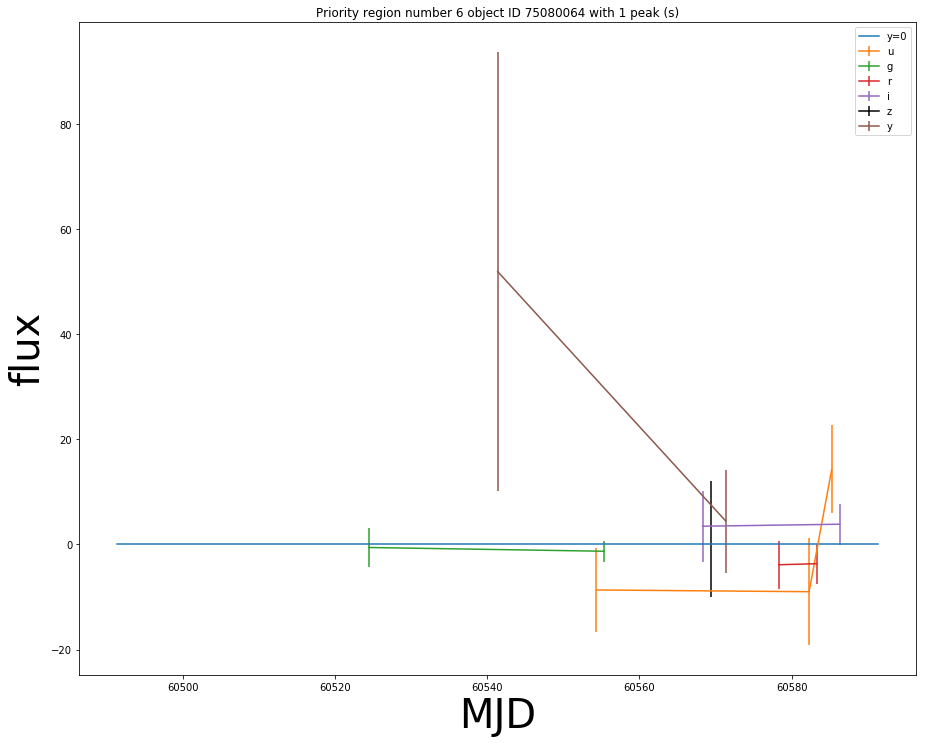

75218022
[60133.0422, 60132.9664]


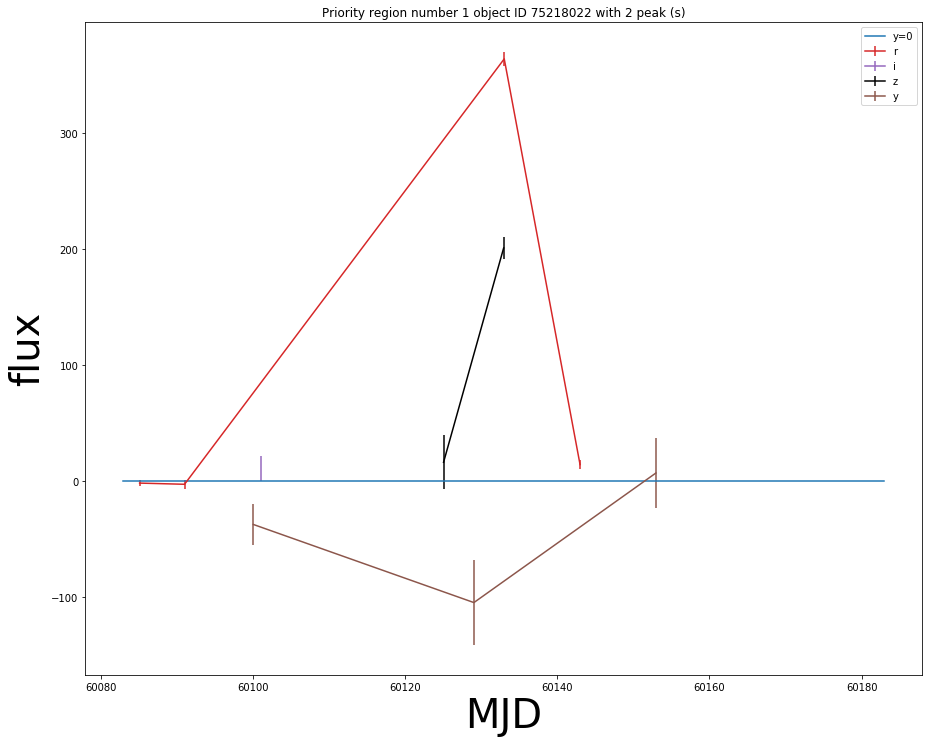

[60073.1788, 60076.957]


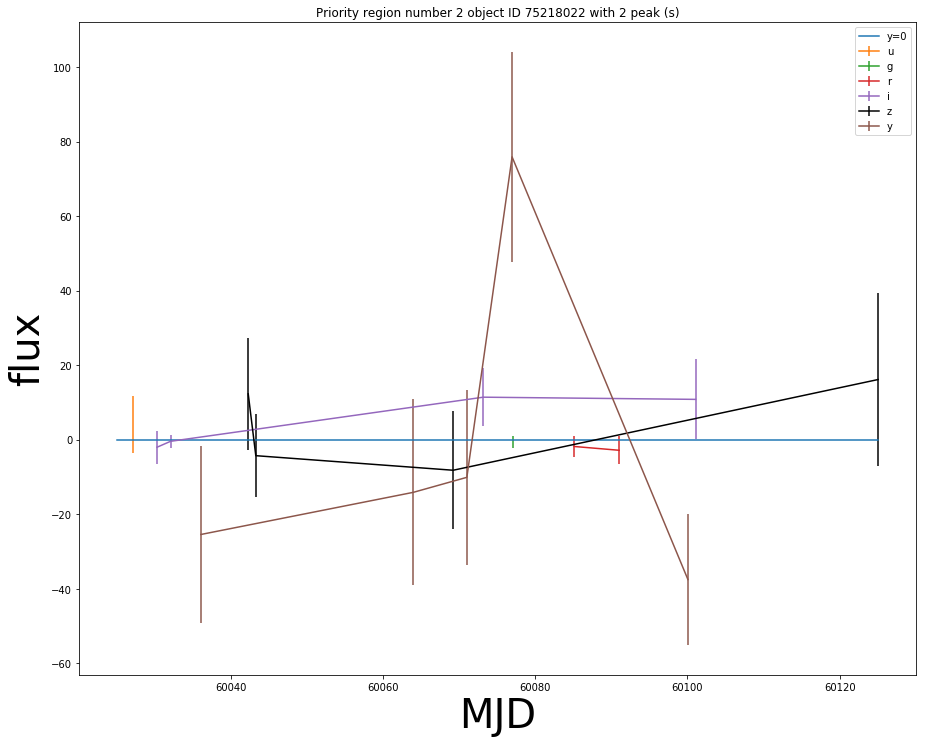

76457103
[60575.0488, 60572.0624, 60574.9931]


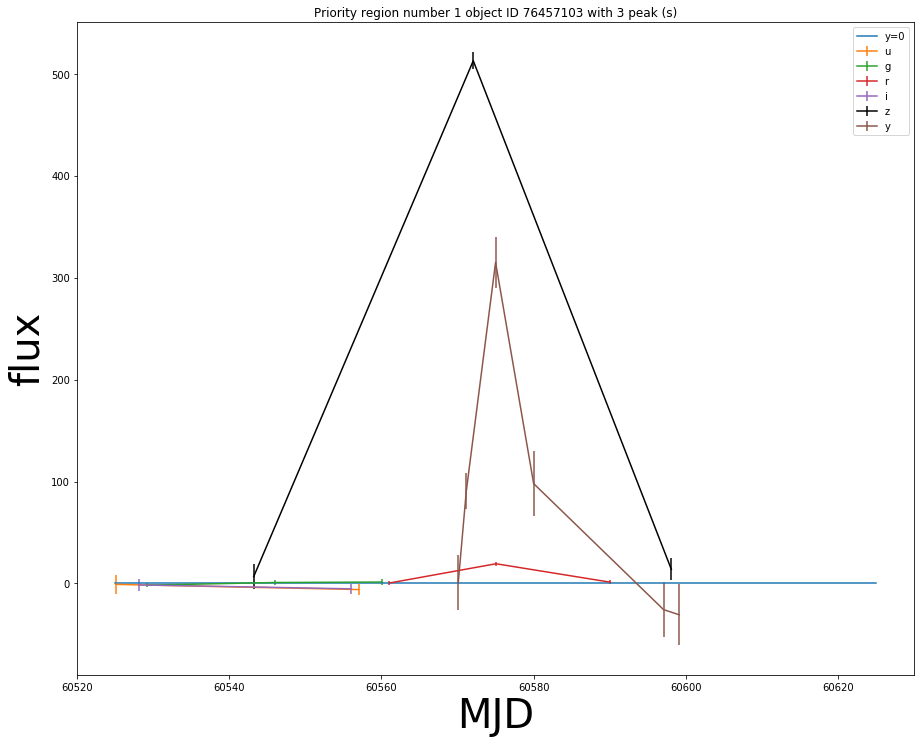

80913604
[60515.0048, 60515.1831, 60512.1999]


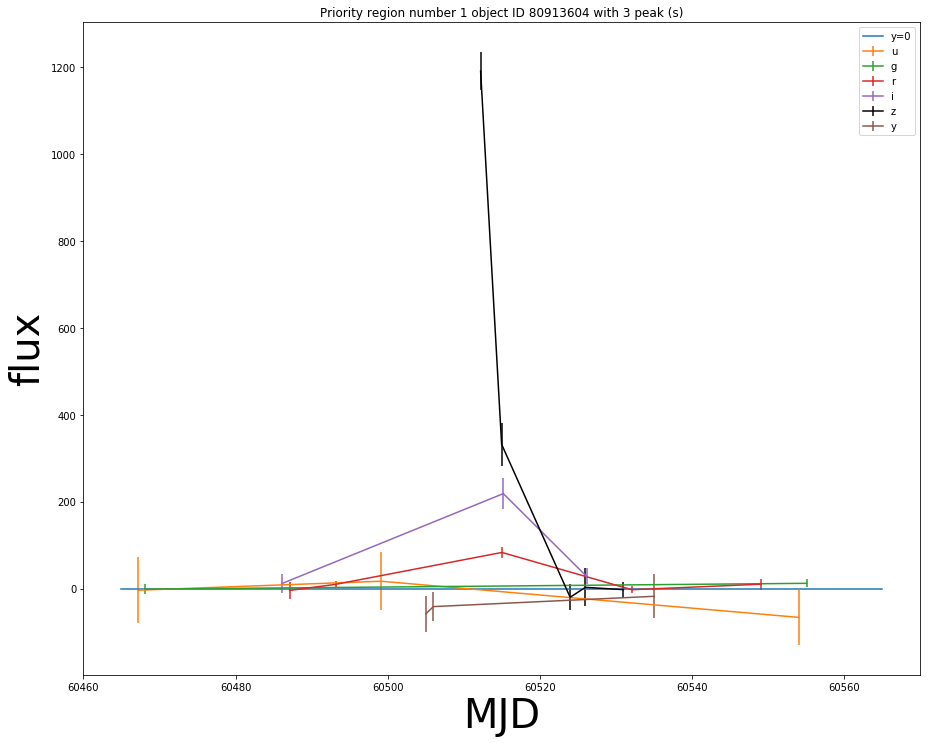

81456459
[60517.144, 60517.3248, 60510.2817, 60508.1157]


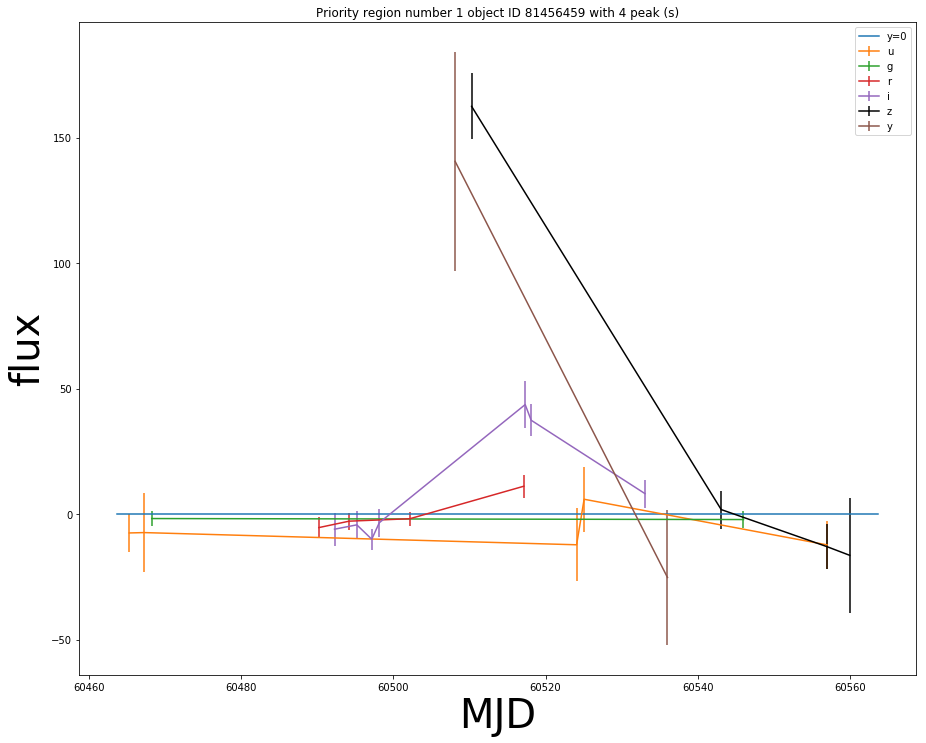

84706583
[60345.2538, 60357.2703, 60338.3431]


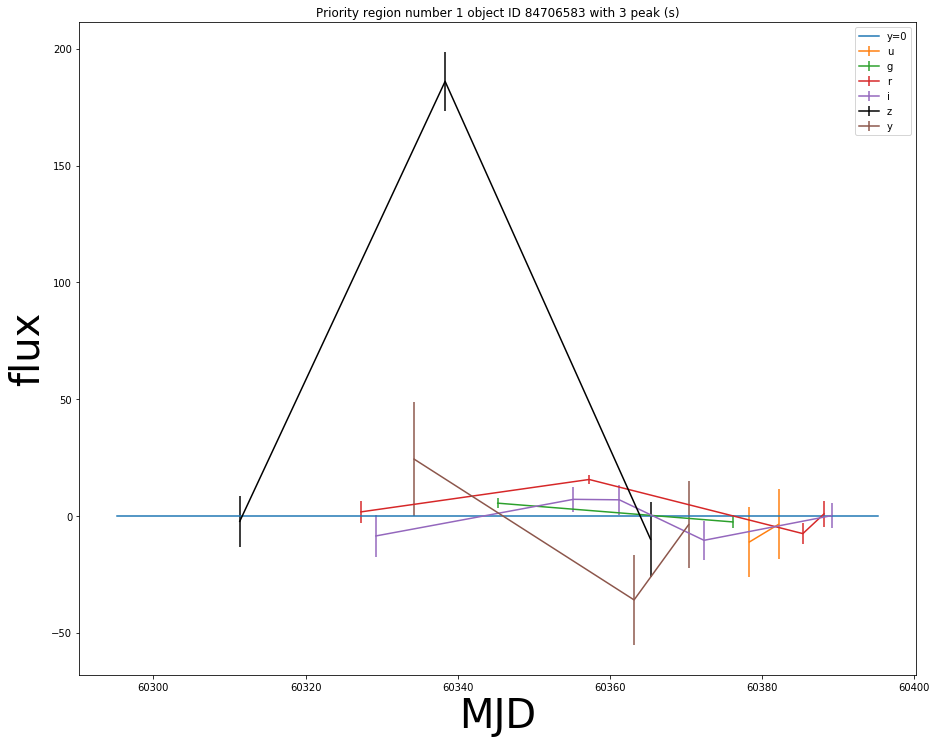

85030920
[60670.0995, 60669.0428]


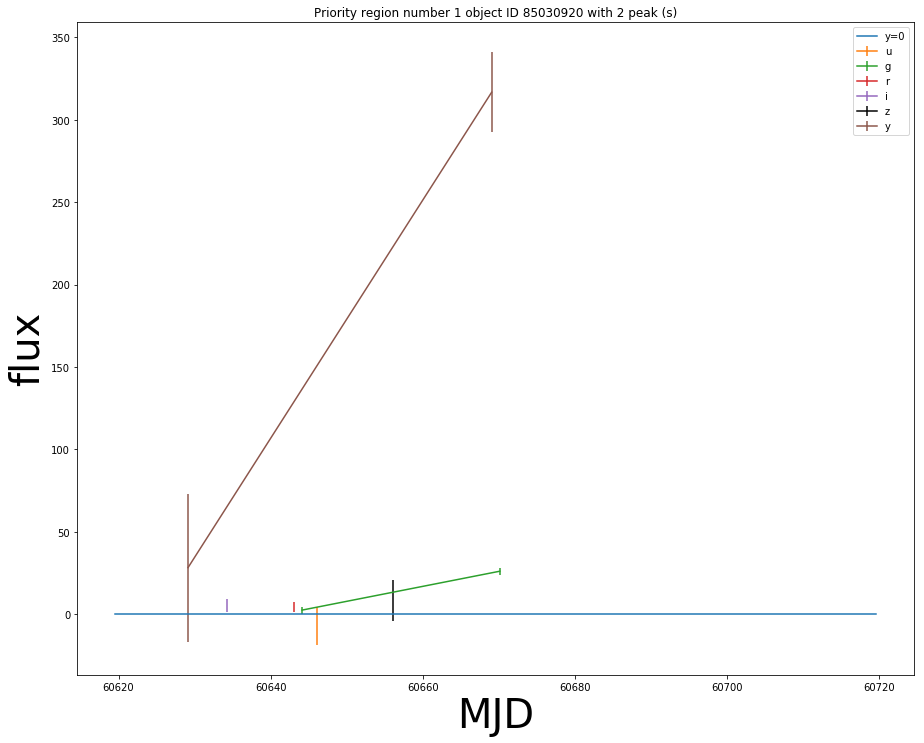

86490974
[60555.3126, 60550.3766, 60547.4191, 60541.3463]


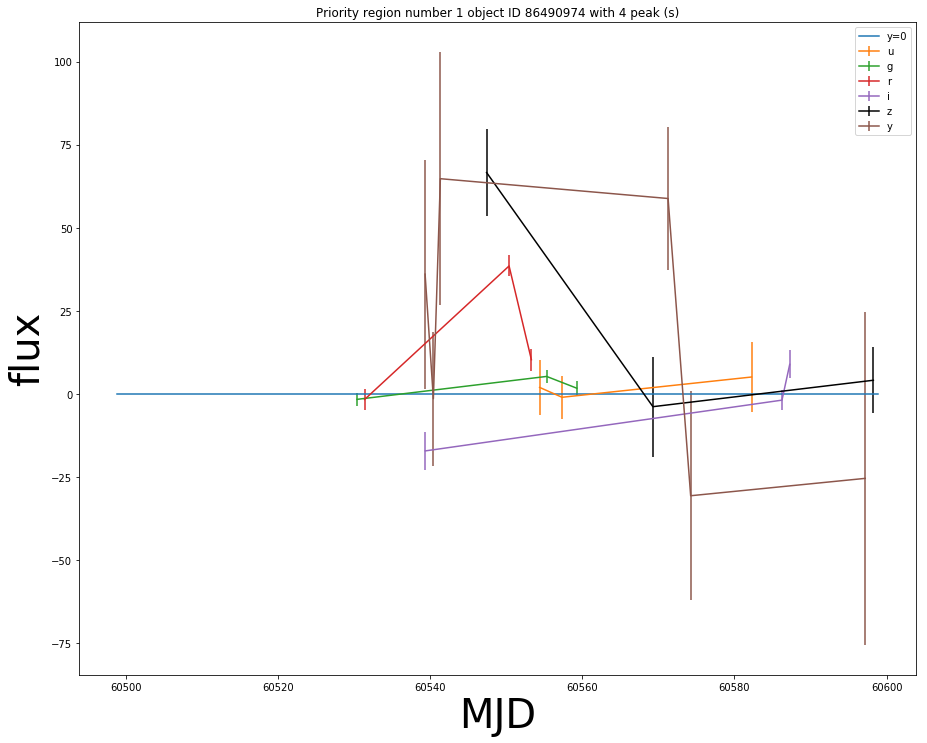

89733353
[60330.3559, 60324.3621, 60328.3687]


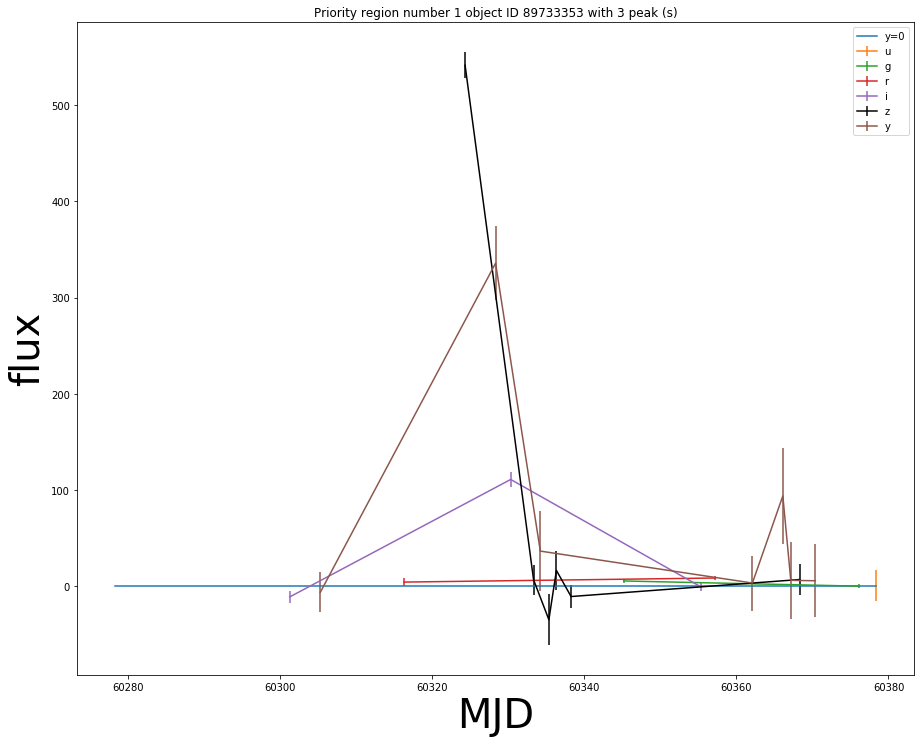

89942025
[60553.0315, 60556.0161, 60553.9872]


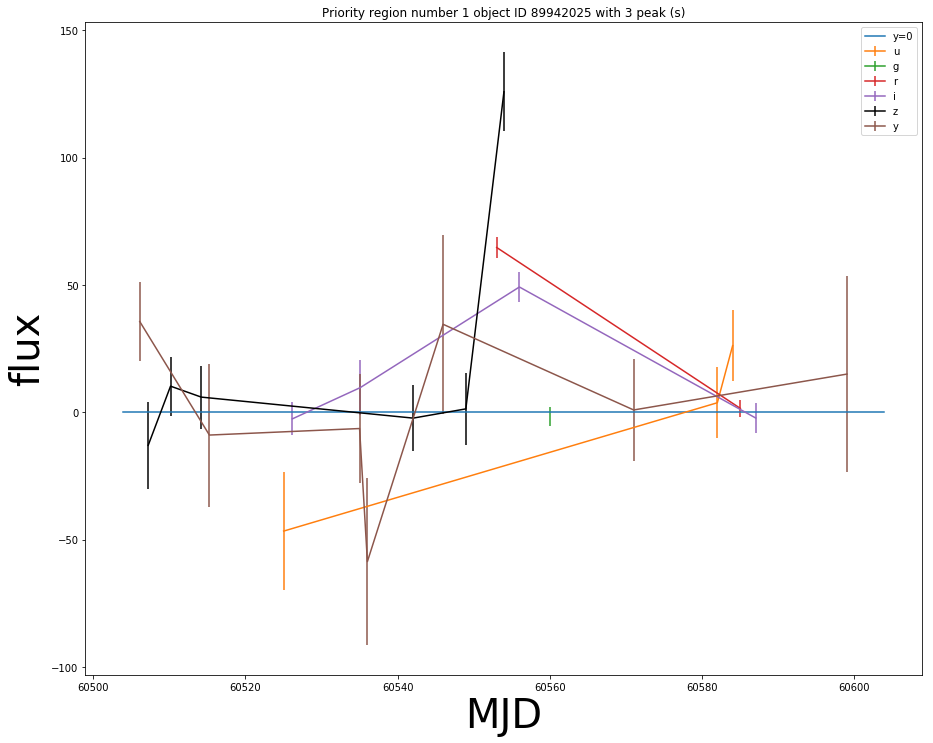

90269218
[60518.1095, 60509.115, 60508.1171]


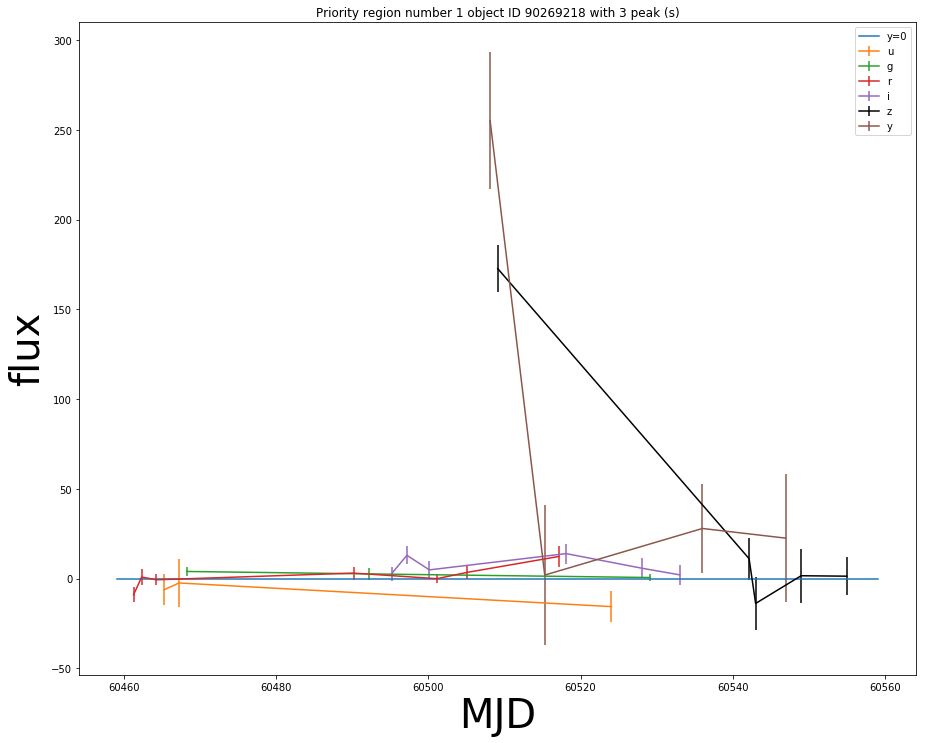

93121505
[60341.135, 60340.3417]


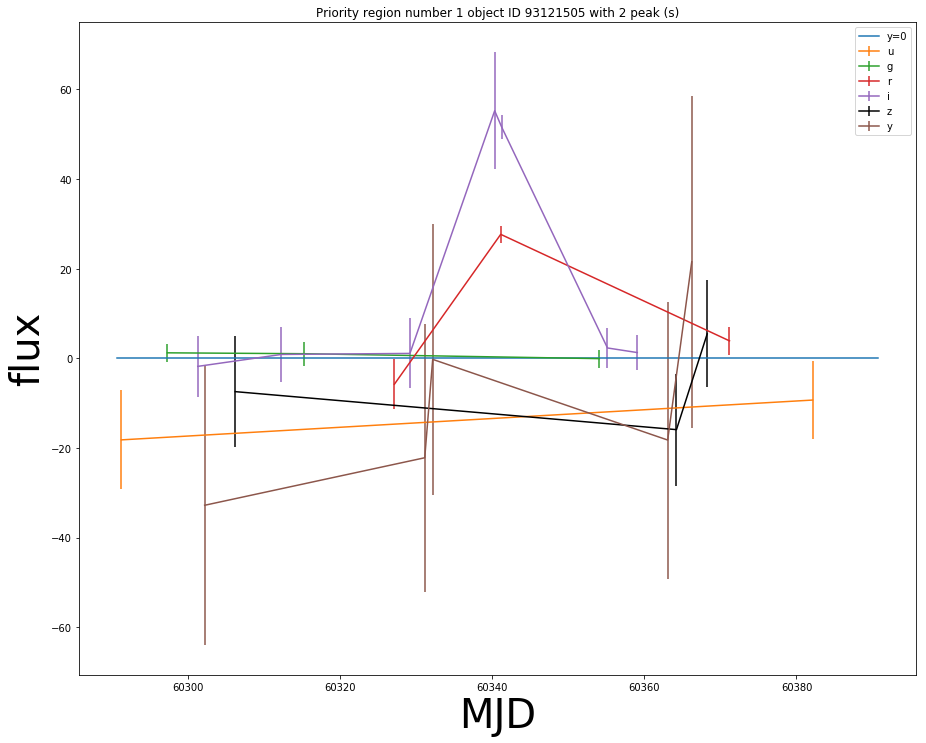

93394704
[60582.0423, 60572.2069]


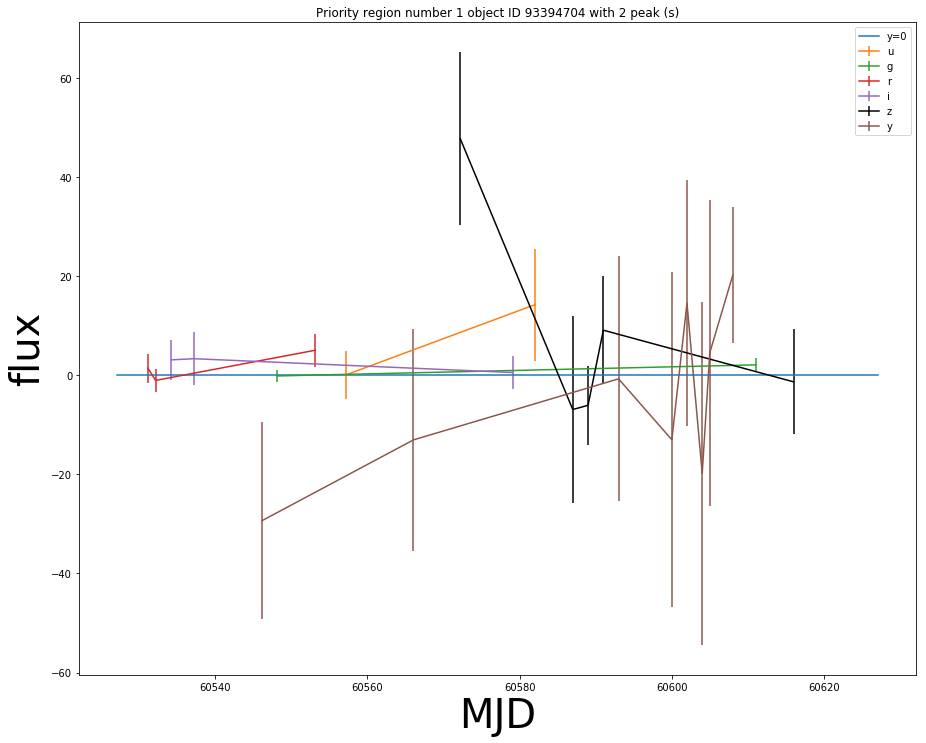

[60442.404, 60429.4265]


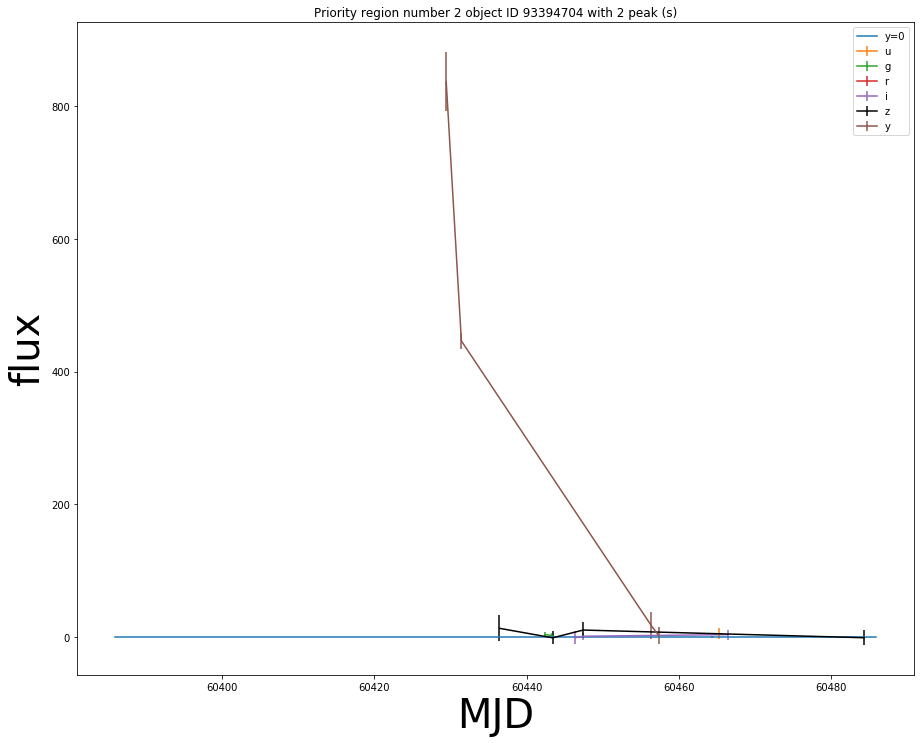

93725998
[60596.3415, 60601.3648, 60599.3058]


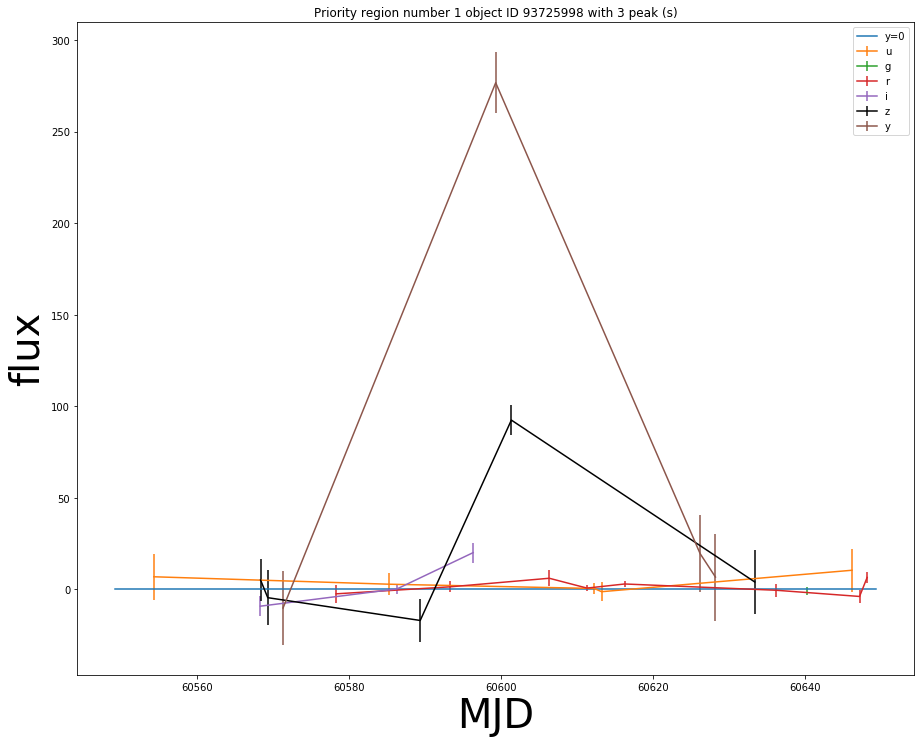

95541281
[60444.3677, 60447.4099, 60451.3763]


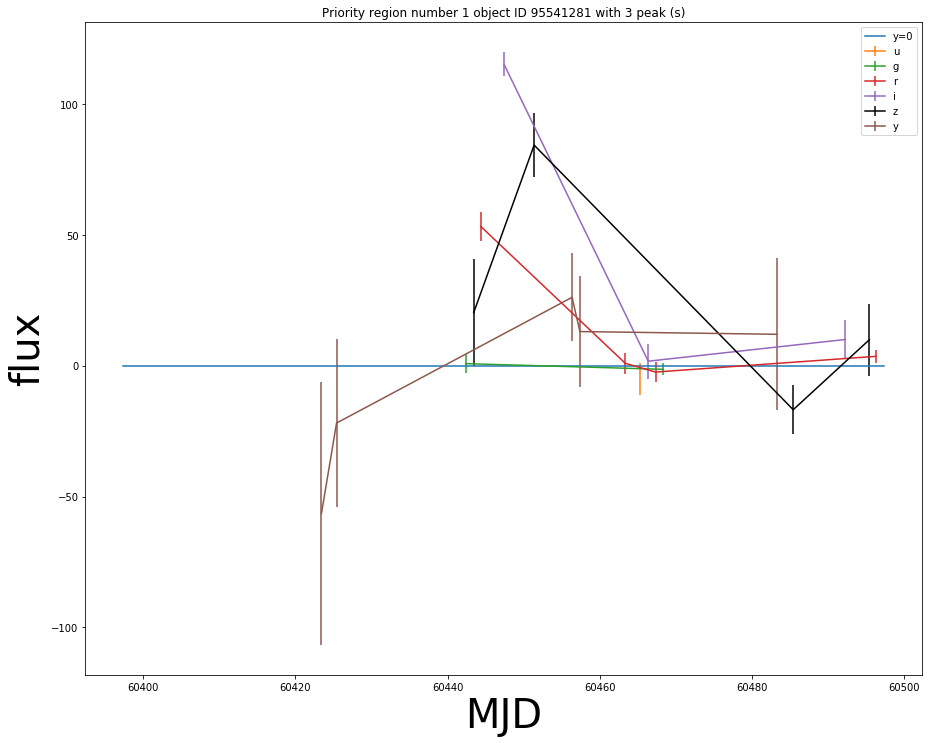

96619113
[59997.3772, 60000.3736]


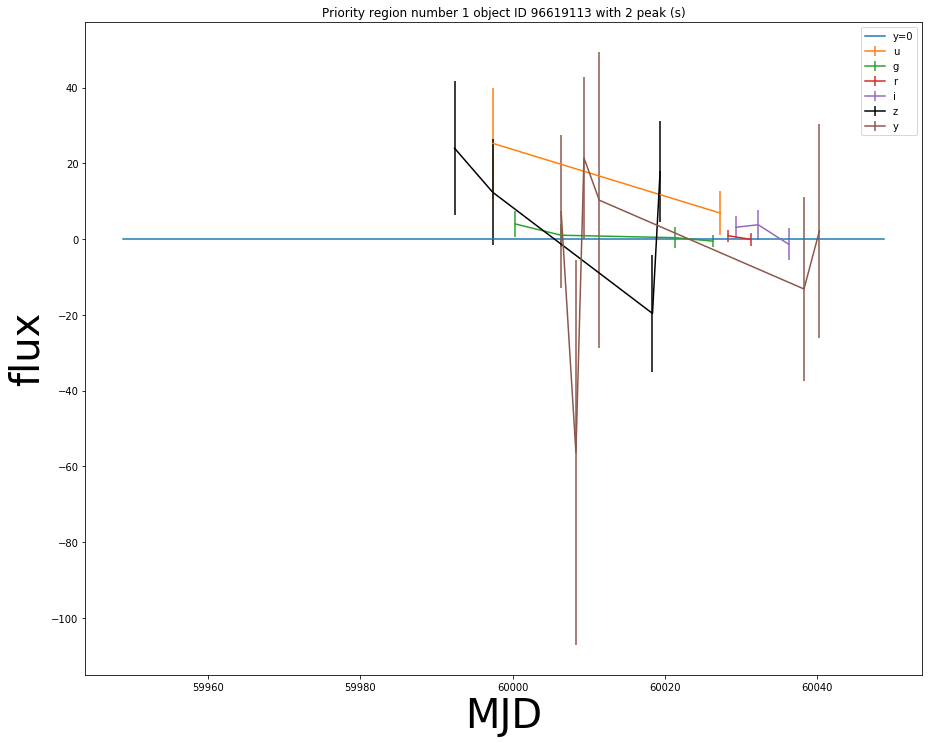

[60514.996, 60513.9735]


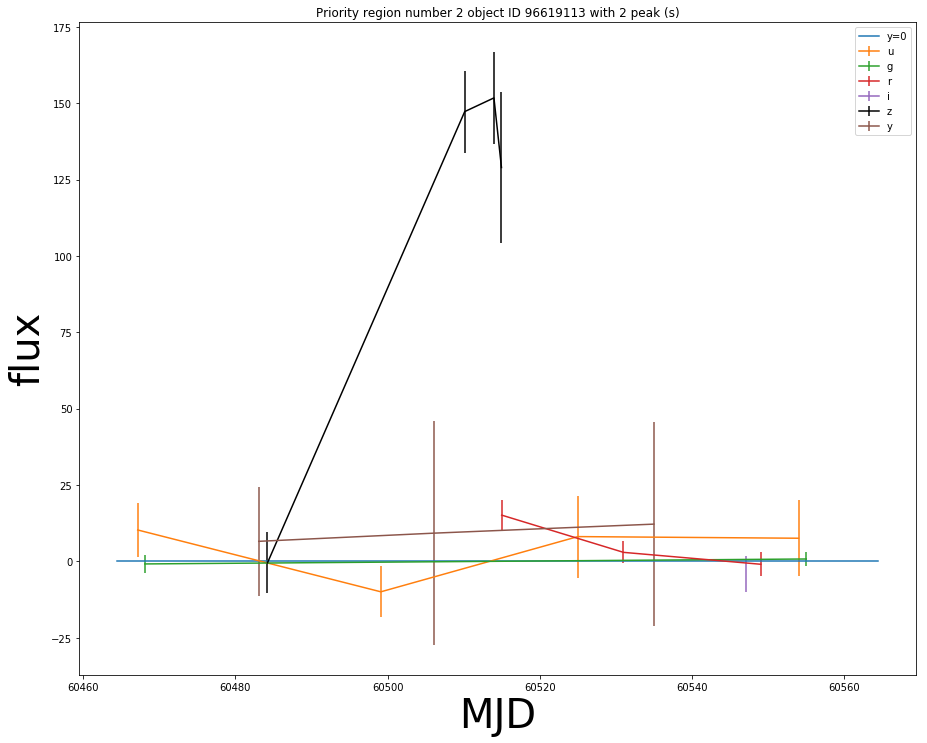

97214939
[60282.1458, 60279.3254]


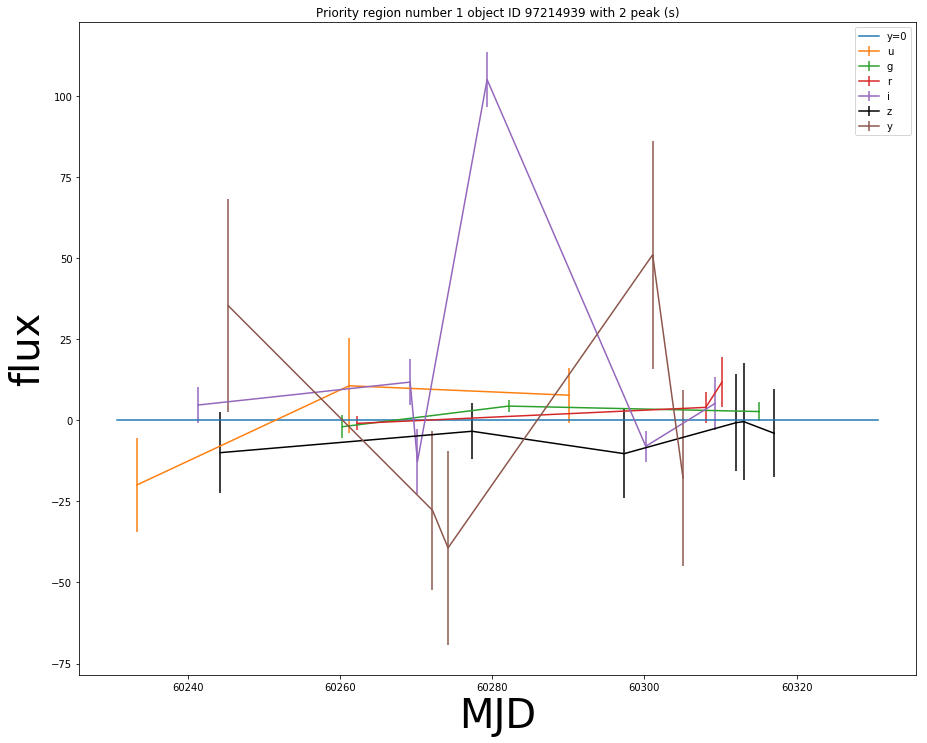

97639845
[60466.1449]


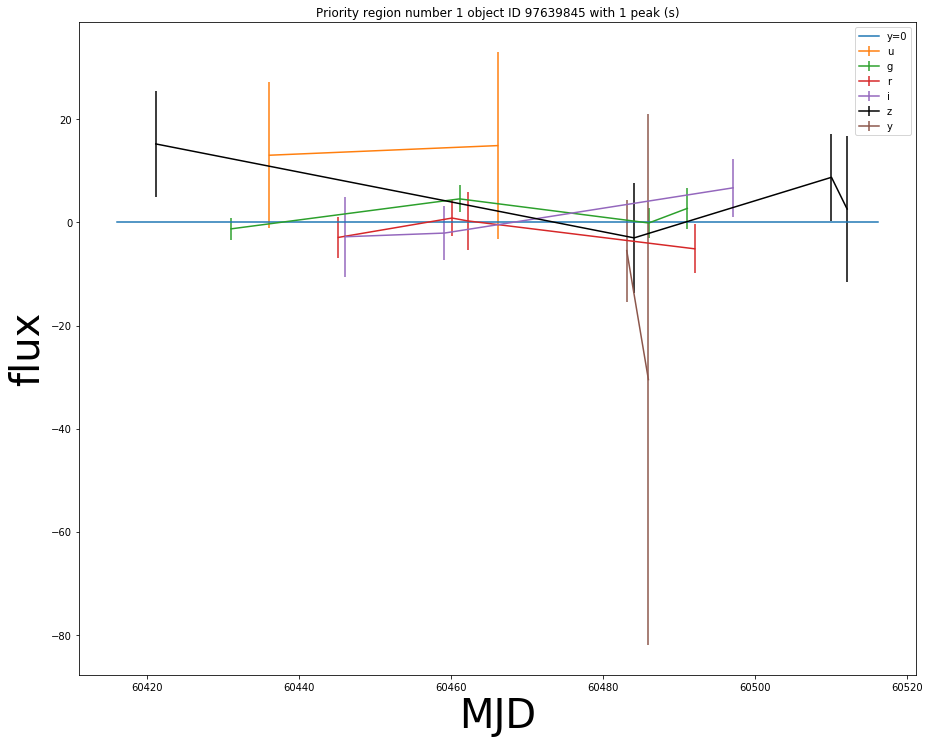

[60376.2318]


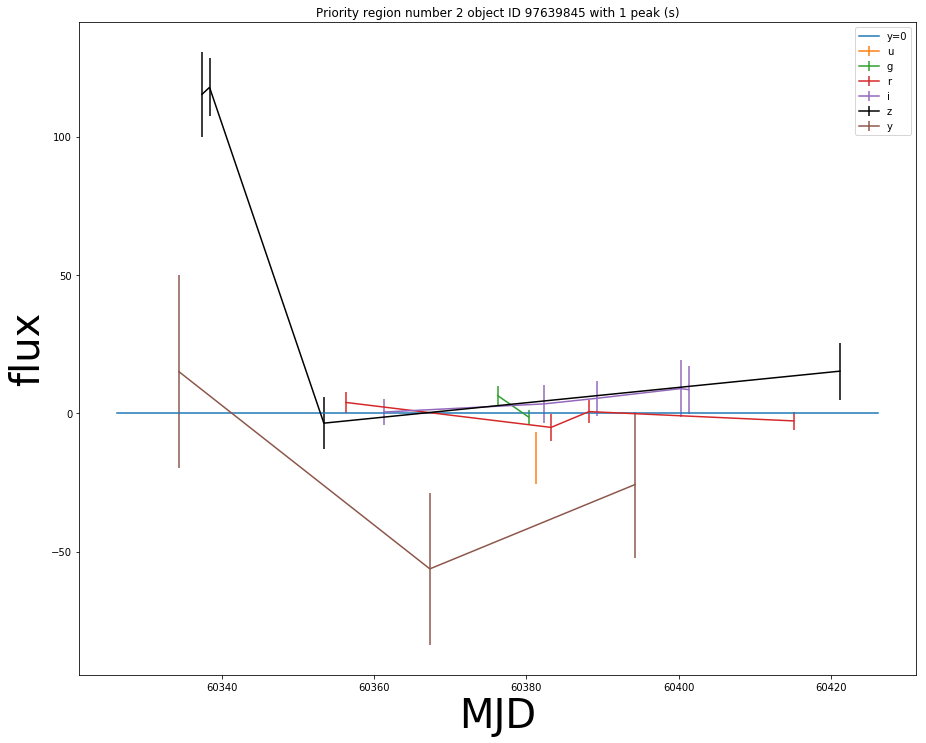

[60085.1862]


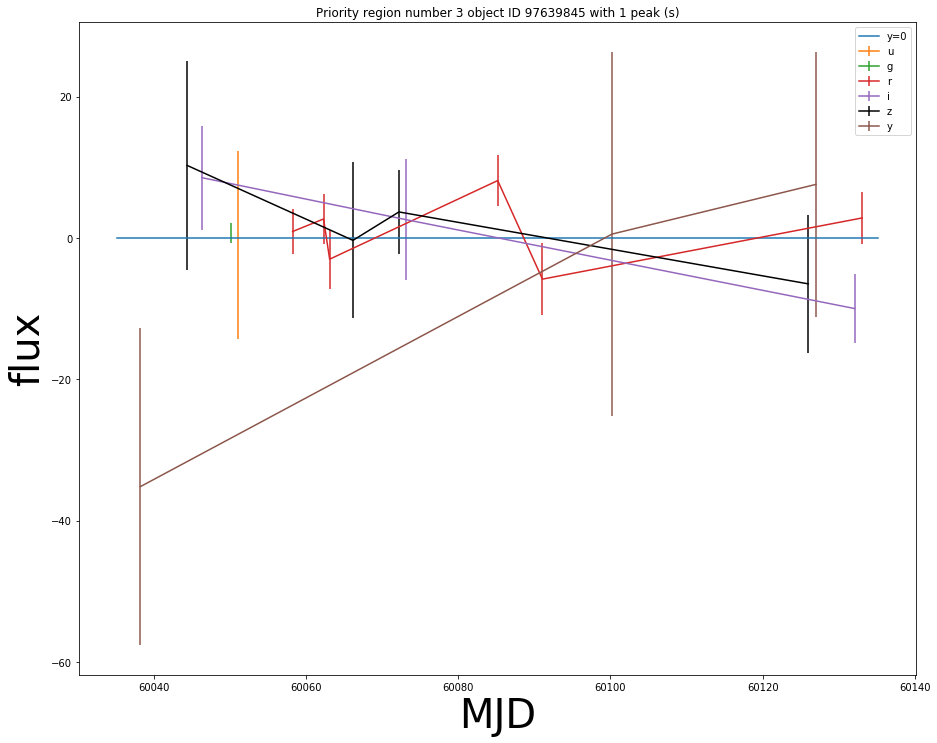

[60400.2979]


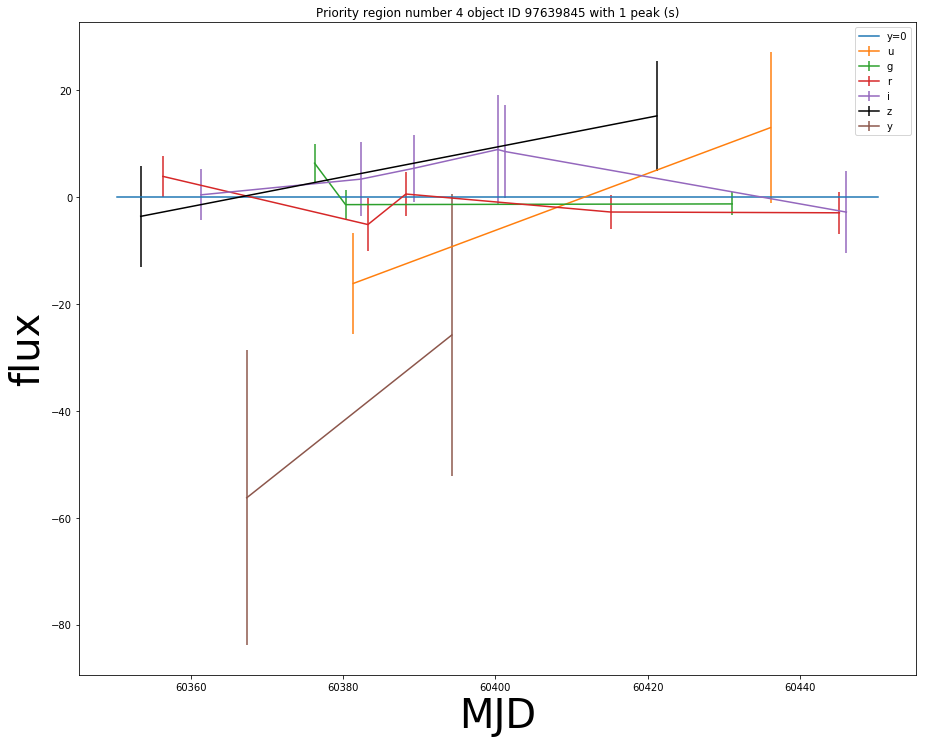

[60338.3604]


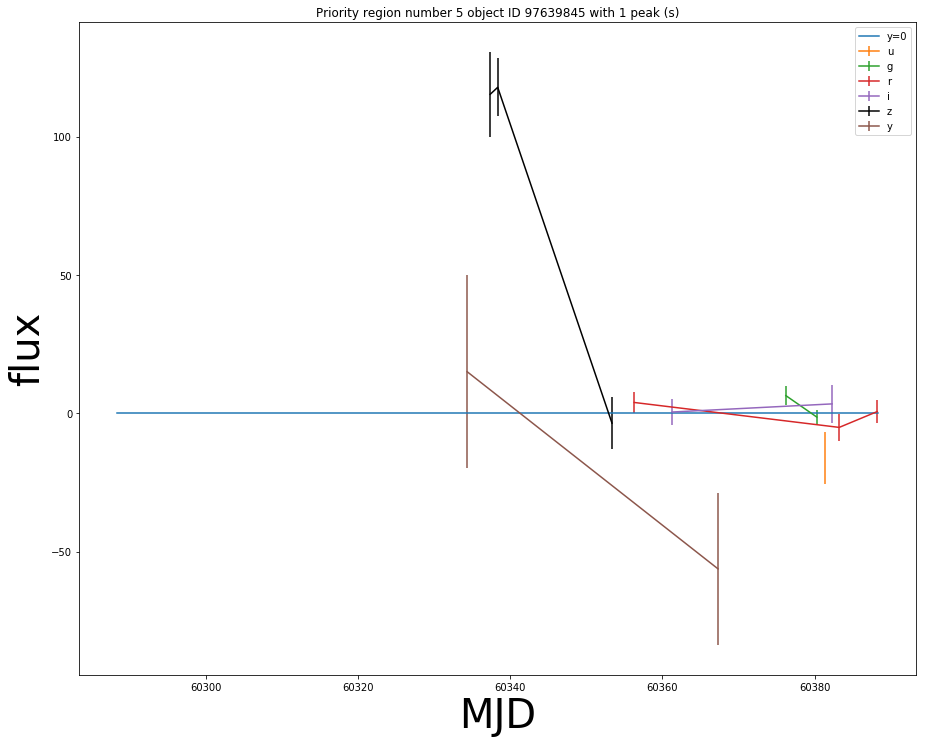

[59652.2236]


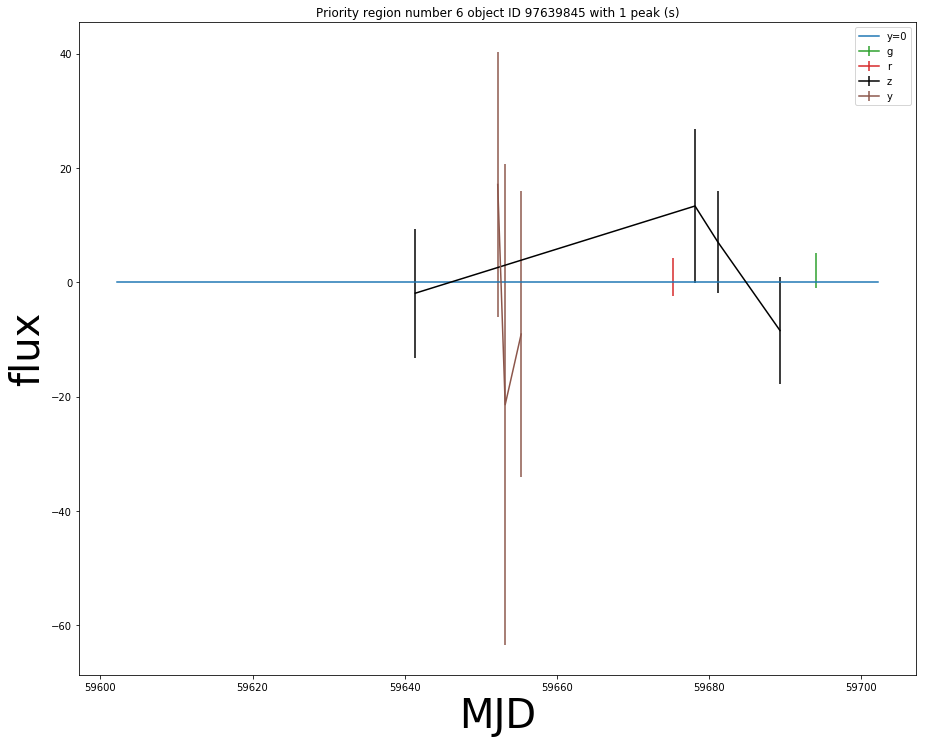

97765302
[60501.2814, 60493.3121, 60496.3196, 60500.2881, 60511.2625]


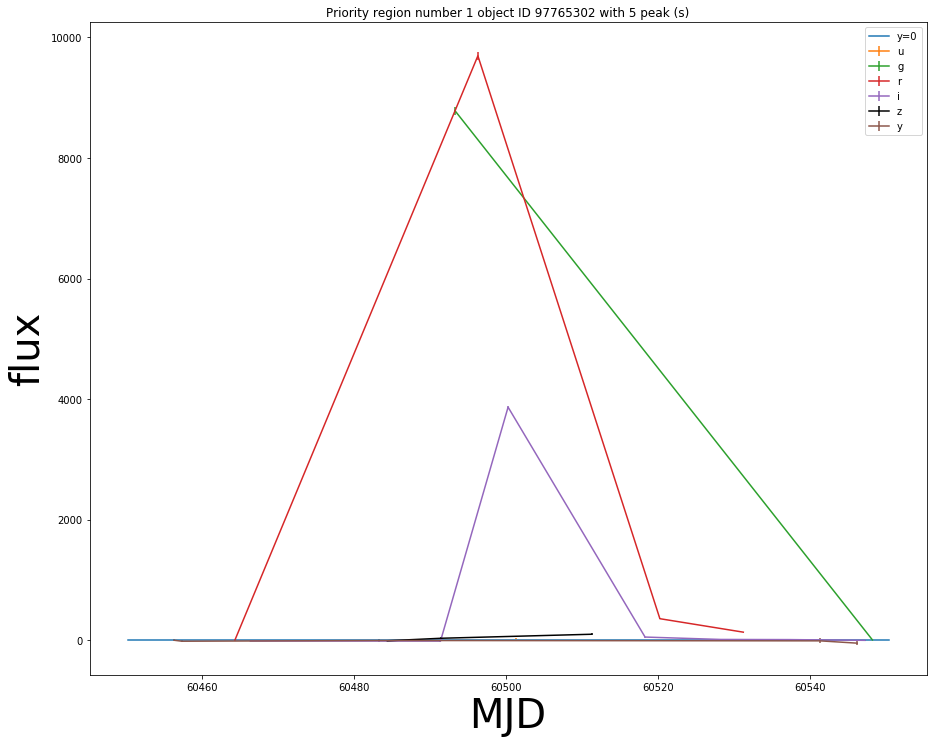

99449747
[59843.3165, 59839.2847]


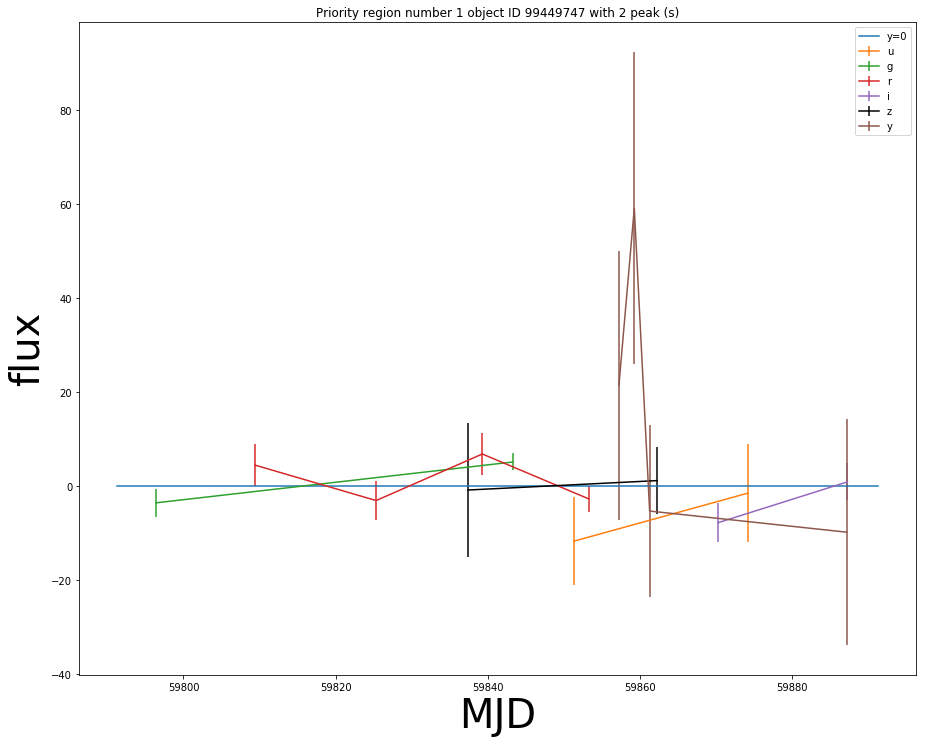

[59583.0448, 59588.0425]


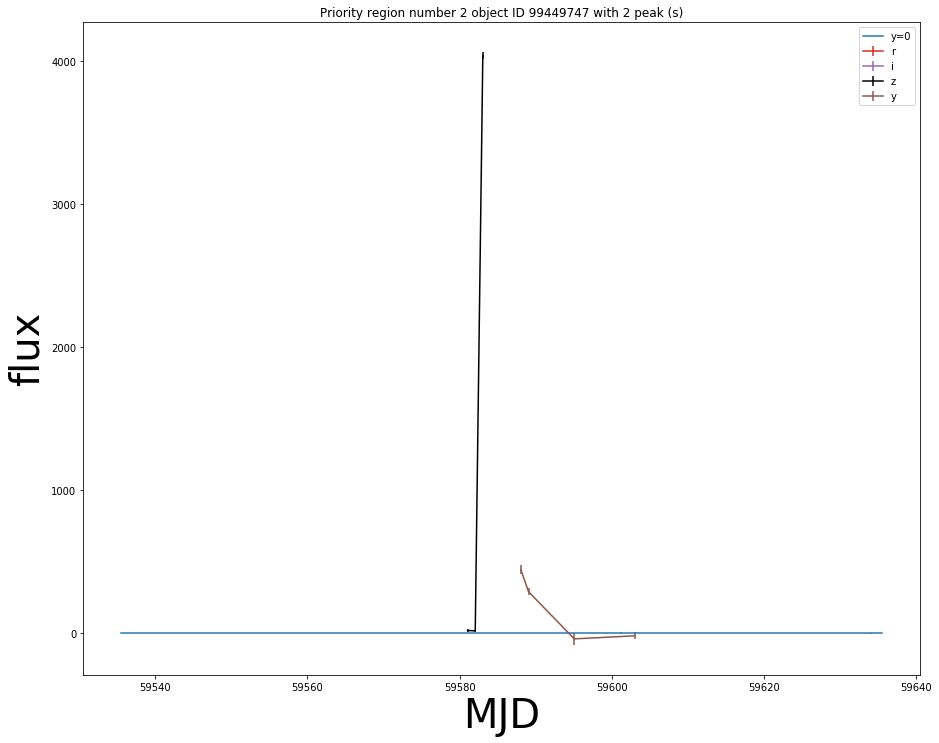

102551107
[59722.3742, 59715.2395]


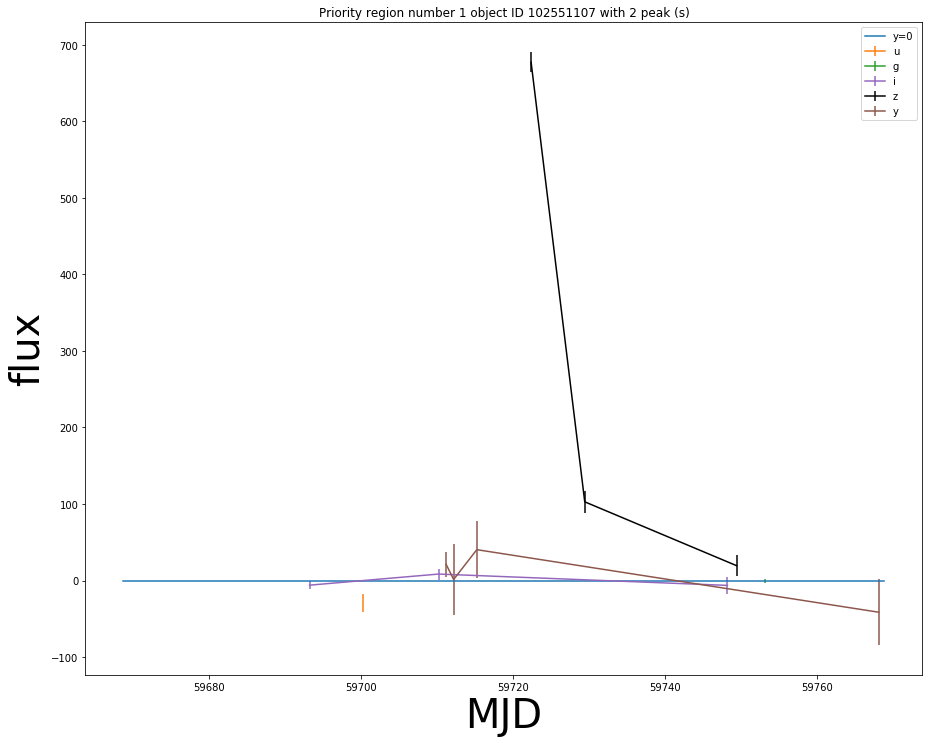

102599855
[60016.045, 60016.315, 60012.259]


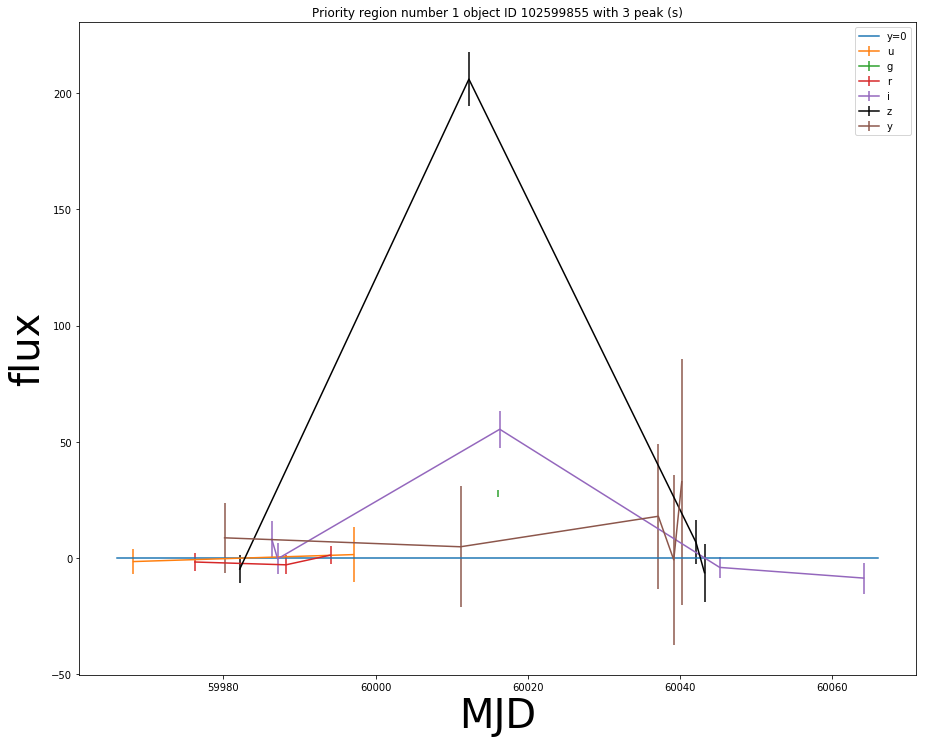

103258429
[60066.3567, 60067.3293]


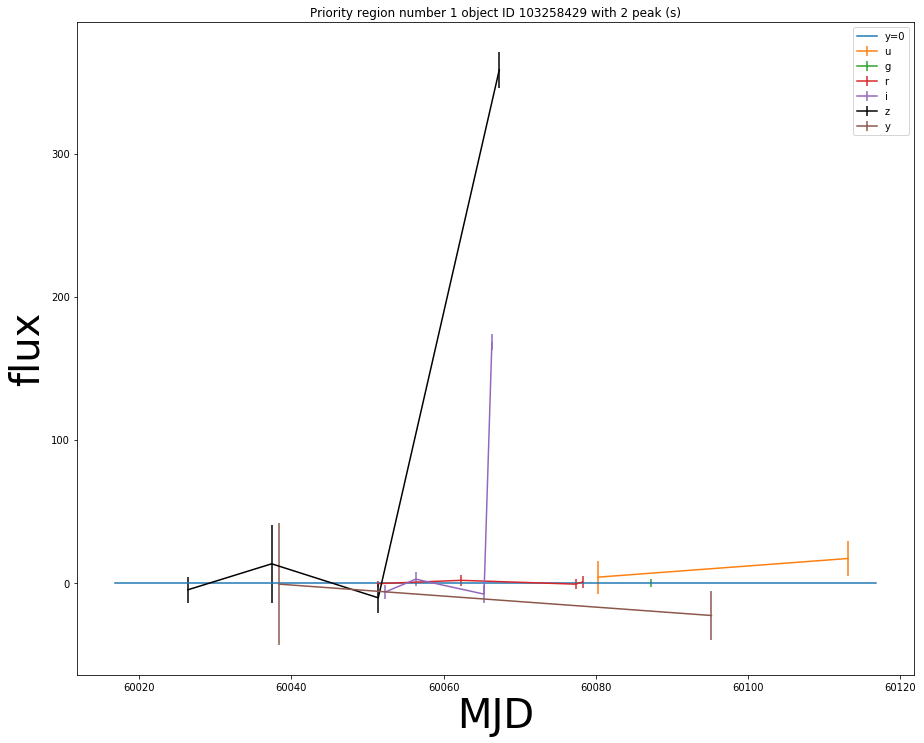

103989029
[60202.0775]


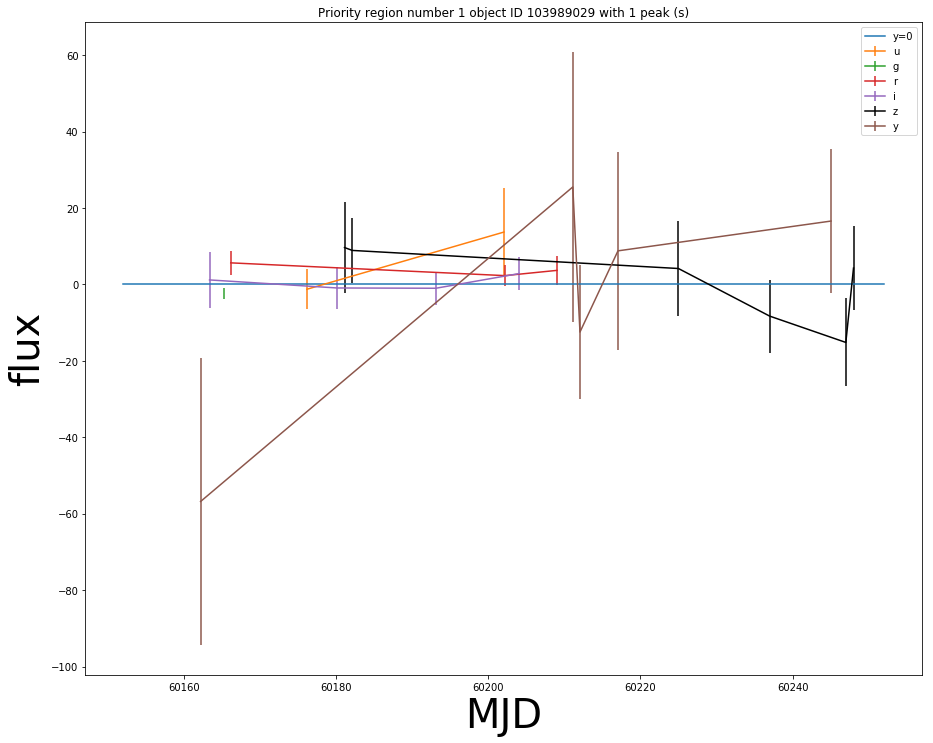

[59782.4086]


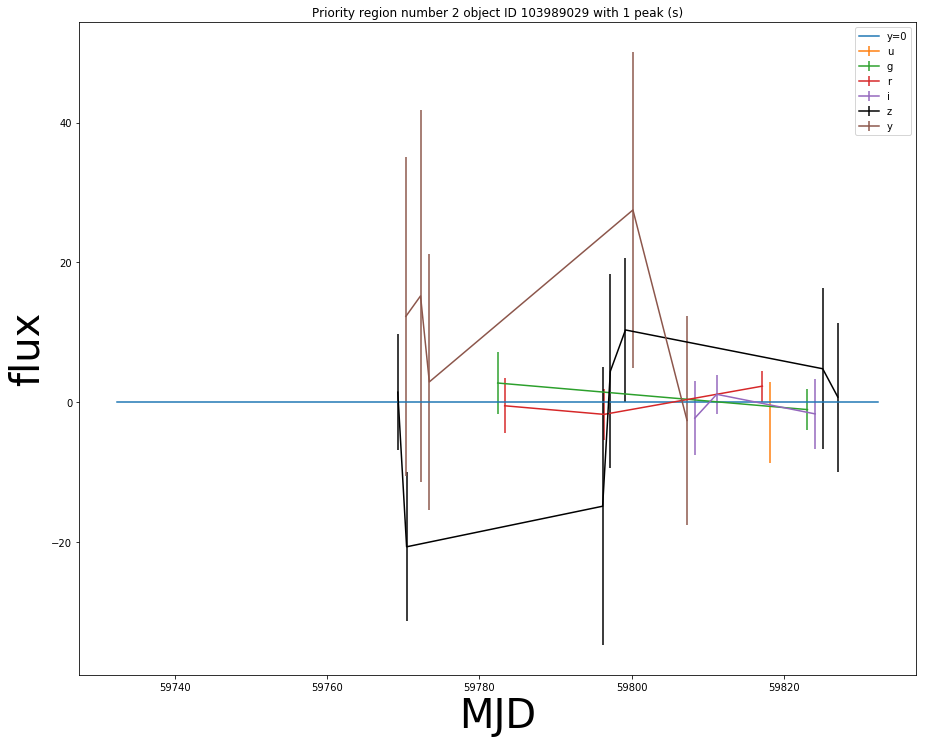

[60166.1723]


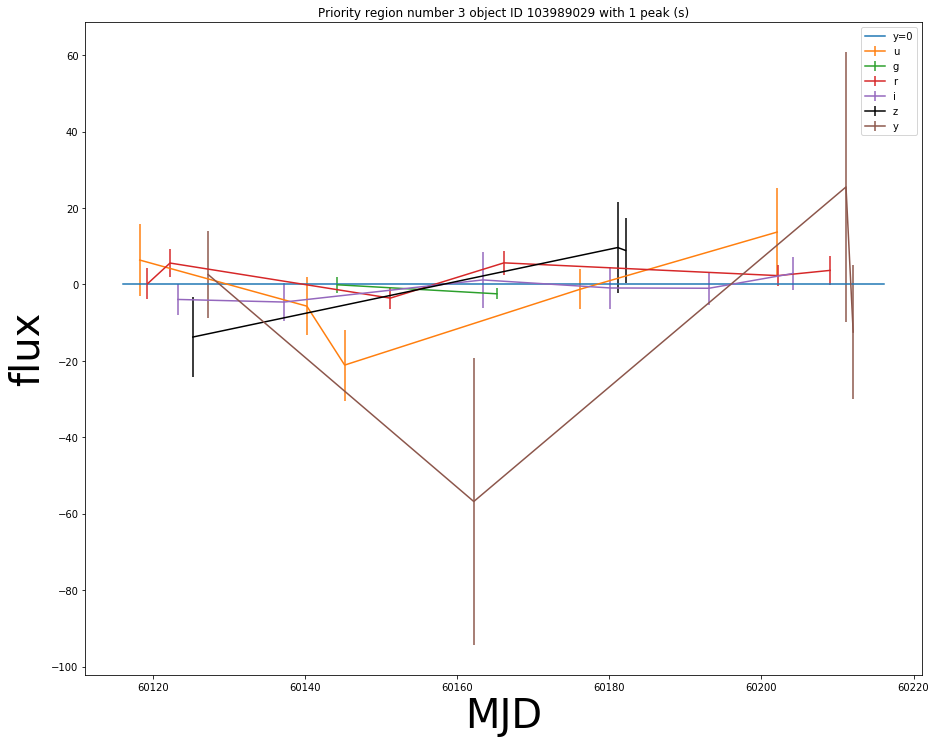

[59923.0814]


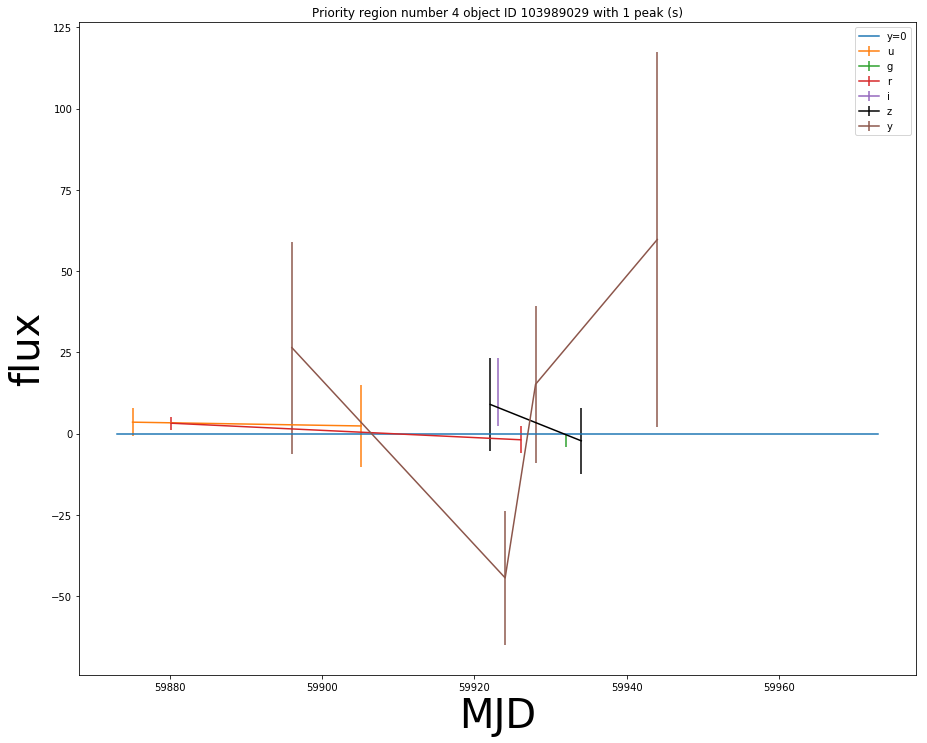

[59862.0663]


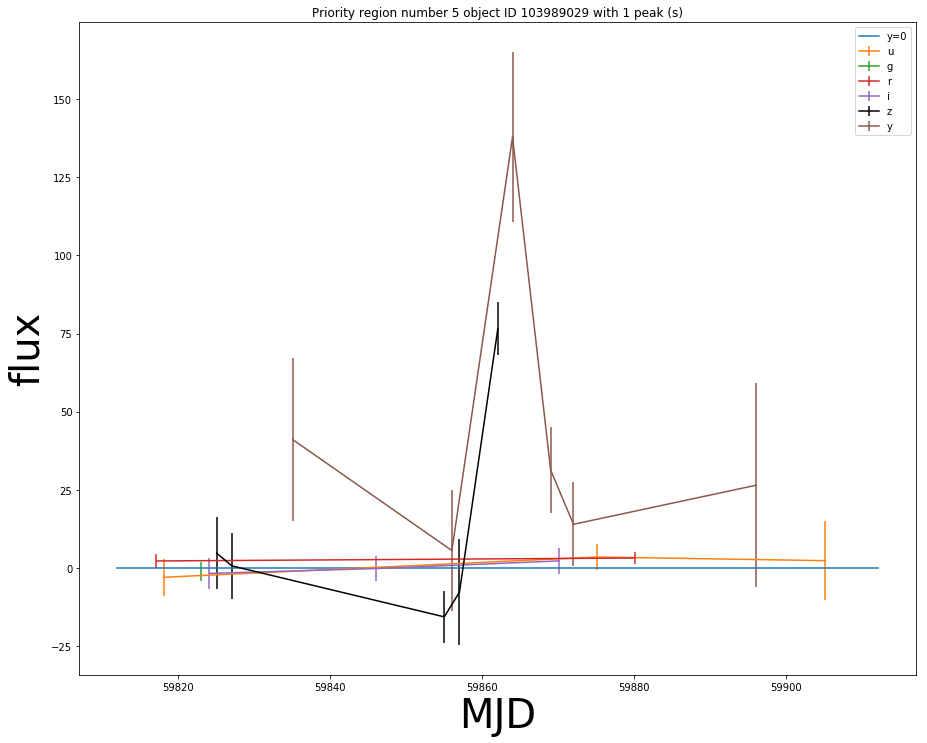

[60673.0334]


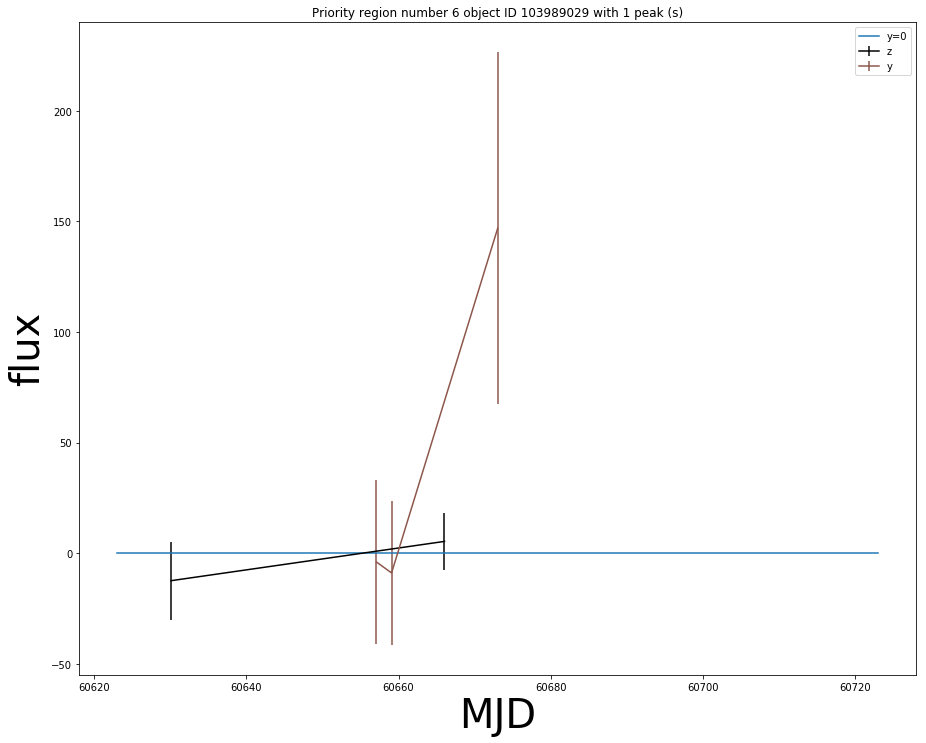

105385367
[60658.0998, 60661.0352]


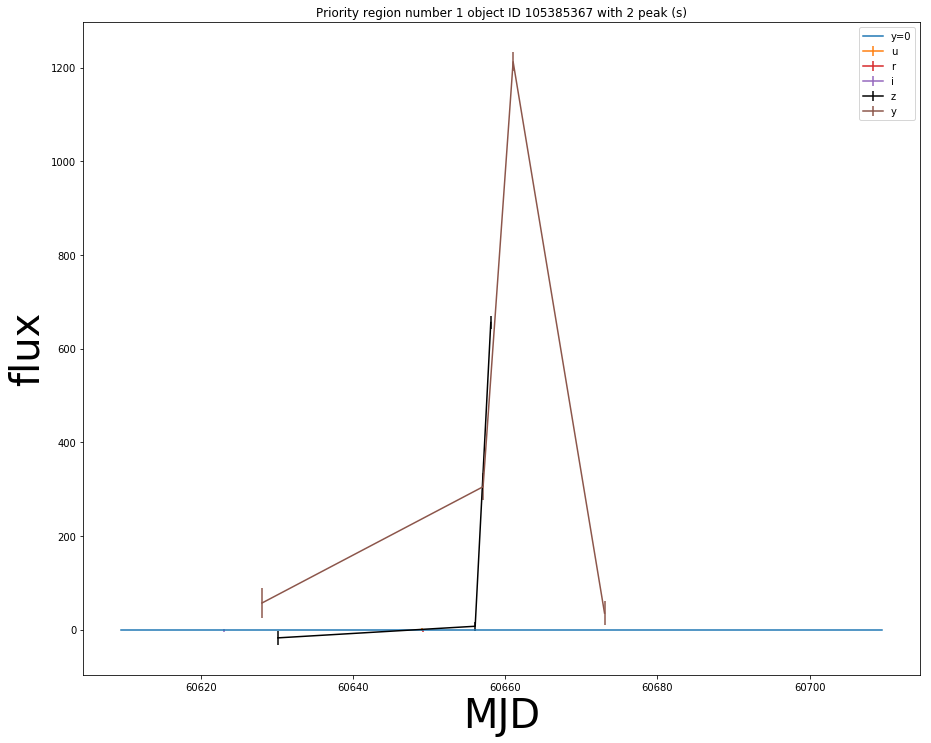

107129776
[60018.3316, 60017.3902]


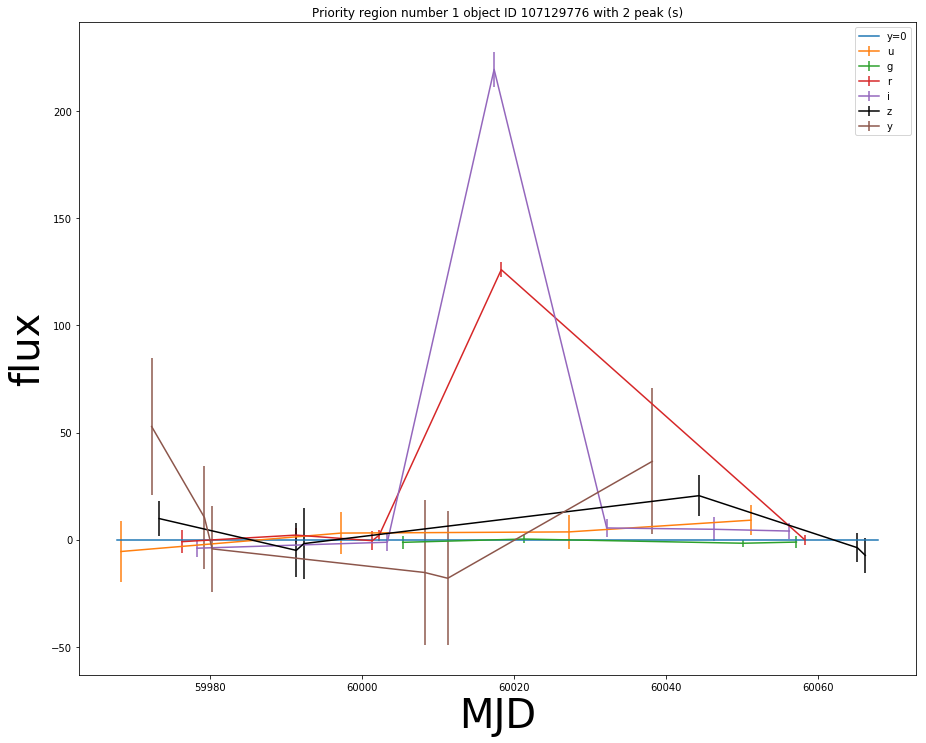

108253858
[60233.2855, 60242.2592, 60247.2582, 60241.1899]


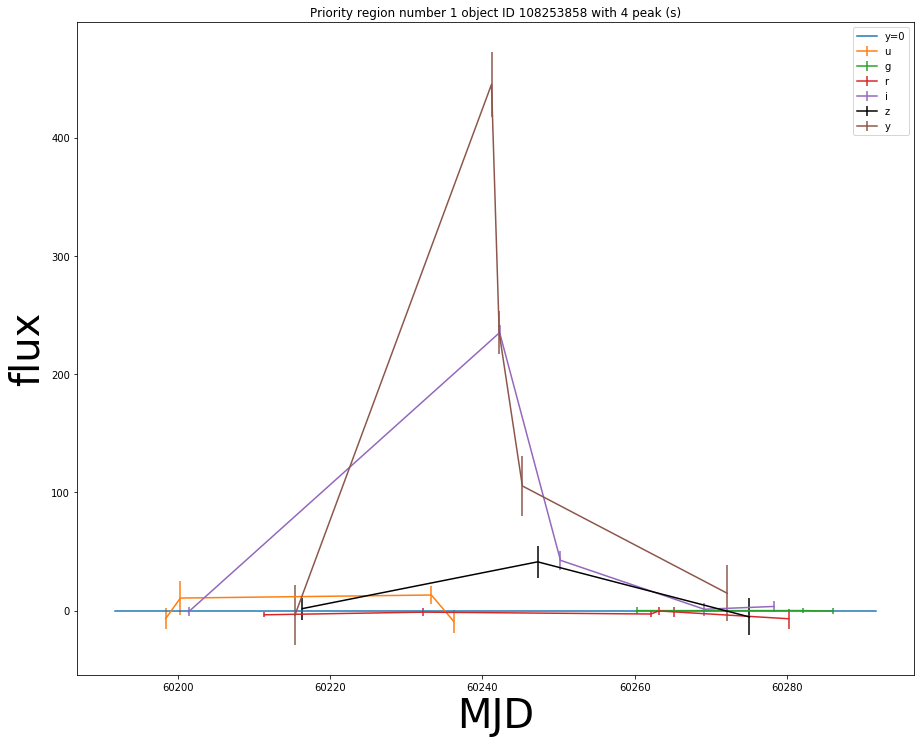

108305965
[60140.2124]


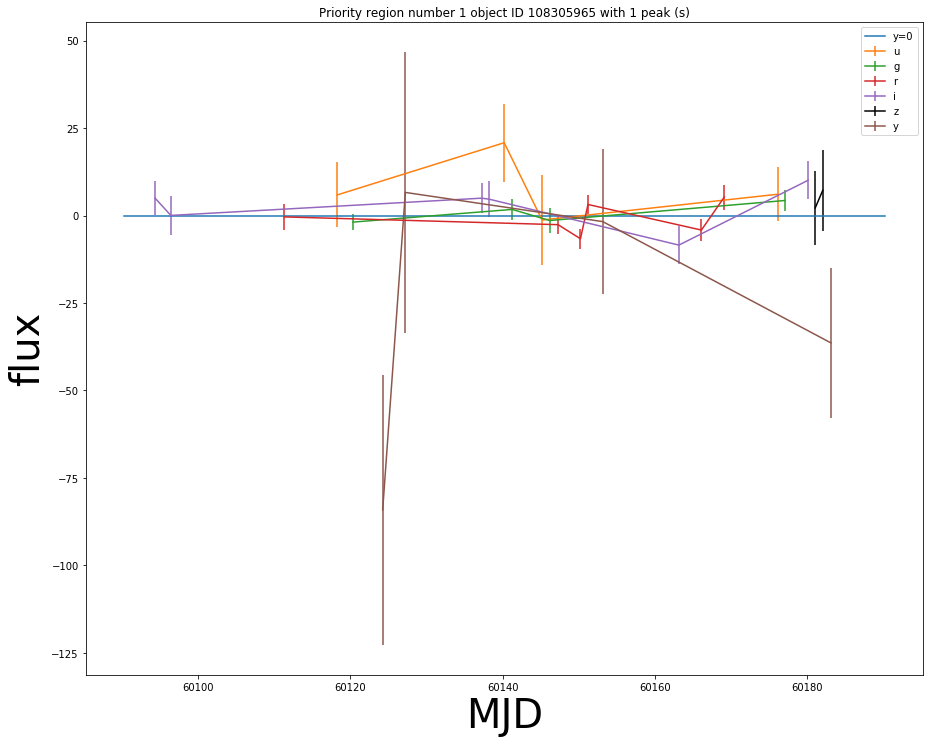

[60177.1162]


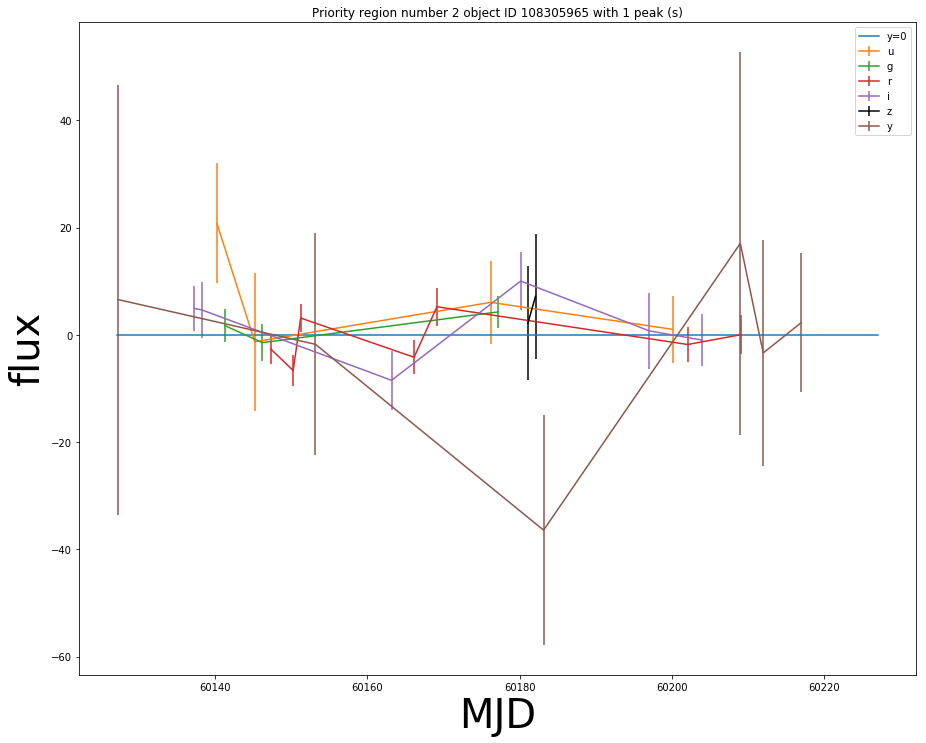

[60067.4032]


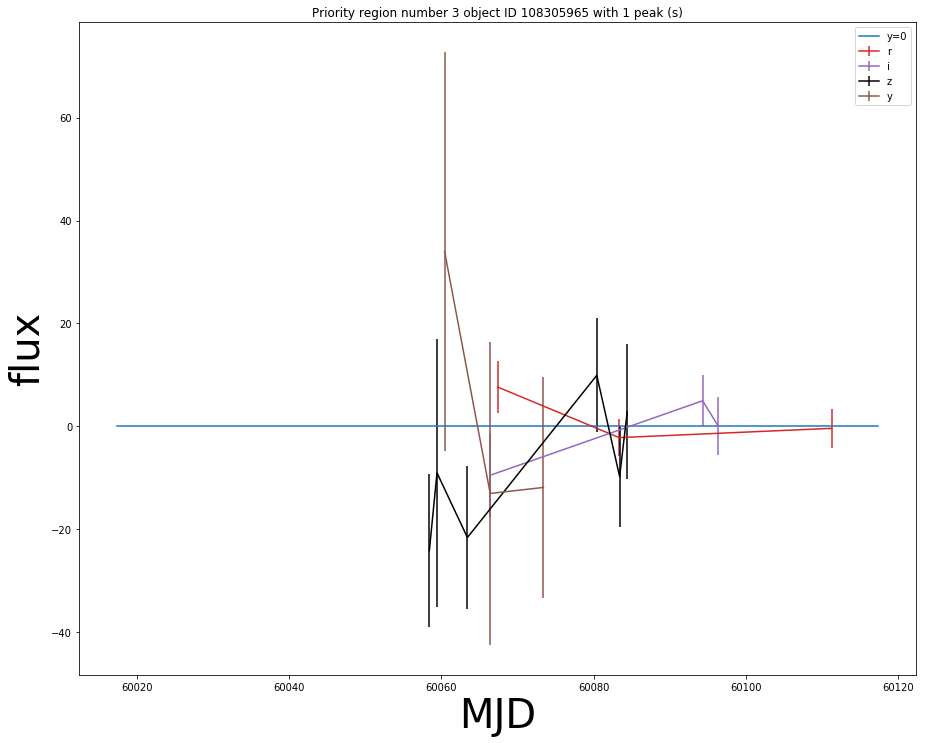

[59900.0547]


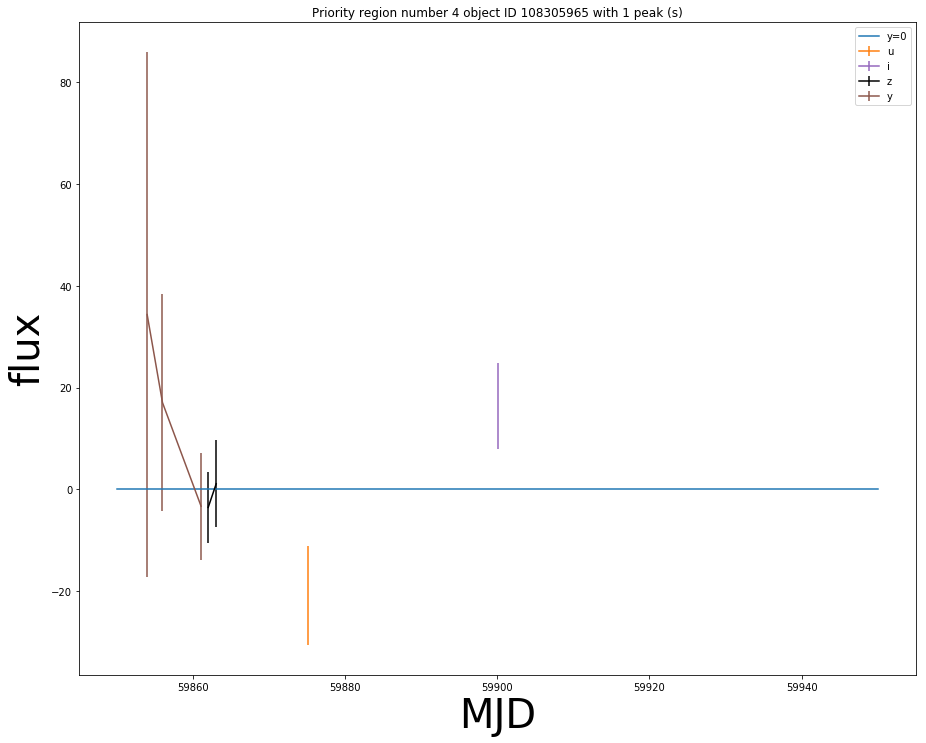

[60236.0059]


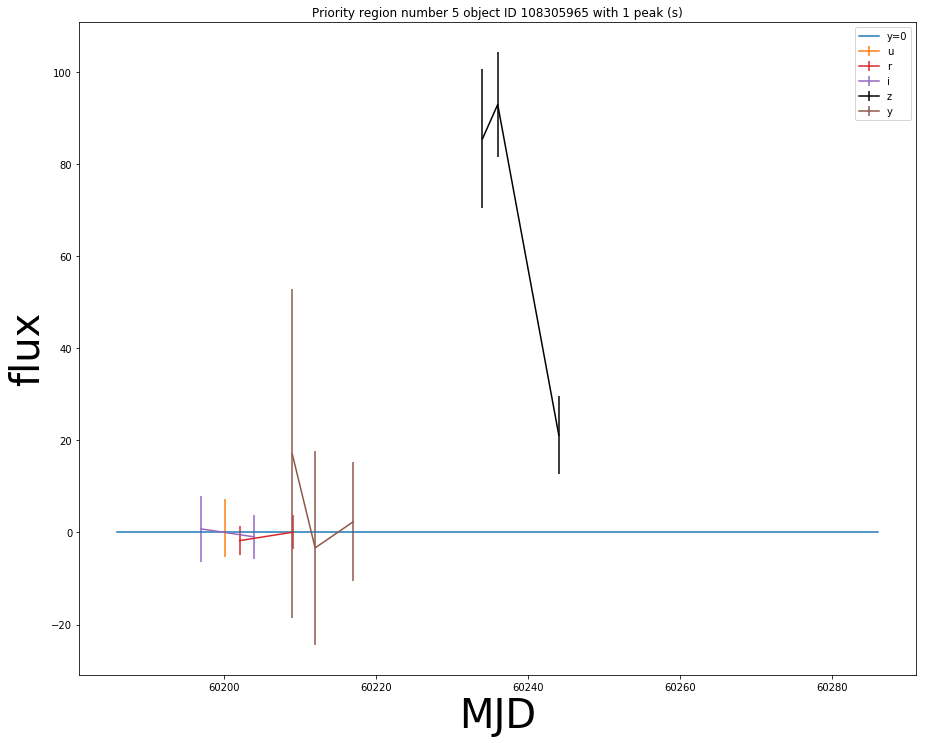

[60627.0422]


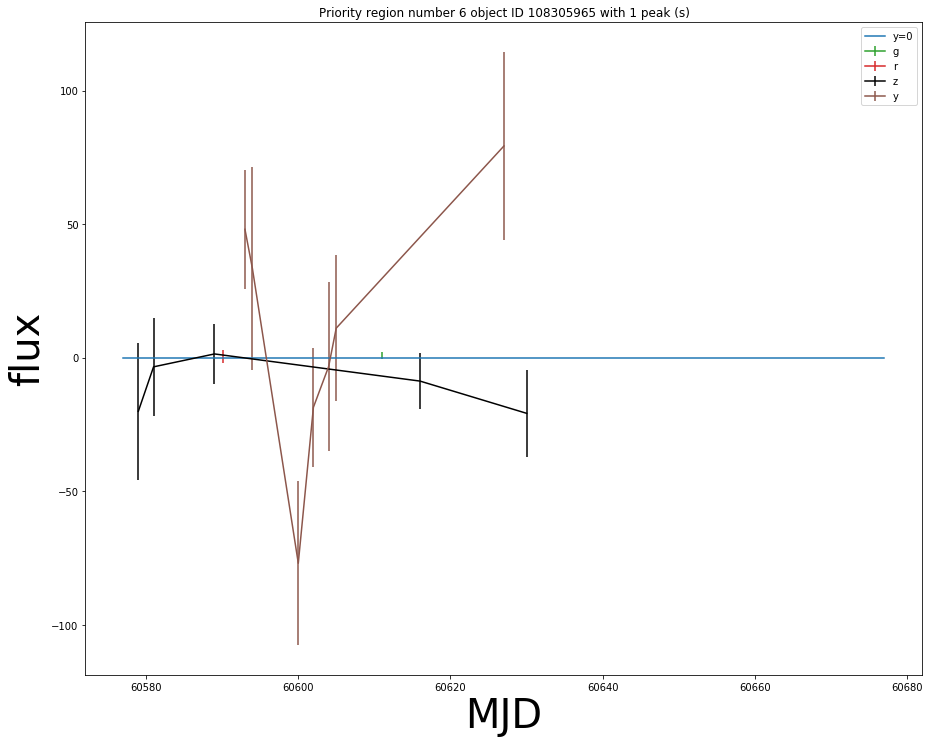

110808232
[59837.2006, 59843.0955, 59832.1379]


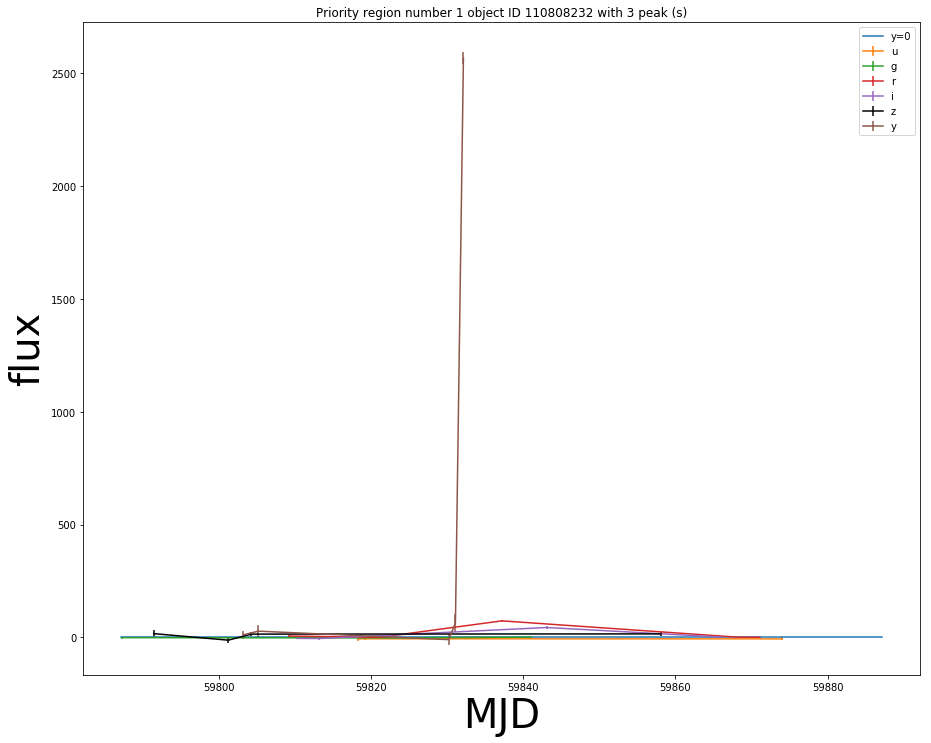

113330500
[60330.3405, 60335.3126]


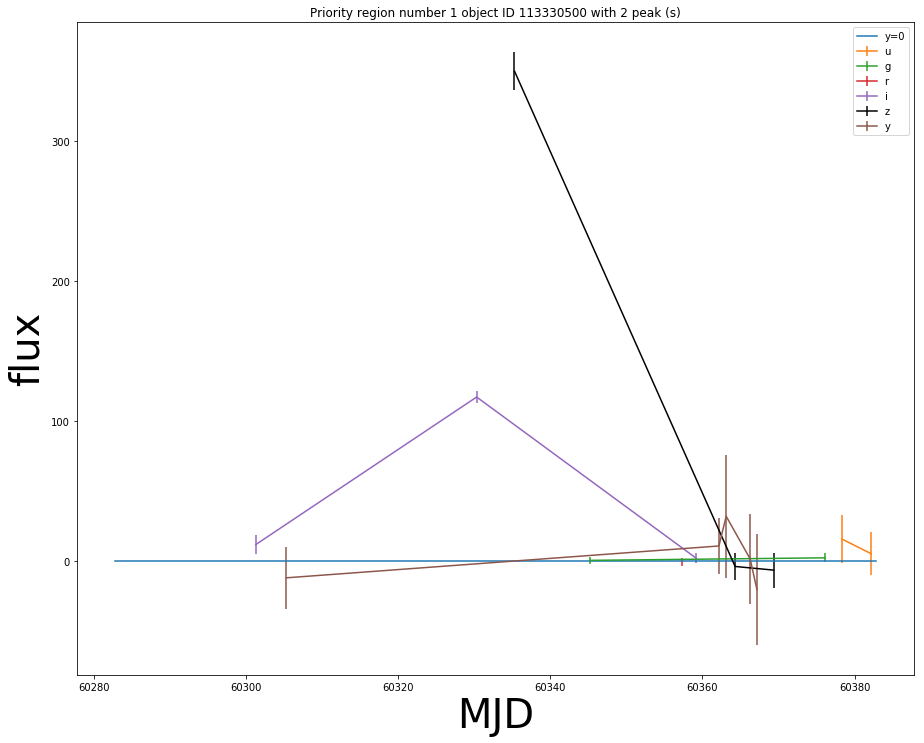

113678572
[60141.155, 60143.1437, 60138.1454]


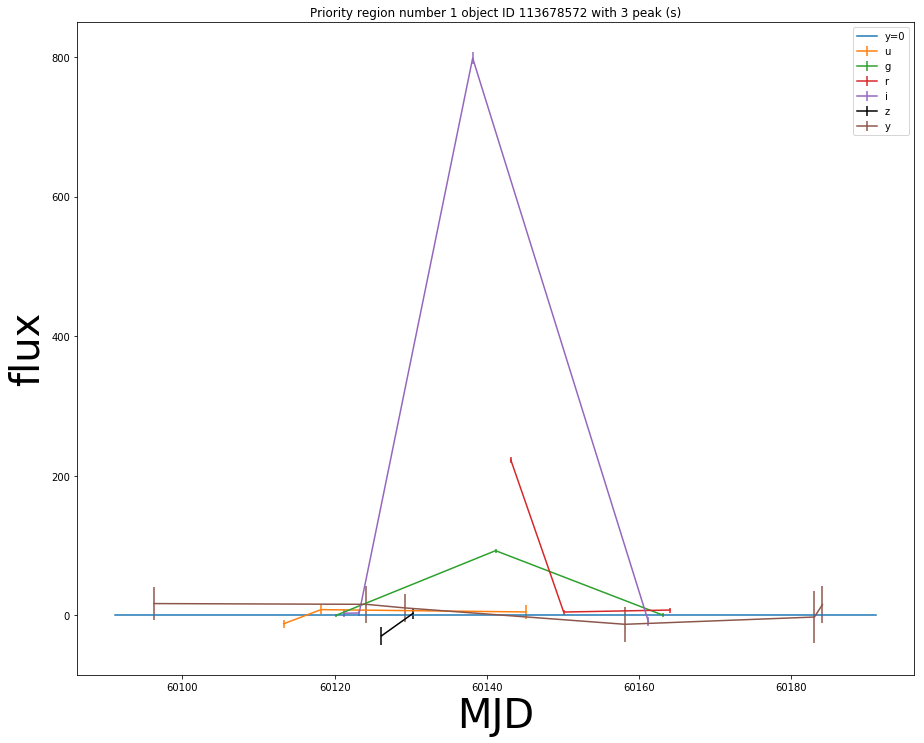

113851505
[60265.1554, 60267.2015]


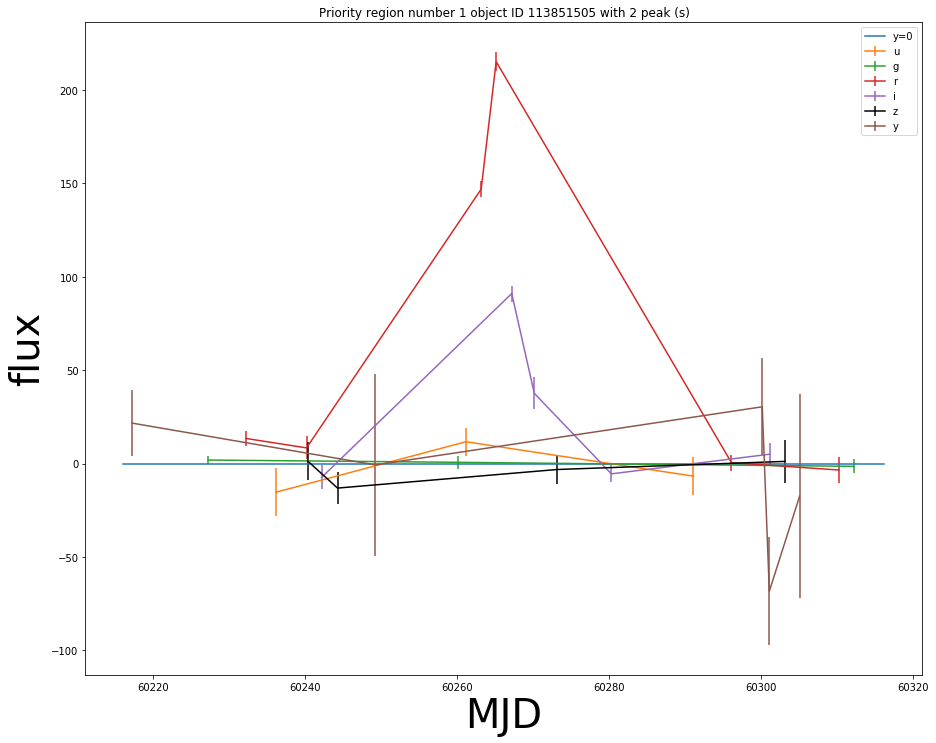

114467134
[59904.1104, 59901.0461, 59895.2559, 59910.0325]


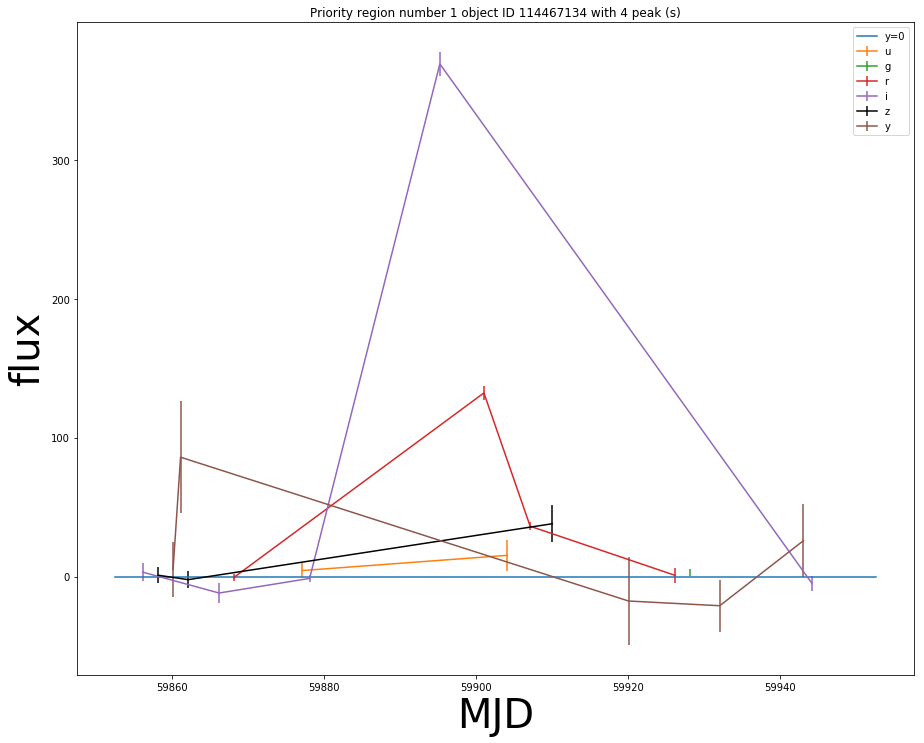

115381923
[60578.1707, 60579.158]


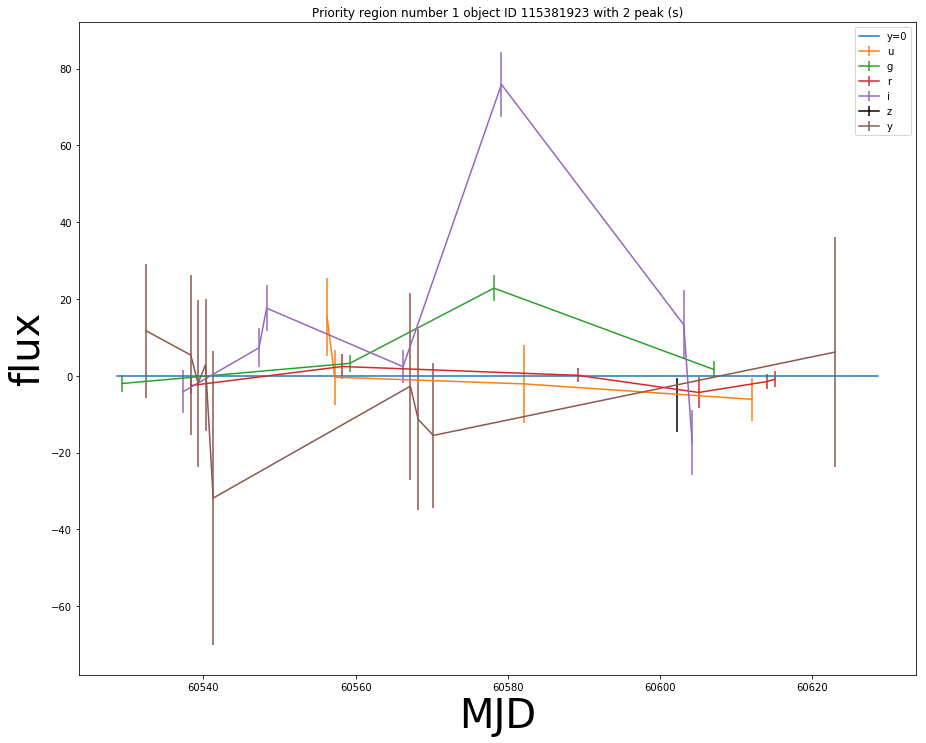

115713701
[59870.081, 59878.0039]


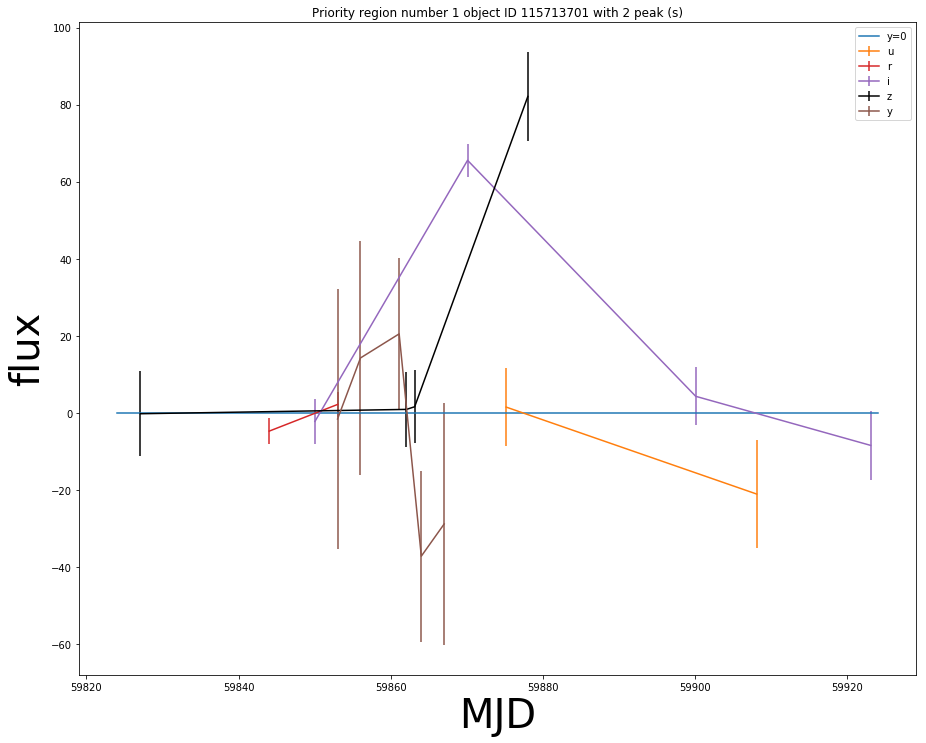

118230321
[59806.2618, 59804.1641, 59803.1005]


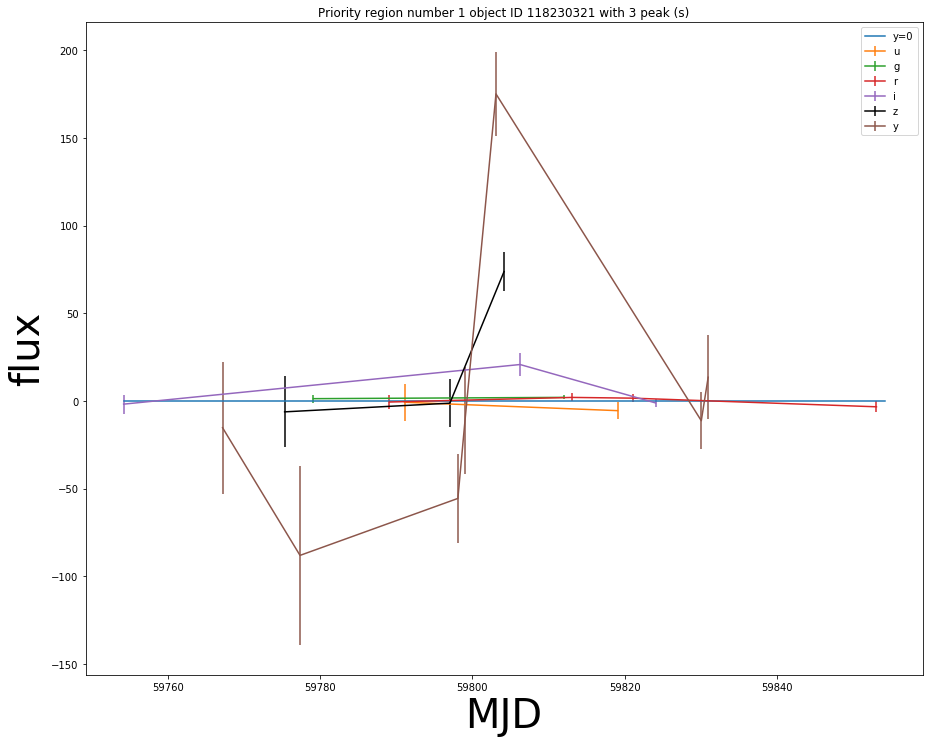

119260275
[60163.1514, 60166.1395, 60163.1749]


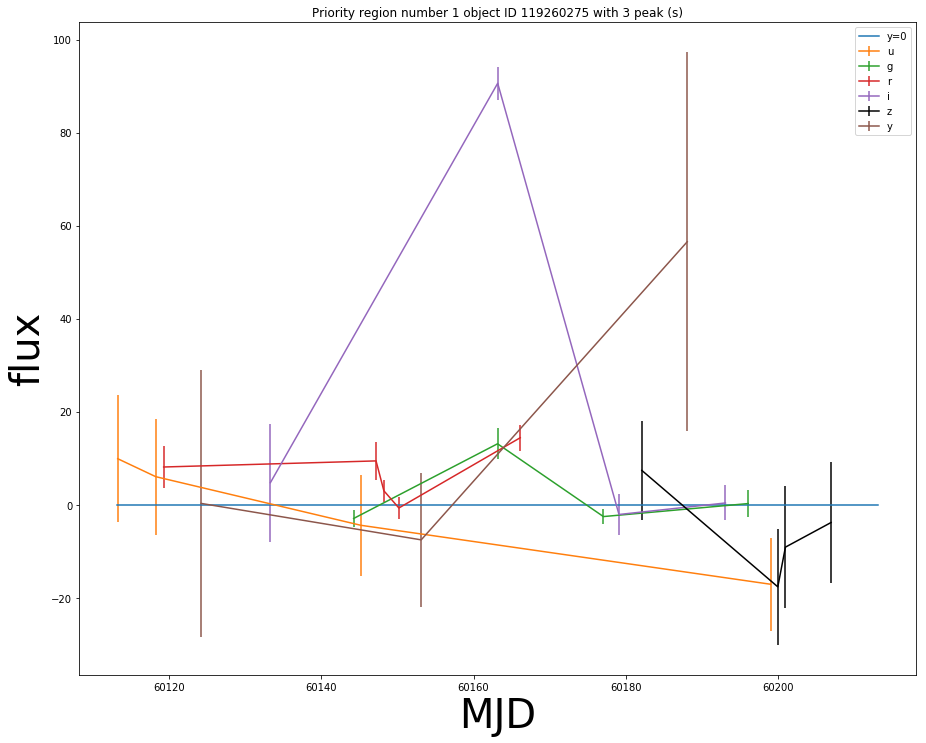

120794836
[59690.2416, 59688.2447, 59686.239]


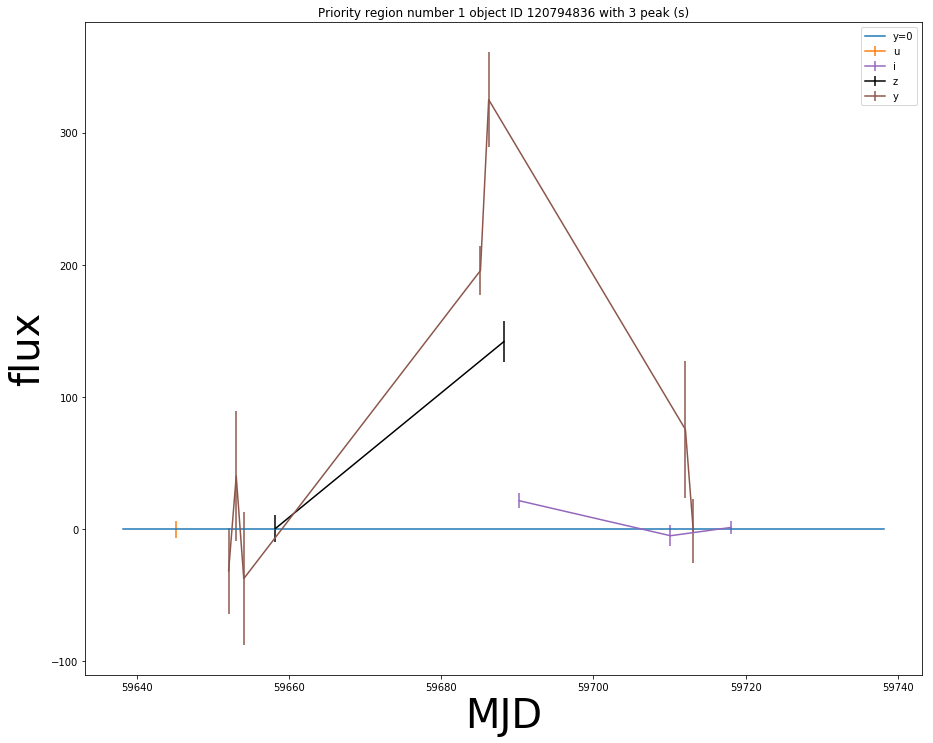

120845357
[59931.2192, 59930.2947, 59941.2106]


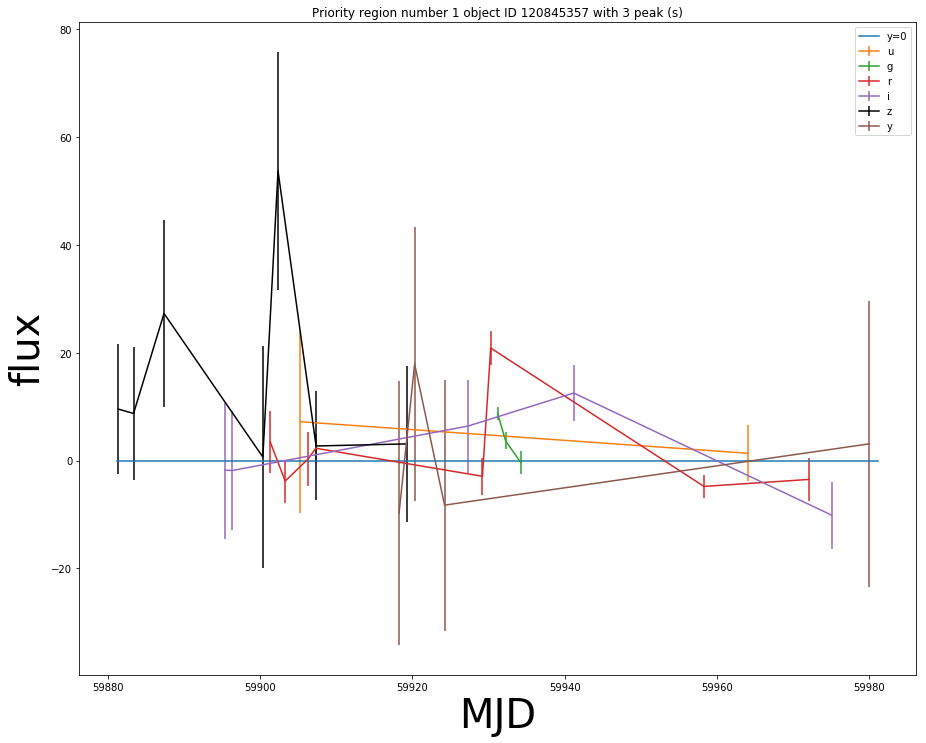

121016694
[60389.3648, 60397.3835, 60392.329]


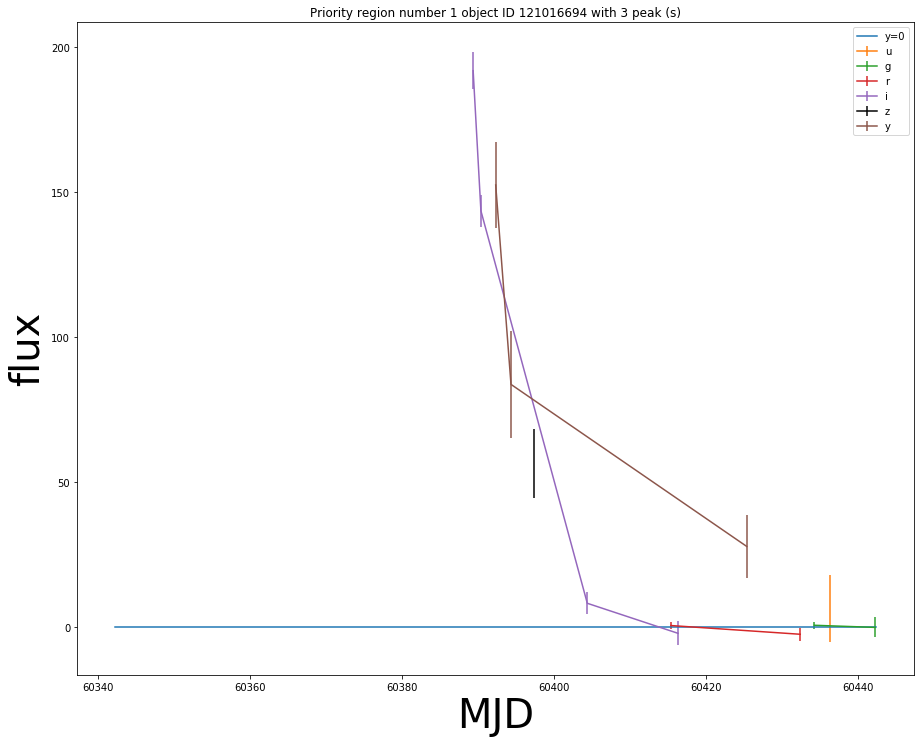

121257780
[59782.3527, 59784.3135, 59782.3608, 59784.4394]


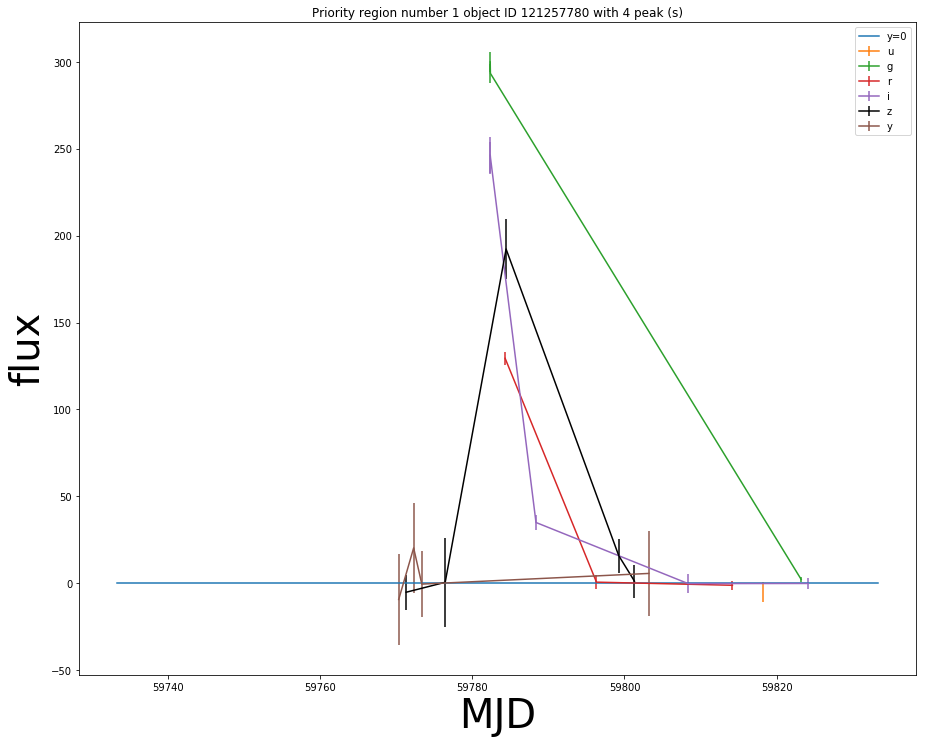

121326699
[59851.1608, 59853.2377, 59850.1127]


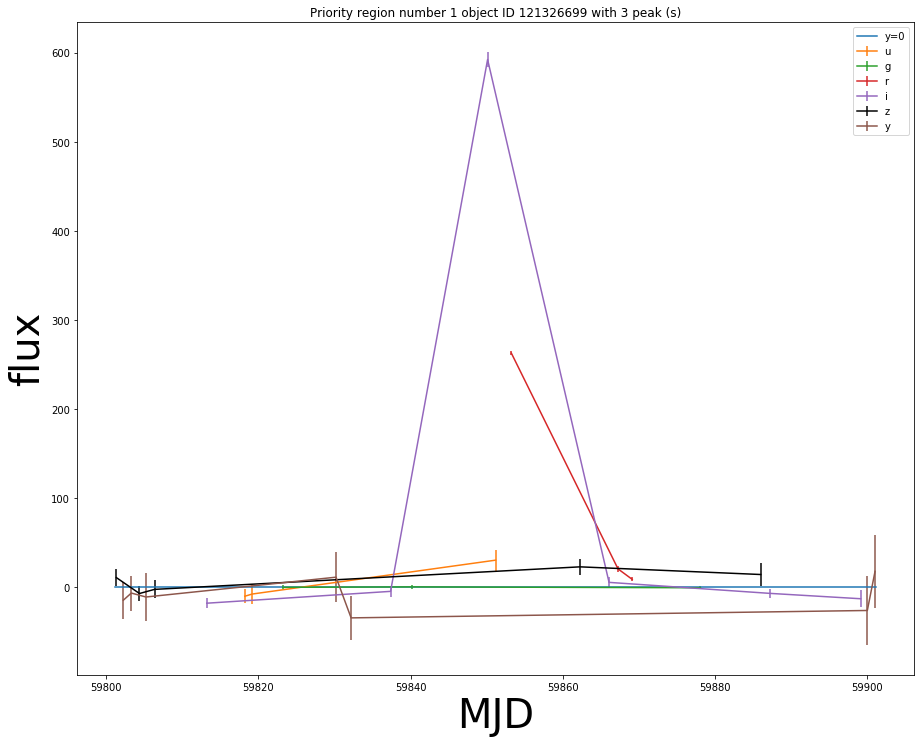

122963326
[60583.274, 60586.2627]


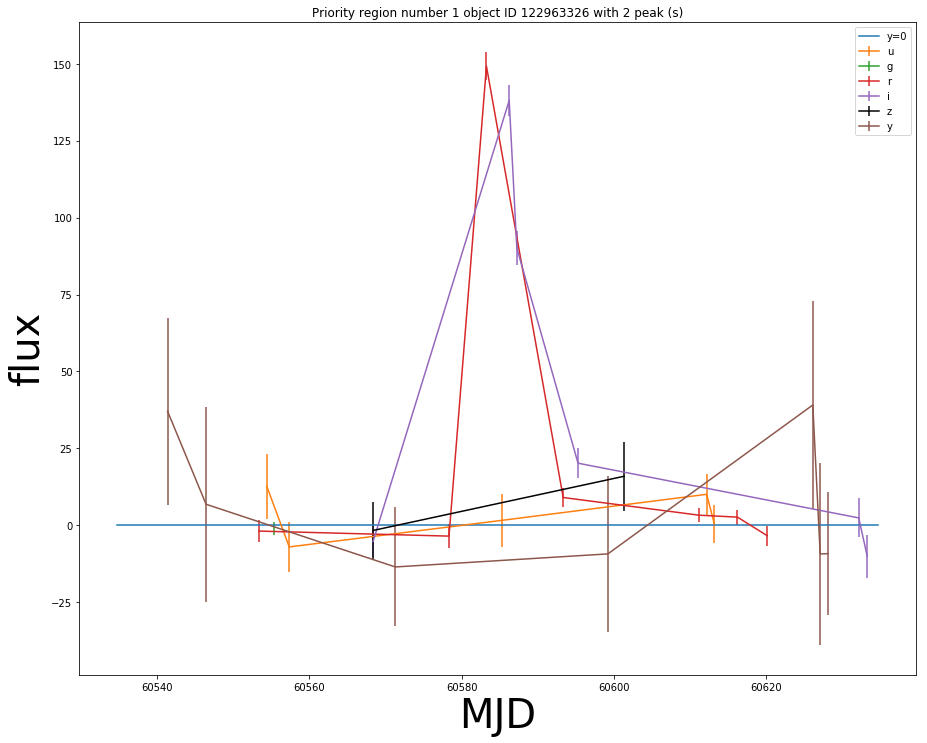

124687561
[60198.2872, 60196.3018]


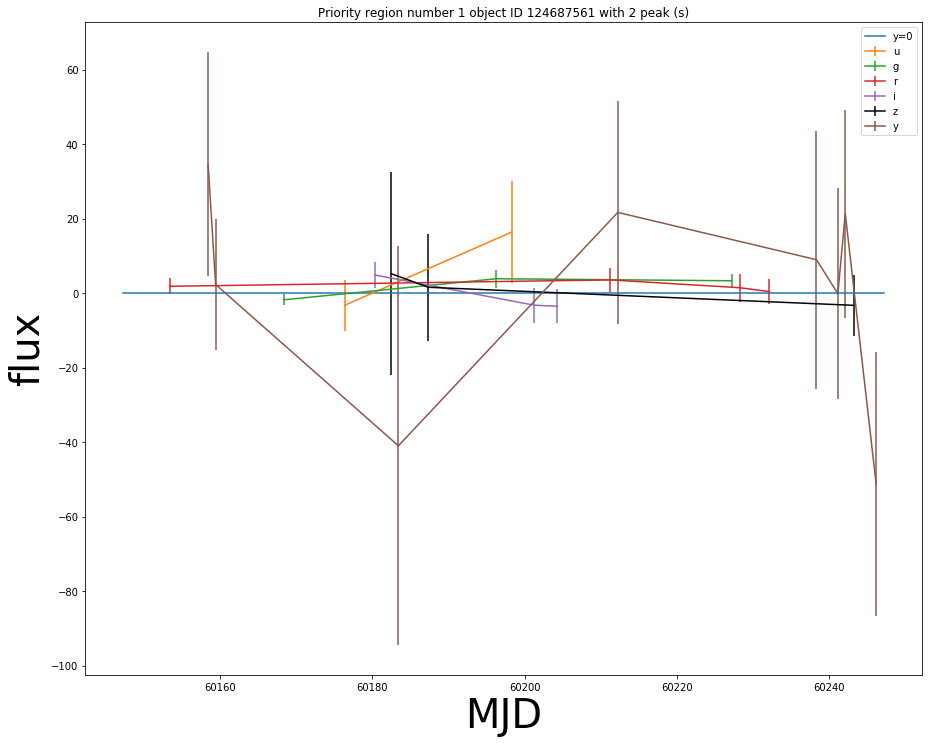

[59977.0442, 59978.0525]


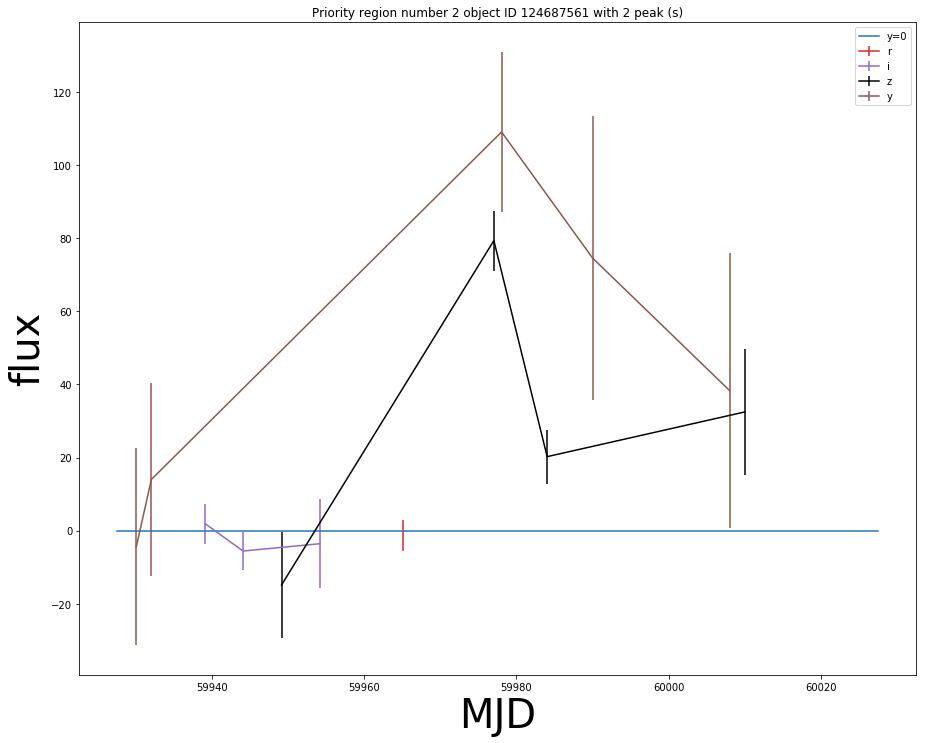

125554681
[60559.1465, 60566.1753]


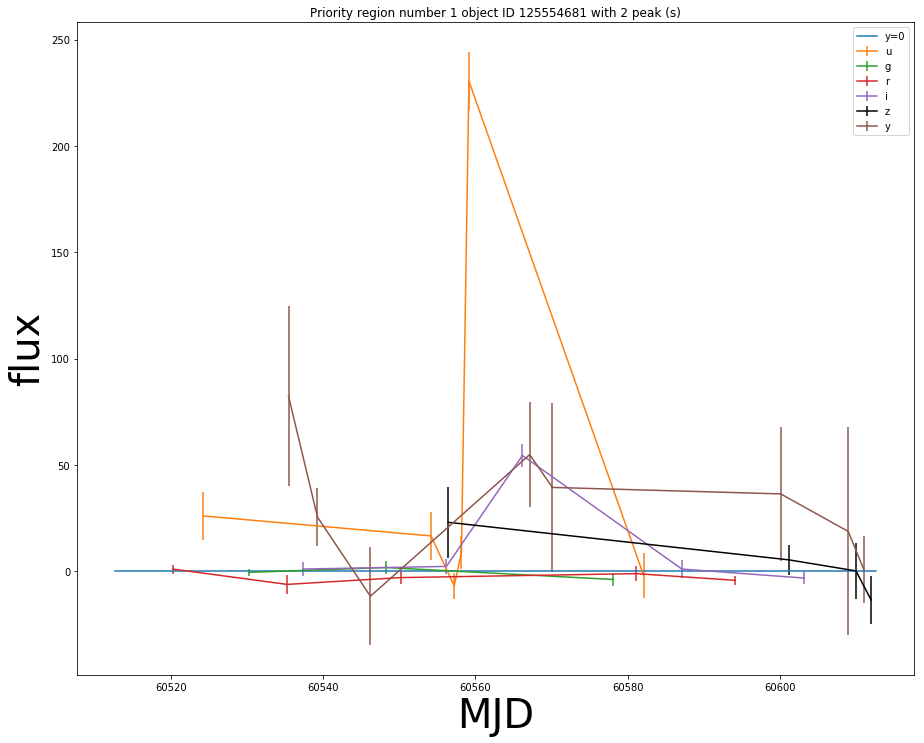

126976895
[60548.207, 60553.1293, 60546.1824]


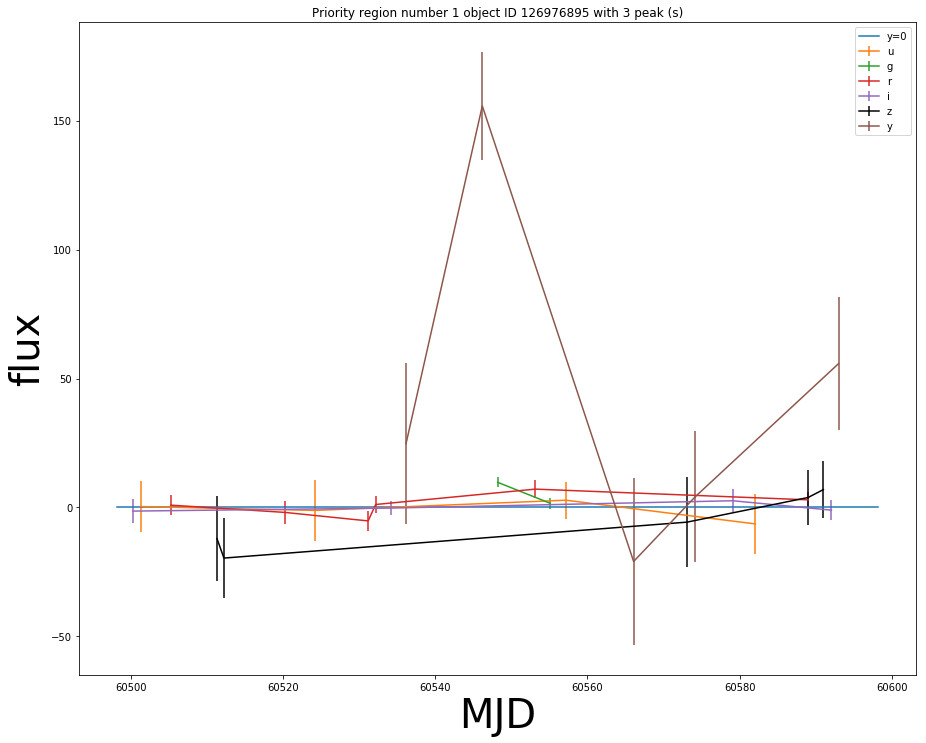

129328649
[60578.2182, 60581.2614, 60587.2]


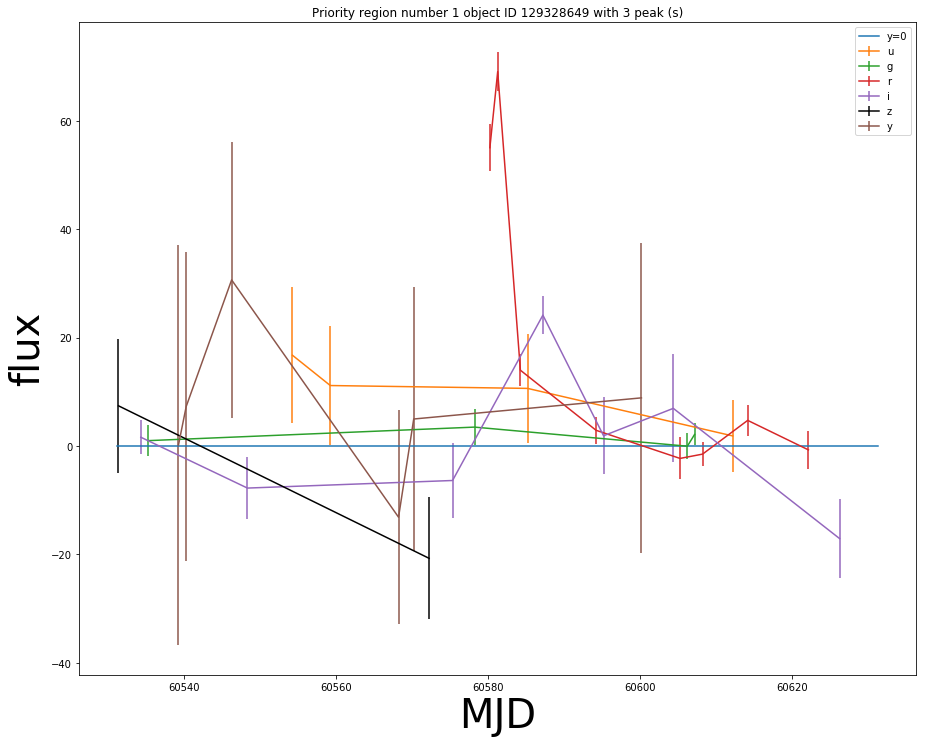

130678775
[60398.1634, 60395.0844, 60391.2118]


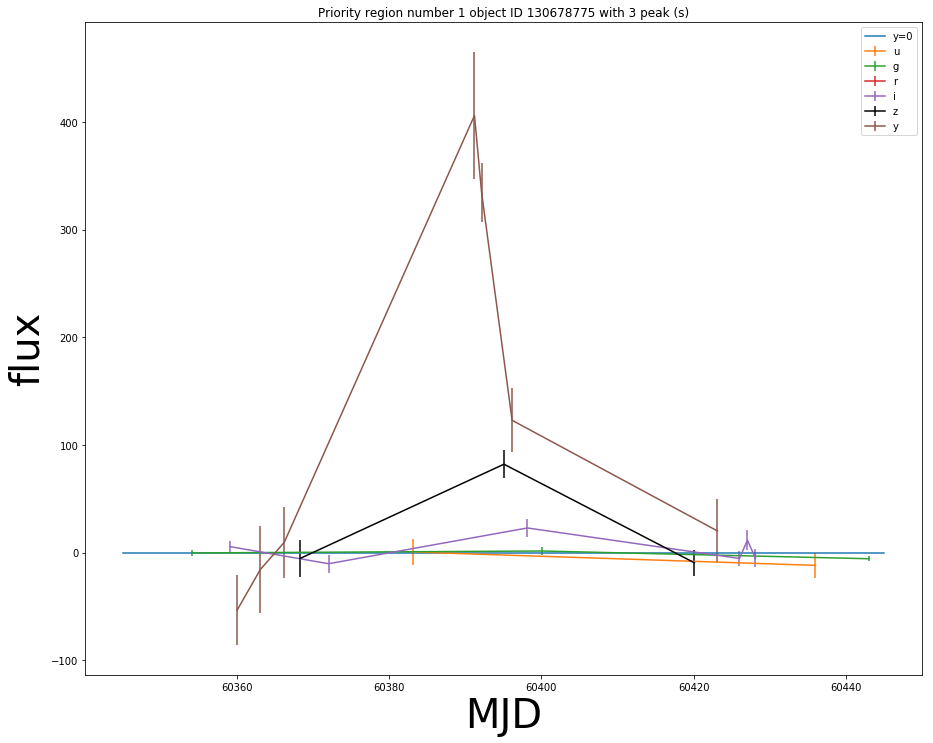

In [35]:
for i,obj_id in enumerate(kilonova_ids):
    index = df['object_id'] == obj_id
    print(obj_id)
    #plot_data(df[index])
    get_max_flux(df[index],priority=1)